In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
#Read the dataset
data = pd.read_csv("train.csv")
data

pose_id                pose     x_nose     y_nose     z_nose  \
0           0           squats_up  -0.382815 -48.231250 -54.405792   
1           1          situp_down  54.146880 -12.822491   5.564175   
2           2          situp_down   9.891440 -54.147266  85.344970   
3           3    jumping_jacks_up   0.904673 -51.350130 -33.606970   
4           4  jumping_jacks_down  -3.153129 -55.255062 -17.745928   
...       ...                 ...        ...        ...        ...   
1092     1092            situp_up -25.679585 -47.380875  -5.901453   
1093     1093    jumping_jacks_up  -1.185803 -51.386070 -31.526268   
1094     1094        pullups_down  -4.307419 -49.337822   7.097422   
1095     1095          situp_down -41.915108  -1.429882 -64.905620   
1096     1096    jumping_jacks_up  -0.599986 -52.802720 -33.876865   

      x_left_eye_inner  y_left_eye_inner  z_left_eye_inner  x_left_eye  \
0             0.137189        -50.040543        -51.997875    0.502047   
1            56.762527        -11.221117         -0.363063   56.795986   
2            12.784414        -55.229970         88.534775   14.006874   
3             1.338871        -53.172337        -30.013737    1.743913   
4            -2.046205        -57.477790        -18.198952   -1.506304   
...                ...               ...               ...         ...   
1092        -25.139788        -51.002510        -10.440426  -24.879524   
1093         -0.436185        -53.642360        -28.797546    0.175695   
1094         -4.982467        -51.214745          9.683287   -5.098945   
1095        -43.944553         -5.871200        -69.808044  -43.605865   
1096          0.146288        -54.501133        -30.398746    0.676095   

      y_left_eye  ...  z_left_heel  x_right_heel  y_right_heel  z_right_heel  \
0     -50.058890  ...    33.283375    -12.302963     52.377000     21.567219   
1     -10.608183  ...    -8.073100    -37.519974      4.045297     62.104233   
2     -54.291880  ...  -132.024460    -61.214890     53.040688    -16.786700   
3     -53.050697  ...    51.615970    -15.543400     38.251835     34.033176   
4     -57.428230  ...    -2.849554      2.811829     56.000500     56.605590   
...          ...  ...          ...           ...           ...           ...   
1092  -51.218052  ...    14.827999    -55.717426     -0.799386     48.414420   
1093  -53.750496  ...     8.130944    -12.678401     47.509556     62.822067   
1094  -51.260090  ...   -22.450487     35.971850     14.499550    -48.723770   
1095   -7.228406  ...  -111.222755    -39.931140      4.812771   -106.005490   
1096  -54.379950  ...    47.483240    -12.783580     43.284570     41.065197   

      x_left_foot_index  y_left_foot_index  z_left_foot_index  \
0             16.609533          54.351162          15.890617   
1            -60.468560           6.281939          -8.185631   
2             -5.844672          99.829030        -166.543060   
3             16.610210          46.572014          38.680614   
4              0.566345          66.231050         -19.252045   
...                 ...                ...                ...   
1092         -59.586680         -16.158272           1.463939   
1093          17.710821          51.948390         -14.776978   
1094          36.879860          -5.513745         -34.270077   
1095          15.440416          -9.404089        -123.269000   
1096          13.308356          48.930042          29.690600   

      x_right_foot_index  y_right_foot_index  z_right_foot_index  
0             -16.779694           55.382572            2.050140  
1             -52.589350           -3.852214           59.750070  
2             -73.826830           38.470097          -40.519830  
3             -18.784650           45.098710           20.343110  
4              -3.451297           60.029484           45.503677  
...                  ...                 ...                 ...  
1092          -56.319120          -17.240007           40.646820 

In [3]:
#Remove ID intex
data = data.iloc[:,1:]
data

pose     x_nose     y_nose     z_nose  x_left_eye_inner  \
0              squats_up  -0.382815 -48.231250 -54.405792          0.137189   
1             situp_down  54.146880 -12.822491   5.564175         56.762527   
2             situp_down   9.891440 -54.147266  85.344970         12.784414   
3       jumping_jacks_up   0.904673 -51.350130 -33.606970          1.338871   
4     jumping_jacks_down  -3.153129 -55.255062 -17.745928         -2.046205   
...                  ...        ...        ...        ...               ...   
1092            situp_up -25.679585 -47.380875  -5.901453        -25.139788   
1093    jumping_jacks_up  -1.185803 -51.386070 -31.526268         -0.436185   
1094        pullups_down  -4.307419 -49.337822   7.097422         -4.982467   
1095          situp_down -41.915108  -1.429882 -64.905620        -43.944553   
1096    jumping_jacks_up  -0.599986 -52.802720 -33.876865          0.146288   

      y_left_eye_inner  z_left_eye_inner  x_left_eye  y_left_eye  z_left_eye  \
0           -50.040543        -51.997875    0.502047  -50.058890  -51.986694   
1           -11.221117         -0.363063   56.795986  -10.608183   -0.378148   
2           -55.229970         88.534775   14.006874  -54.291880   88.543910   
3           -53.172337        -30.013737    1.743913  -53.050697  -30.007776   
4           -57.477790        -18.198952   -1.506304  -57.428230  -18.204160   
...                ...               ...         ...         ...         ...   
1092        -51.002510        -10.440426  -24.879524  -51.218052  -10.440801   
1093        -53.642360        -28.797546    0.175695  -53.750496  -28.796741   
1094        -51.214745          9.683287   -5.098945  -51.260090    9.667620   
1095         -5.871200        -69.808044  -43.605865   -7.228406  -69.804830   
1096        -54.501133        -30.398746    0.676095  -54.379950  -30.394870   

      ...  z_left_heel  x_right_heel  y_right_heel  z_right_heel  \
0     ...    33.283375    -12.302963     52.377000     21.567219   
1     ...    -8.073100    -37.519974      4.045297     62.104233   
2     ...  -132.024460    -61.214890     53.040688    -16.786700   
3     ...    51.615970    -15.543400     38.251835     34.033176   
4     ...    -2.849554      2.811829     56.000500     56.605590   
...   ...          ...           ...           ...           ...   
1092  ...    14.827999    -55.717426     -0.799386     48.414420   
1093  ...     8.130944    -12.678401     47.509556     62.822067   
1094  ...   -22.450487     35.971850     14.499550    -48.723770   
1095  ...  -111.222755    -39.931140      4.812771   -106.005490   
1096  ...    47.483240    -12.783580     43.284570     41.065197   

      x_left_foot_index  y_left_foot_index  z_left_foot_index  \
0             16.609533          54.351162          15.890617   
1            -60.468560           6.281939          -8.185631   
2             -5.844672          99.829030        -166.543060   
3             16.610210          46.572014          38.680614   
4              0.566345          66.231050         -19.252045   
...                 ...                ...                ...   
1092         -59.586680         -16.158272           1.463939   
1093          17.710821          51.948390         -14.776978   
1094          36.879860          -5.513745         -34.270077   
1095          15.440416          -9.404089        -123.269000   
1096          13.308356          48.930042          29.690600   

      x_right_foot_index  y_right_foot_index  z_right_foot_index  
0             -16.779694           55.382572            2.050140  
1             -52.589350           -3.852214           59.750070  
2             -73.826830           38.470097          -40.519830  
3             -18.784650           45.098710           20.343110  
4              -3.451297           60.029484           45.503677  
...                  ...                 ...                 ...  
1092          -56.319120          -17.24000

In [4]:
#Selecting the features i think are importand
point_list = [1,12,13,14,15,16,17,24,25,26,27,28,29]
joint_list = []
for j in point_list[:]:
    for i in range(3,0,-1):
        m = 3*j-i+1
        joint_list.append(m)
#My features X
X_my = data.iloc[:,joint_list]
X_my

x_nose     y_nose     z_nose  x_left_shoulder  y_left_shoulder  \
0     -0.382815 -48.231250 -54.405792         5.738914       -40.144950   
1     54.146880 -12.822491   5.564175        43.989132         6.855316   
2      9.891440 -54.147266  85.344970        23.793780       -33.113200   
3      0.904673 -51.350130 -33.606970         5.146463       -40.351410   
4     -3.153129 -55.255062 -17.745928         6.262126       -40.433865   
...         ...        ...        ...              ...              ...   
1092 -25.679585 -47.380875  -5.901453       -17.183490       -35.908180   
1093  -1.185803 -51.386070 -31.526268         6.529616       -40.461082   
1094  -4.307419 -49.337822   7.097422        -4.462159       -40.112892   
1095 -41.915108  -1.429882 -64.905620       -28.296005       -31.575302   
1096  -0.599986 -52.802720 -33.876865         5.905275       -40.362648   

      z_left_shoulder  x_right_shoulder  y_right_shoulder  z_right_shoulder  \
0          -22.746880         -6.305204        -39.853040        -27.302664   
1          -39.861504         35.899864         -2.642102         51.833416   
2           70.464325          3.230740        -36.063040        104.769325   
3           -9.978578         -4.480538        -39.645817        -17.486773   
4          -19.522552         -5.555995        -39.563007         14.039843   
...               ...               ...               ...               ...   
1092       -35.236034        -12.786181        -38.266075         24.144993   
1093       -16.549835         -5.560431        -39.533050         -1.468586   
1094        32.203327         -9.944173        -38.579280        -14.903067   
1095       -62.810210        -36.870720        -14.828350        -20.571154   
1096       -10.397831         -7.364183        -39.624043         -4.364257   

      x_left_elbow  ...  z_left_knee  x_right_knee  y_right_knee  \
0        13.372133  ...     7.293593     -8.957223     26.042614   
1        39.639700  ...   -32.788300    -21.294983    -46.921917   
2        26.182497  ...   -89.385060    -36.917480     19.011257   
3        11.151299  ...     7.474735     -9.401276     21.161770   
4         2.878637  ...   -20.857230     -3.904235     29.025482   
...            ...  ...          ...           ...           ...   
1092    -36.021793  ...    -5.014194    -26.693811     -2.962687   
1093      9.794041  ...    -6.431298     -9.638668     23.666777   
1094      0.650534  ...   -10.573856     14.836838     -1.002637   
1095    -21.701504  ...   -59.139410     -9.187761     -5.311477   
1096     15.627117  ...     2.030207     -9.541869     25.689873   

      z_right_knee  x_left_ankle  y_left_ankle  z_left_ankle  x_right_ankle  \
0        -1.410017     13.009448     48.306595     31.770035     -12.889769   
1        32.153625    -44.443314      2.445917    -11.077418     -39.064700   
2        -7.333317     -2.400989     92.869170   -127.827560     -60.212690   
3        -4.541881     14.490324     38.530495     48.143680     -16.069841   
4        24.715385      4.315744     52.907158     -3.863915       0.791381   
...            ...           ...           ...           ...            ...   
1092     27.472057    -54.799280     -1.174560     13.673433     -51.256435   
1093     27.816395     18.273228     46.034153      7.940321     -13.463171   
1094    -31.161953     32.829357      5.131370    -20.788958      33.364113   
1095    -45.013763     19.408370    -13.296657   -106.578480     -38.179733   
1096      4.004215     13.279446     40.528824     44.038930     -12.696512   

      y_right_ankle  z_right_ankle  
0         48.558000      20.343771  
1         -6.034986      59.338997  
2         42.732136     -15.173836  
3         36.646694      31.075594  
4         51.509167      54.250587  
...             ...            ...  
1092      -3.725998      46.722965  
1093      43.379185      60.488140  
1094       8.407383     -46.540165  
1095      -1.240258    

In [5]:
X_my.columns

Index(['x_nose', 'y_nose', 'z_nose', 'x_left_shoulder', 'y_left_shoulder',
       'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder',
       'z_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow',
       'x_right_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_wrist',
       'y_left_wrist', 'z_left_wrist', 'x_right_wrist', 'y_right_wrist',
       'z_right_wrist', 'x_left_hip', 'y_left_hip', 'z_left_hip',
       'x_right_hip', 'y_right_hip', 'z_right_hip', 'x_left_knee',
       'y_left_knee', 'z_left_knee', 'x_right_knee', 'y_right_knee',
       'z_right_knee', 'x_left_ankle', 'y_left_ankle', 'z_left_ankle',
       'x_right_ankle', 'y_right_ankle', 'z_right_ankle'],
      dtype='object')

In [6]:
#All features X
X1 = data.iloc[:,1:]
X1

x_nose     y_nose     z_nose  x_left_eye_inner  y_left_eye_inner  \
0     -0.382815 -48.231250 -54.405792          0.137189        -50.040543   
1     54.146880 -12.822491   5.564175         56.762527        -11.221117   
2      9.891440 -54.147266  85.344970         12.784414        -55.229970   
3      0.904673 -51.350130 -33.606970          1.338871        -53.172337   
4     -3.153129 -55.255062 -17.745928         -2.046205        -57.477790   
...         ...        ...        ...               ...               ...   
1092 -25.679585 -47.380875  -5.901453        -25.139788        -51.002510   
1093  -1.185803 -51.386070 -31.526268         -0.436185        -53.642360   
1094  -4.307419 -49.337822   7.097422         -4.982467        -51.214745   
1095 -41.915108  -1.429882 -64.905620        -43.944553         -5.871200   
1096  -0.599986 -52.802720 -33.876865          0.146288        -54.501133   

      z_left_eye_inner  x_left_eye  y_left_eye  z_left_eye  x_left_eye_outer  \
0           -51.997875    0.502047  -50.058890  -51.986694          0.858925   
1            -0.363063   56.795986  -10.608183   -0.378148         56.832386   
2            88.534775   14.006874  -54.291880   88.543910         15.034156   
3           -30.013737    1.743913  -53.050697  -30.007776          2.137811   
4           -18.198952   -1.506304  -57.428230  -18.204160         -0.933045   
...                ...         ...         ...         ...               ...   
1092        -10.440426  -24.879524  -51.218052  -10.440801        -24.600859   
1093        -28.797546    0.175695  -53.750496  -28.796741          0.790328   
1094          9.683287   -5.098945  -51.260090    9.667620         -5.205800   
1095        -69.808044  -43.605865   -7.228406  -69.804830        -43.263298   
1096        -30.398746    0.676095  -54.379950  -30.394870          1.162609   

      ...  z_left_heel  x_right_heel  y_right_heel  z_right_heel  \
0     ...    33.283375    -12.302963     52.377000     21.567219   
1     ...    -8.073100    -37.519974      4.045297     62.104233   
2     ...  -132.024460    -61.214890     53.040688    -16.786700   
3     ...    51.615970    -15.543400     38.251835     34.033176   
4     ...    -2.849554      2.811829     56.000500     56.605590   
...   ...          ...           ...           ...           ...   
1092  ...    14.827999    -55.717426     -0.799386     48.414420   
1093  ...     8.130944    -12.678401     47.509556     62.822067   
1094  ...   -22.450487     35.971850     14.499550    -48.723770   
1095  ...  -111.222755    -39.931140      4.812771   -106.005490   
1096  ...    47.483240    -12.783580     43.284570     41.065197   

      x_left_foot_index  y_left_foot_index  z_left_foot_index  \
0             16.609533          54.351162          15.890617   
1            -60.468560           6.281939          -8.185631   
2             -5.844672          99.829030        -166.543060   
3             16.610210          46.572014          38.680614   
4              0.566345          66.231050         -19.252045   
...                 ...                ...                ...   
1092         -59.586680         -16.158272           1.463939   
1093          17.710821          51.948390         -14.776978   
1094          36.879860          -5.513745         -34.270077   
1095          15.440416          -9.404089        -123.269000   
1096          13.308356          48.930042          29.690600   

      x_right_foot_index  y_right_foot_index  z_right_foot_index  
0             -16.779694           55.382572            2.050140  
1             -52.589350           -3.852214           59.750070  
2             -73.826830           38.470097          -40.519830  
3             -18.784650           45.098710           20.343110  
4              -3.451297           60.029484           45.503677  
...                  ...                 ...                 ...  
1092          -56.319120          -17.240007           4

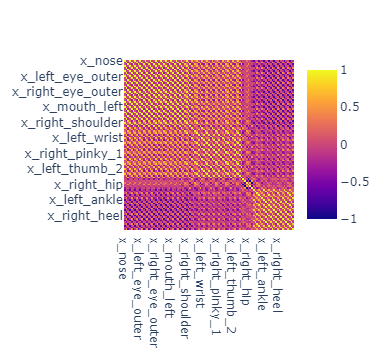

In [7]:
#Correlattion
import plotly.express as px
corr = X1.corr()
fig = px.imshow(corr)
fig.show()
#Correlattion matrix is to lagre to show labels correctly 
#zooming in fixes the problem

In [8]:
#All the features labels
X_features = []
for col in X1.columns:
    X_features.append(col)

In [9]:
#My features y
y_data = data.iloc[:,0]
y_data = np.array(y_data)
y_data.shape

(1097,)

In [10]:
#Function that can plot any example 
def example_plot(E,A,V):
    
    #Assinging the cordinates
    example = A.loc[E]
    x = []
    y = []
    z = []
    for i in range(0,len(example),3):
        x.append(example[i])
        y.append(example[i+1])
        z.append(example[i+2])
        
    #Ploting the example
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(z[1:], x[1:], y[1:], c='red', s=50)
    ax.scatter(z[0], x[0], y[0], c='blue', s=200)
    ax.scatter(0, 0, 0, c='black', s=30)
    ax.plot(z[1:6:2], x[1:6:2], y[1:6:2], color='black')
    ax.plot(z[2:7:2], x[2:7:2], y[2:7:2], color='black')
    ax.plot(z[1:3], x[1:3], y[1:3], color='black')
    ax.plot(z[7:14:2], x[7:14:2], y[7:14:2], color='black')
    ax.plot(z[8:13:2], x[8:13:2], y[8:13:2], color='black')
    ax.plot(z[7:9], x[7:9], y[7:9], color='black')
    ax.plot(z[1:10:6], x[1:10:6], y[1:10:6], color='black')
    ax.plot(z[2:10:6], x[2:10:6], y[2:10:6], color='black')
    
    ax.view_init(-150, 150)
    
    ax.set_title(V[E])

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    return plt.show()

In [11]:
#investigating random example
y_data[15]

'pushups_down'

In [12]:
#random example features
X_data15 = X_my.loc[157]
X_data15

x_nose              50.037296
y_nose             -25.649130
z_nose               1.594376
x_left_shoulder     43.634937
y_left_shoulder     -0.659828
z_left_shoulder    -16.708637
x_right_shoulder    34.408180
y_right_shoulder   -16.926353
z_right_shoulder    41.356106
x_left_elbow        48.840860
y_left_elbow       -17.289154
z_left_elbow       -36.309937
x_right_elbow       33.046993
y_right_elbow      -44.988464
z_right_elbow       48.815563
x_left_wrist        58.174862
y_left_wrist       -27.482018
z_left_wrist       -24.711555
x_right_wrist       45.922530
y_right_wrist      -35.380024
z_right_wrist       39.920200
x_left_hip           1.681090
y_left_hip           3.600660
z_left_hip         -20.880806
x_right_hip         -1.681090
y_right_hip         -3.600660
z_right_hip         20.880806
x_left_knee        -26.071722
y_left_knee         -9.914915
z_left_knee        -38.793972
x_right_knee       -28.240004
y_right_knee        -8.115153
z_right_knee         7.716275
x_left_ank

<IPython.core.display.Javascript object>


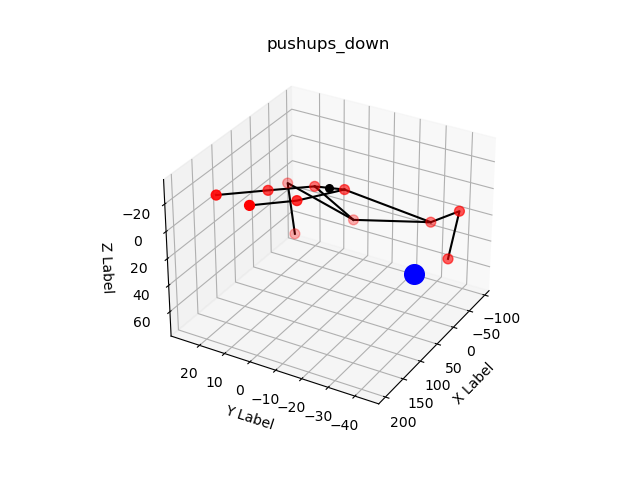

In [13]:
example_plot(15,X_my,y_data)

<IPython.core.display.Javascript object>


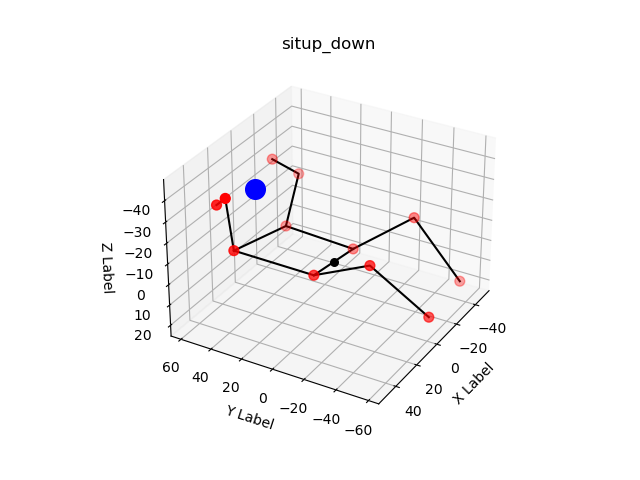

In [14]:
#Plotting example 157
example_plot(157,X_my,y_data)

<IPython.core.display.Javascript object>


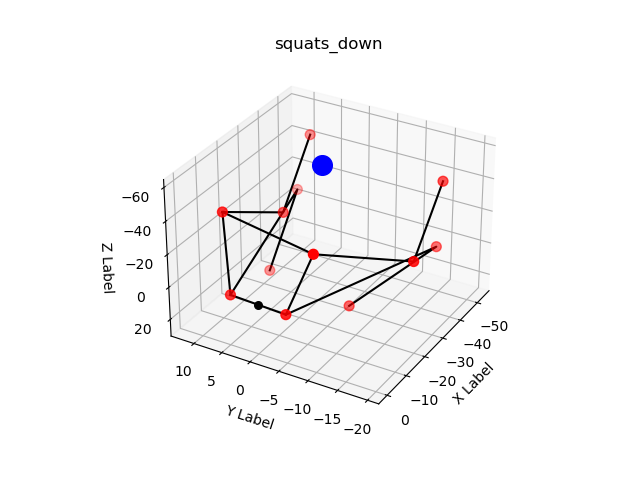

In [15]:
#Plotting example 890
example_plot(890,X_my,y_data)

In [16]:
#unique labels
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
unique(y_data)

['jumping_jacks_down' 'jumping_jacks_up' 'pullups_down' 'pullups_up'
 'pushups_down' 'pushups_up' 'situp_down' 'situp_up' 'squats_down'
 'squats_up']


In [17]:
#turning classes to numerical values
true_labels = {0:'jumping_jacks_down',1: 'jumping_jacks_up',2: 'pullups_down',3: 'pullups_up'
 ,4:'pushups_down',5: 'pushups_up',6: 'situp_down',7: 'situp_up',8: 'squats_down'
 ,9:'squats_up'}
numerical_labels = dict(map(reversed, true_labels.items()))
y_num = [numerical_labels[i] for i in y_data]
type(y_num)
y_num = np.array(y_num)
y_num

array([9, 6, 6, ..., 2, 6, 1])

In [18]:
#class labels
class_names = list(true_labels.values())
class_names

['jumping_jacks_down',
 'jumping_jacks_up',
 'pullups_down',
 'pullups_up',
 'pushups_down',
 'pushups_up',
 'situp_down',
 'situp_up',
 'squats_down',
 'squats_up']

In [19]:
X = np.array(X1)
X[2].shape

(99,)

<IPython.core.display.Javascript object>


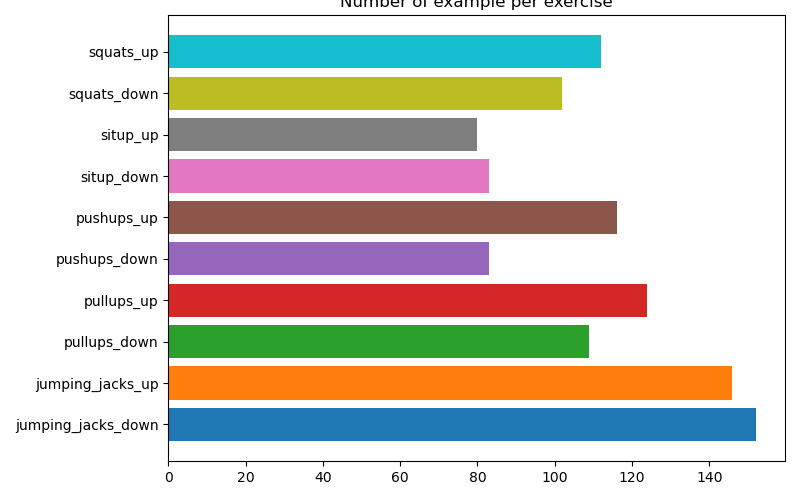

In [20]:
#Making BArgraph for the amount data in every class
pushups_up = np.empty(X[2].shape)
pushups_down = np.empty(X[2].shape)
jumping_jacks_down = np.empty(X[2].shape)
jumping_jacks_up = np.empty(X[2].shape)
pullups_down = np.empty(X[2].shape)
pullups_up = np.empty(X[2].shape)
situp_down = np.empty(X[2].shape)
situp_up = np.empty(X[2].shape)
squats_down = np.empty(X[2].shape)
squats_up = np.empty(X[2].shape)
for i in range(len(y_data)):
    if y_data[i] == "pushups_up":
        pushups_up = np.row_stack((pushups_up,X[i]))
    elif y_data[i] == "pushups_down":
        pushups_down = np.row_stack((pushups_down,X[i]))
    elif y_data[i] == "jumping_jacks_down":
        jumping_jacks_down = np.row_stack((jumping_jacks_down,X[i]))
    elif y_data[i] == "jumping_jacks_up":
        jumping_jacks_up = np.row_stack((jumping_jacks_up,X[i]))
    elif y_data[i] == "pullups_down":
        pullups_down = np.row_stack((pullups_down,X[i]))
    elif y_data[i] == "pullups_up":
        pullups_up = np.row_stack((pullups_up,X[i]))
    elif y_data[i] == "situp_down":
        situp_down = np.row_stack((situp_down,X[i]))
    elif y_data[i] == "situp_up":
        situp_up = np.row_stack((situp_up,X[i]))
    elif y_data[i] == "squats_down":
        squats_down = np.row_stack((squats_down,X[i]))
    else:
        squats_up = np.row_stack((squats_up,X[i]))
        
values = (len(jumping_jacks_down),len(jumping_jacks_up),len(pullups_up),len(pullups_down)
          ,len(pushups_down),len(pushups_up),len(situp_down),len(situp_up)
          ,len(squats_down),len(squats_up))

# creating the bar plot
fig = plt.figure(figsize = (8, 5))
courses = list(true_labels.values())
colors = []
c = plt.cm.get_cmap("tab10")
for i in range(10):
    colors.append(c(i))
plt.barh(courses, values, color=colors)
plt.tight_layout() 
plt.title("Number of example per exercise")
plt.show()

<IPython.core.display.Javascript object>


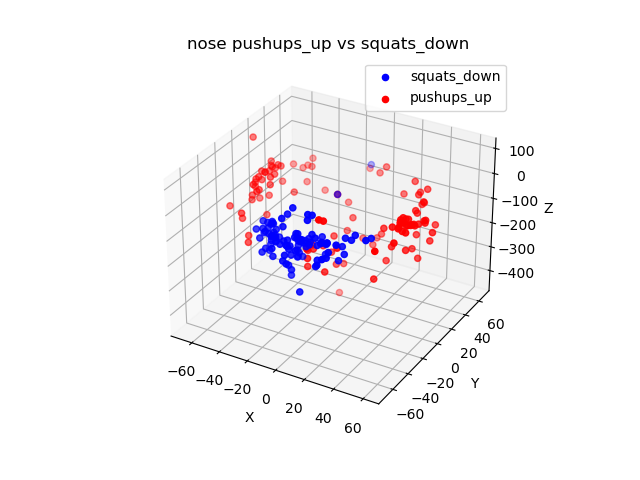

In [21]:
#Plot the data of the "nose" point in space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(squats_down[:,0],squats_down[:,1],squats_down[:,2],c='b',label='squats_down')
ax.scatter(pushups_up[:,0],pushups_up[:,1],pushups_up[:,2],c='r',label='pushups_up')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("nose pushups_up vs squats_down" )
ax.legend(loc="best")
plt.show()

Number of examples before SMOTE: (1510,)
Number of examples after SMOTE: (1097,)


<IPython.core.display.Javascript object>


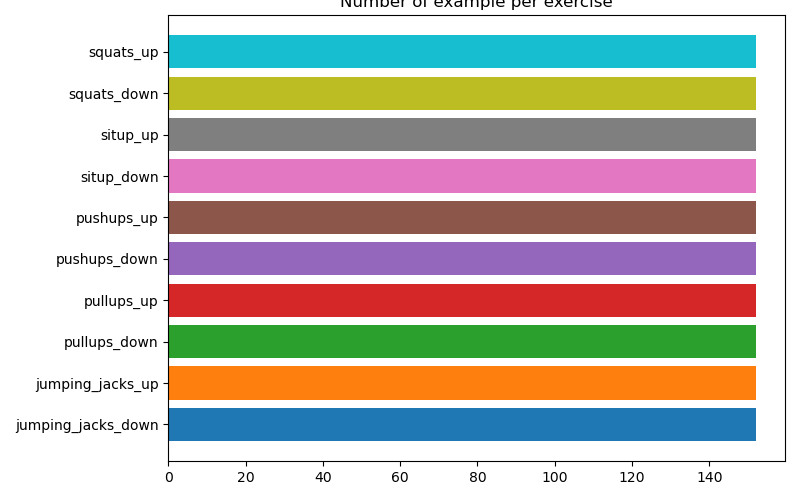

In [22]:
#SMOTE for balancing the dataset 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y_data)

#Numerical labels for SMOTE made data
y_num_sm = [numerical_labels[i] for i in y_sm]
y_num_sm = np.array(y_num_sm)
print(f"Number of examples before SMOTE:",y_num_sm.shape)
print(f"Number of examples after SMOTE:",y_data.shape)

#Bar graph for SMOTE made data
pushups_up_sm = np.empty(X_sm[2].shape)
pushups_down_sm = np.empty(X_sm[2].shape)
jumping_jacks_down_sm = np.empty(X_sm[2].shape)
jumping_jacks_up_sm = np.empty(X_sm[2].shape)
pullups_down_sm = np.empty(X_sm[2].shape)
pullups_up_sm = np.empty(X_sm[2].shape)
situp_down_sm = np.empty(X_sm[2].shape)
situp_up_sm = np.empty(X_sm[2].shape)
squats_down_sm = np.empty(X_sm[2].shape)
squats_up_sm = np.empty(X_sm[2].shape)
for i in range(len(X_sm)):
    if y_sm[i] == "pushups_up":
        pushups_up_sm = np.row_stack((pushups_up_sm,X_sm[i]))
    elif y_sm[i] == "pushups_down":
        pushups_down_sm = np.row_stack((pushups_down_sm,X_sm[i]))
    elif y_sm[i] == "jumping_jacks_down":
        jumping_jacks_down_sm = np.row_stack((jumping_jacks_down_sm,X_sm[i]))
    elif y_sm[i] == "jumping_jacks_up":
        jumping_jacks_up_sm = np.row_stack((jumping_jacks_up_sm,X_sm[i]))
    elif y_sm[i] == "pullups_down":
        pullups_down_sm = np.row_stack((pullups_down_sm,X_sm[i]))
    elif y_sm[i] == "pullups_up":
        pullups_up_sm = np.row_stack((pullups_up_sm,X_sm[i]))
    elif y_sm[i] == "situp_down":
        situp_down_sm = np.row_stack((situp_down_sm,X_sm[i]))
    elif y_sm[i] == "situp_up":
        situp_up_sm = np.row_stack((situp_up_sm,X_sm[i]))
    elif y_sm[i] == "squats_down":
        squats_down_sm = np.row_stack((squats_down_sm,X_sm[i]))
    else:
        squats_up_sm = np.row_stack((squats_up_sm,X_sm[i]))

values_sm = (len(jumping_jacks_down_sm),len(jumping_jacks_up_sm),len(pullups_up_sm),len(pullups_down_sm)
          ,len(pushups_down_sm),len(pushups_up_sm),len(situp_down_sm),len(situp_up_sm)
          ,len(squats_down_sm),len(squats_up_sm))

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
courses = list(true_labels.values())
colors = []
c = plt.cm.get_cmap("tab10")
for i in range(10):
    colors.append(c(i))
plt.barh(courses, values_sm, color=colors)
plt.tight_layout() 
plt.title("Number of example per exercise")
plt.show()
plt.savefig('test.png', bbox_inches='tight')

SMOTE made random examples plot


<IPython.core.display.Javascript object>


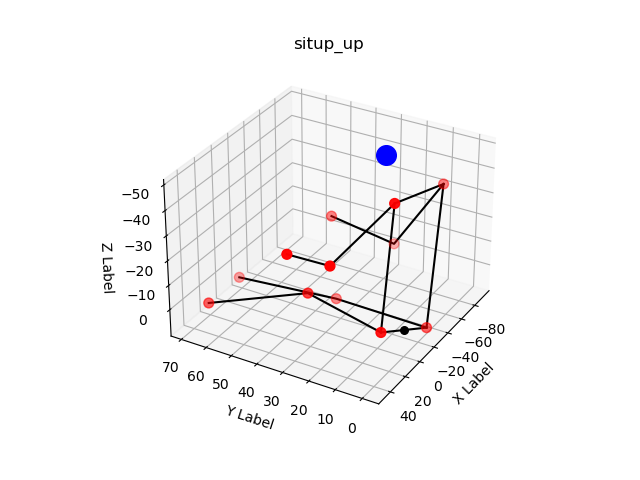

<IPython.core.display.Javascript object>


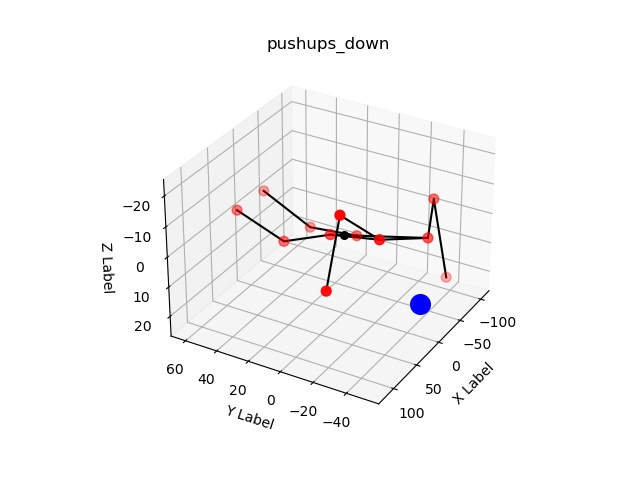

In [23]:
#Smote made examples for graphing
X_sm_df = pd.DataFrame(X_sm,columns=X1.columns)

#Selecting the features i think are importand
point_list = [1,12,13,14,15,16,17,24,25,26,27,28,29]
joint_list = []
for j in point_list[:]:
    for i in range(3,0,-1):
        m = 3*j-i+1
        joint_list.append(m-1)
        
#My features X
X_my_sm = X_sm_df.iloc[:,joint_list]
print("SMOTE made random examples plot")
example_plot(1400, X_my_sm, y_sm)
example_plot(1200, X_my_sm, y_sm)

In [24]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X1)
X_data_scaled

array([[-0.01846408, -0.35136801, -0.43380374, ..., -0.39331951,
         0.49289314, -0.20296686],
       [ 2.28835303,  0.78958826,  0.66391853, ..., -1.60530289,
        -1.39422966,  0.600973  ],
       [ 0.41617666, -0.54199642,  2.12426878, ..., -2.32408871,
        -0.04591048, -0.79609923],
       ...,
       [-0.18449004, -0.38702445,  0.69198391, ...,  1.50935876,
        -1.26905122, -1.10477932],
       [-1.77544081,  1.15668581, -0.6259982 , ..., -1.60964116,
        -1.75219628, -1.78963663],
       [-0.02765127, -0.49867188, -0.05803131, ..., -0.27785287,
         0.28345403,  0.09458822]])

In [25]:
#Scale my features
X_my = np.array(X_my)
X_my_scaled = scaler.fit_transform(X_my)

In [26]:
#Scale SMOTE data
X_sm_scaled = scaler.fit_transform(X_sm)

In [27]:
#Feature selection with select k best
from sklearn.feature_selection import SelectKBest, f_classif
print(f'data starting shape', X.shape)
X_new = SelectKBest(f_classif, k=33).fit_transform(X, y_num)
X_new_features = []
n = 0
print(f'data ending shape',X_new.shape)
for i in X[1]:
    if i in X_new[1]:
        X_new_features.append(X_features[n])
    n+=1
print(X_new_features)

#Scale the selected features
X_new_scaled = scaler.fit_transform(X_new)

data starting shape (1097, 99)
data ending shape (1097, 33)
['y_nose', 'y_left_eye_inner', 'y_left_eye', 'y_left_eye_outer', 'y_right_eye_inner', 'y_right_eye', 'y_right_eye_outer', 'y_left_ear', 'y_right_ear', 'y_mouth_left', 'y_mouth_right', 'y_left_shoulder', 'y_right_shoulder', 'y_left_elbow', 'y_right_elbow', 'y_left_wrist', 'y_right_wrist', 'y_left_pinky_1', 'y_right_pinky_1', 'y_left_index_1', 'y_right_index_1', 'y_left_thumb_2', 'y_right_thumb_2', 'y_left_knee', 'y_right_knee', 'z_right_knee', 'y_left_ankle', 'y_right_ankle', 'z_right_ankle', 'y_left_heel', 'y_right_heel', 'y_left_foot_index', 'y_right_foot_index']


In [28]:
#LassoCV for feature selection
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LassoCV(cv=5)).fit(X, y_num)
features = selector.get_support()

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8056264291899424, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1662838248785192, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.056652599121662, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.254069624004842, t

In [29]:
print(features)
n=0
for i in features:
    if i==1:
        n+=1
print('Number of lassoCV features',n)

[False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True]
Number of lassoCV features 91


In [30]:
X_lasso = []
for j in range(1097):
    for i in range(99):
        if features[i]==True:
            X_lasso.append(X[j,i])
X_lassocv = np.reshape(X_lasso, (-1, 91))   

#Scale the selected features
X_lassocv = scaler.fit_transform(X_lassocv)
X_lassocv_features = []
for i in range(99):
        if features[i]==True:
            X_lassocv_features.append(X_features[i])
print("The selected features are:")
print(X_lassocv_features)

The selected features are:
['y_nose', 'z_nose', 'x_left_eye_inner', 'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye', 'z_left_eye', 'y_left_eye_outer', 'z_left_eye_outer', 'x_right_eye_inner', 'y_right_eye_inner', 'x_right_eye', 'y_right_eye', 'x_right_eye_outer', 'y_right_eye_outer', 'z_right_eye_outer', 'x_left_ear', 'y_left_ear', 'z_left_ear', 'x_right_ear', 'y_right_ear', 'z_right_ear', 'x_mouth_left', 'y_mouth_left', 'z_mouth_left', 'y_mouth_right', 'z_mouth_right', 'x_left_shoulder', 'y_left_shoulder', 'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'z_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow', 'x_right_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_wrist', 'y_left_wrist', 'z_left_wrist', 'x_right_wrist', 'y_right_wrist', 'z_right_wrist', 'y_left_pinky_1', 'z_left_pinky_1', 'x_right_pinky_1', 'y_right_pinky_1', 'z_right_pinky_1', 'x_left_index_1', 'y_left_index_1', 'z_left_index_1', 'x_right_index_1', 'y_right_index_1', 'z_rig

In [31]:
#selecting 33 max features with LassoCV estimator
selector_low = SelectFromModel(estimator=LassoCV(cv=5), max_features=33).fit(X, y_num)
features_low = selector_low.get_support()
features_low

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8056264291899424, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1662838248785192, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.056652599121662, tolerance: 0.7922862029646522

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.254069624004842, t

array([False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
        True, False, False,  True, False,  True,  True, False, False])

In [32]:
X_features_low = []
for i in range(99):
    if features_low[i]==1:
        X_features_low.append(X_features[i])
print(X_features_low)

['z_nose', 'x_left_eye_inner', 'y_left_eye_inner', 'z_left_eye_inner', 'x_left_ear', 'y_left_ear', 'z_left_ear', 'x_right_ear', 'y_mouth_left', 'z_mouth_left', 'y_mouth_right', 'y_left_shoulder', 'z_left_shoulder', 'z_right_shoulder', 'z_left_elbow', 'z_right_elbow', 'x_left_wrist', 'y_left_wrist', 'z_right_pinky_1', 'x_left_index_1', 'y_left_index_1', 'x_right_thumb_2', 'x_left_hip', 'y_left_hip', 'x_left_knee', 'y_right_knee', 'x_left_ankle', 'z_left_ankle', 'x_right_ankle', 'x_right_heel', 'x_left_foot_index', 'z_left_foot_index', 'x_right_foot_index']


In [33]:
X_lasso_low = []
for j in range(1097):
    for i in range(99):
        if features_low[i]==True:
            X_lasso_low.append(X[j,i])
X_lassocv_low = np.reshape(X_lasso_low, (-1, 33))
X_lassocv_low = scaler.fit_transform(X_lassocv_low)
X_lassocv_low.shape

(1097, 33)

In [34]:
#Select features with estimator logistic Regresion

selector_reg = SelectFromModel(estimator=LogisticRegression()).fit(X, y_num)
features_reg = selector_reg.get_support()
features_reg

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True])

In [35]:
X_features_reg = []
for i in range(99):
    if features_reg[i]==1:
        X_features_reg.append(X_features[i])
print(X_features_reg)

['y_nose', 'y_left_ear', 'y_right_ear', 'z_right_ear', 'y_mouth_left', 'y_mouth_right', 'y_left_shoulder', 'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_knee', 'y_left_knee', 'z_left_knee', 'x_right_knee', 'y_right_knee', 'z_right_knee', 'z_left_ankle', 'y_right_ankle', 'z_right_ankle', 'y_left_heel', 'z_left_heel', 'y_right_heel', 'z_right_heel', 'y_left_foot_index', 'z_left_foot_index', 'x_right_foot_index', 'y_right_foot_index', 'z_right_foot_index']


In [36]:
X_reg = []
for j in range(1097):
    for i in range(99):
        if features_reg[i]==True:
            X_reg.append(X[j,i])
X_reg = np.reshape(X_reg, (-1, 33))   
X_reg = scaler.fit_transform(X_reg)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

# define the number of Monte Carlo simulations
n_simulations = 10

def monte_carlo_classification_report(X, y, clf, n_simulations):
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []
    for i in range(n_simulations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
        accuracy = accuracy_score(y_test, y_pred)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)
        accuracies.append(accuracy)
    return np.mean(precisions, axis=0), np.mean(recalls, axis=0), np.mean(f1_scores, axis=0), np.mean(accuracies), np.std(precisions, axis=0), np.std(recalls, axis=0), np.std(f1_scores, axis=0), np.std(accuracies)


In [38]:
def print_classification_results(X, y, clf, report, n_simulations, class_names):
    # Get means and standard deviations for each metric
    precision_mean, recall_mean, f1_score_mean, accuracy_mean, precision_std, recall_std, f1_score_std, accuracy_std = report(X, y, clf, n_simulations)
    
    # Create DataFrame
    results_df = pd.DataFrame({
        'Class': class_names,
        'Precision (mean)': precision_mean,
        'Precision (std)': precision_std,
        'Recall (mean)': recall_mean,
        'Recall (std)': recall_std,
        'F1-score (mean)': f1_score_mean,
        'F1-score (std)': f1_score_std
    })
    # Print
    print(f'Accuracy mean:', accuracy_mean)
    print(f'Accuracy stadnard deviation:', accuracy_std)
    display(results_df)

In [39]:
#Logistic regresion with L2 and lbfgs

LogReg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, multi_class="multinomial")
LogReg_l2_bal = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, multi_class="multinomial", class_weight='balanced')

In [40]:
print('Logistic regresion with L2 and lbfgs.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_l2, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l2_bal, monte_carlo_classification_report, n_simulations, class_names)

Logistic regresion with L2 and lbfgs.
Accuracy with all the features is:
Accuracy mean: 0.7813636363636364
Accuracy stadnard deviation: 0.035585422774636055


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.810607         0.064785       0.864592   
1    jumping_jacks_up          0.751072         0.076619       0.809248   
2        pullups_down          0.743672         0.099103       0.734325   
3          pullups_up          0.639612         0.084975       0.694982   
4        pushups_down          0.909706         0.068352       0.894365   
5          pushups_up          0.933307         0.042289       0.940527   
6          situp_down          0.909337         0.064889       0.829665   
7            situp_up          0.750173         0.108439       0.736688   
8         squats_down          0.811445         0.113039       0.755231   
9           squats_up          0.636538         0.088091       0.554381   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.081068         0.832845        0.049043  
1      0.107403         0.777607        0.087235  
2      0.091662         0.734364        0.078961  
3      0.089358         0.661514        0.065772  
4      0.077837         0.899706        0.057380  
5      0.049457         0.935557        0.029725  
6      0.098114         0.864369        0.065984  
7      0.102426         0.739655        0.089691  
8      0.091274         0.778376        0.086307  
9      0.101344         0.585078        0.069216

Accuracy with f_classif selected features is:
Accuracy mean: 0.7413636363636363
Accuracy stadnard deviation: 0.015137114368496992


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.728653         0.076182       0.861681   
1    jumping_jacks_up          0.631550         0.035499       0.844267   
2        pullups_down          0.692325         0.116647       0.519017   
3          pullups_up          0.666624         0.081960       0.618232   
4        pushups_down          0.928523         0.051601       0.965735   
5          pushups_up          0.932721         0.050618       0.916434   
6          situp_down          0.879861         0.064188       0.852756   
7            situp_up          0.731689         0.104199       0.696118   
8         squats_down          0.831437         0.081683       0.766883   
9           squats_up          0.579769         0.095142       0.460129   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.062327         0.785753        0.049561  
1      0.093976         0.720156        0.048485  
2      0.055100         0.590178        0.070996  
3      0.072755         0.636083        0.054655  
4      0.039019         0.945435        0.030893  
5      0.059356         0.922258        0.032588  
6      0.073889         0.863099        0.046271  
7      0.064617         0.706555        0.051408  
8      0.081367         0.793776        0.059535  
9      0.054261         0.505983        0.037019

Accuracy with my selected features is:
Accuracy mean: 0.764090909090909
Accuracy stadnard deviation: 0.02067557348280756


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.815743         0.025632       0.867549   
1    jumping_jacks_up          0.715222         0.084546       0.824816   
2        pullups_down          0.712362         0.076958       0.659418   
3          pullups_up          0.618394         0.085094       0.693281   
4        pushups_down          0.914593         0.065932       0.938546   
5          pushups_up          0.938793         0.053832       0.940143   
6          situp_down          0.824593         0.081440       0.812969   
7            situp_up          0.784616         0.107951       0.694609   
8         squats_down          0.753412         0.048184       0.730063   
9           squats_up          0.604283         0.102928       0.491669   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.058001         0.839580        0.029013  
1      0.057724         0.763648        0.065665  
2      0.084935         0.679193        0.061659  
3      0.139459         0.643168        0.070744  
4      0.050005         0.925411        0.051232  
5      0.047241         0.937555        0.028932  
6      0.104787         0.813445        0.071120  
7      0.082964         0.730356        0.060923  
8      0.090093         0.737744        0.051943  
9      0.095459         0.535394        0.076904

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8390728476821192
Accuracy stadnard deviation: 0.018388666724390487


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.836325         0.112539       0.852184   
1    jumping_jacks_up          0.782291         0.069907       0.786047   
2        pullups_down          0.795147         0.062408       0.802145   
3          pullups_up          0.763437         0.069791       0.750770   
4        pushups_down          0.950429         0.033128       0.962618   
5          pushups_up          0.933658         0.047965       0.916813   
6          situp_down          0.918211         0.052731       0.949887   
7            situp_up          0.894123         0.067495       0.840065   
8         squats_down          0.894107         0.060953       0.840470   
9           squats_up          0.664163         0.049797       0.720062   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.037897         0.839078        0.066709  
1      0.070596         0.781212        0.053641  
2      0.067549         0.795834        0.045075  
3      0.082202         0.752146        0.044769  
4      0.040373         0.955655        0.024175  
5      0.047024         0.923272        0.022177  
6      0.052298         0.932754        0.043162  
7      0.062582         0.863250        0.043330  
8      0.064893         0.864451        0.049607  
9      0.084304         0.687686        0.046831

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7745454545454546
Accuracy stadnard deviation: 0.02491307201099041


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.771616         0.050728       0.888659   
1    jumping_jacks_up          0.789838         0.090352       0.803021   
2        pullups_down          0.774641         0.068751       0.721534   
3          pullups_up          0.640087         0.068406       0.687226   
4        pushups_down          0.908975         0.112339       0.912868   
5          pushups_up          0.926683         0.034398       0.913615   
6          situp_down          0.883506         0.074248       0.864980   
7            situp_up          0.658180         0.132242       0.735333   
8         squats_down          0.818807         0.099846       0.730883   
9           squats_up          0.627743         0.073810       0.524547   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.035623         0.824368        0.027996  
1      0.089418         0.792074        0.072494  
2      0.095618         0.741498        0.056351  
3      0.078503         0.659367        0.054941  
4      0.074211         0.908562        0.083970  
5      0.056103         0.919150        0.037349  
6      0.080091         0.868494        0.035711  
7      0.090618         0.688616        0.098556  
8      0.080049         0.769349        0.075074  
9      0.110785         0.567428        0.088835

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7113636363636363
Accuracy stadnard deviation: 0.0209535101302111


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.756020         0.069303       0.855644   
1    jumping_jacks_up          0.701973         0.064826       0.787160   
2        pullups_down          0.614824         0.065254       0.665668   
3          pullups_up          0.626317         0.107557       0.575555   
4        pushups_down          0.811518         0.115878       0.864001   
5          pushups_up          0.914902         0.059275       0.864205   
6          situp_down          0.841403         0.091631       0.801434   
7            situp_up          0.693626         0.136397       0.604917   
8         squats_down          0.719858         0.096542       0.692641   
9           squats_up          0.483249         0.135419       0.382769   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.074135         0.797967        0.037362  
1      0.055934         0.740712        0.052453  
2      0.076396         0.635607        0.048682  
3      0.084238         0.591488        0.063655  
4      0.088493         0.831502        0.079340  
5      0.081515         0.884306        0.032847  
6      0.085510         0.815946        0.064369  
7      0.128008         0.635110        0.098604  
8      0.102553         0.694756        0.051427  
9      0.103640         0.415672        0.094877

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7545454545454545
Accuracy stadnard deviation: 0.034437630772501455


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.759840         0.104557       0.888755   
1    jumping_jacks_up          0.690894         0.088941       0.826149   
2        pullups_down          0.710390         0.075110       0.607130   
3          pullups_up          0.696724         0.080138       0.448156   
4        pushups_down          0.922314         0.069121       0.913679   
5          pushups_up          0.887921         0.064022       0.861417   
6          situp_down          0.818798         0.081918       0.911190   
7            situp_up          0.728775         0.105928       0.766933   
8         squats_down          0.790732         0.062941       0.800655   
9           squats_up          0.593344         0.122940       0.591122   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.053703         0.813439        0.064403  
1      0.051527         0.749488        0.067241  
2      0.056460         0.651898        0.050140  
3      0.092208         0.538447        0.069367  
4      0.066461         0.914469        0.042298  
5      0.089228         0.870447        0.054299  
6      0.051624         0.859340        0.047499  
7      0.100594         0.741748        0.080943  
8      0.093735         0.791112        0.052651  
9      0.092999         0.589652        0.100230

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.78
Accuracy stadnard deviation: 0.028181818181818183


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.864017         0.070061       0.886637   
1    jumping_jacks_up          0.765791         0.075778       0.791535   
2        pullups_down          0.748641         0.049953       0.736291   
3          pullups_up          0.698533         0.080028       0.654542   
4        pushups_down          0.877587         0.096057       0.893227   
5          pushups_up          0.944493         0.039929       0.906749   
6          situp_down          0.865175         0.081265       0.848125   
7            situp_up          0.643049         0.143903       0.749719   
8         squats_down          0.798016         0.095222       0.757347   
9           squats_up          0.625554         0.078880       0.596065   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.062973         0.871728        0.038912  
1      0.050096         0.775916        0.049369  
2      0.136167         0.736825        0.086146  
3      0.074103         0.672105        0.061343  
4      0.069124         0.878872        0.040395  
5      0.088635         0.922896        0.056055  
6      0.084147         0.851105        0.053944  
7      0.104886         0.678406        0.093961  
8      0.109049         0.768037        0.060829  
9      0.069114         0.605116        0.048361

In [41]:
#Logistic Regresion lasso and saga solver

LogReg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000,multi_class="multinomial")
LogReg_l1_bal = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class="multinomial", class_weight='balanced')

In [42]:
print('Logistic regresion with lasso and saga solver.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_l1, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l1_bal, monte_carlo_classification_report, n_simulations, class_names)

Logistic regresion with lasso and saga solver.
Accuracy with all the features is:
Accuracy mean: 0.7640909090909092
Accuracy stadnard deviation: 0.030724717483856714


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.787142         0.062833       0.865764   
1    jumping_jacks_up          0.762977         0.078241       0.839937   
2        pullups_down          0.751831         0.091970       0.691440   
3          pullups_up          0.700146         0.088711       0.640317   
4        pushups_down          0.921396         0.055510       0.895924   
5          pushups_up          0.906276         0.055680       0.909658   
6          situp_down          0.876077         0.068335       0.826076   
7            situp_up          0.675195         0.110324       0.733180   
8         squats_down          0.738265         0.067398       0.791999   
9           squats_up          0.574156         0.131851       0.478725   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.062256         0.822633        0.048023  
1      0.074702         0.794858        0.046143  
2      0.067473         0.715942        0.055566  
3      0.097130         0.661731        0.059649  
4      0.061056         0.905758        0.030945  
5      0.032966         0.906561        0.030949  
6      0.034803         0.848810        0.040372  
7      0.066815         0.697202        0.067238  
8      0.124690         0.758414        0.072414  
9      0.124249         0.515063        0.110348

Accuracy with f_classif selected features is:
Accuracy mean: 0.7436363636363635
Accuracy stadnard deviation: 0.014545454545454526


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.753045         0.080379       0.837172   
1    jumping_jacks_up          0.711851         0.072198       0.818751   
2        pullups_down          0.714186         0.100793       0.630073   
3          pullups_up          0.525618         0.112962       0.609636   
4        pushups_down          0.968333         0.075443       0.906910   
5          pushups_up          0.905759         0.072647       0.881320   
6          situp_down          0.858444         0.063614       0.875865   
7            situp_up          0.753591         0.108996       0.708883   
8         squats_down          0.804001         0.121624       0.766781   
9           squats_up          0.593077         0.110081       0.463672   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059095         0.788481        0.045164  
1      0.057626         0.758644        0.046625  
2      0.054255         0.665598        0.059771  
3      0.115126         0.555197        0.085943  
4      0.052614         0.935897        0.059697  
5      0.040574         0.890545        0.033819  
6      0.075139         0.864147        0.045310  
7      0.056420         0.726000        0.061258  
8      0.109680         0.780663        0.100156  
9      0.118875         0.506888        0.086707

Accuracy with my selected features is:
Accuracy mean: 0.769090909090909
Accuracy stadnard deviation: 0.026410616447879898


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.765203         0.058915       0.883561   
1    jumping_jacks_up          0.770369         0.063849       0.850046   
2        pullups_down          0.734661         0.073430       0.698424   
3          pullups_up          0.639866         0.070713       0.733030   
4        pushups_down          0.900526         0.093146       0.904214   
5          pushups_up          0.932141         0.047174       0.884690   
6          situp_down          0.857584         0.135038       0.890316   
7            situp_up          0.727811         0.148825       0.690380   
8         squats_down          0.831692         0.059294       0.739752   
9           squats_up          0.635654         0.123601       0.478316   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.070814         0.817520        0.047462  
1      0.057232         0.806620        0.050788  
2      0.075259         0.711670        0.051211  
3      0.142844         0.676742        0.094468  
4      0.060651         0.900066        0.064082  
5      0.070582         0.905475        0.039838  
6      0.082172         0.864204        0.079663  
7      0.093531         0.693221        0.073477  
8      0.079524         0.780766        0.060152  
9      0.084967         0.538217        0.078167

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8294701986754968
Accuracy stadnard deviation: 0.01490066225165564


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.850092         0.069809       0.851039   
1    jumping_jacks_up          0.756967         0.065050       0.790423   
2        pullups_down          0.789410         0.063263       0.763729   
3          pullups_up          0.719264         0.083538       0.744436   
4        pushups_down          0.938749         0.042886       0.951022   
5          pushups_up          0.944983         0.040624       0.917669   
6          situp_down          0.940770         0.030945       0.965810   
7            situp_up          0.845254         0.061906       0.834935   
8         squats_down          0.831981         0.043305       0.805530   
9           squats_up          0.686710         0.067998       0.677098   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.075405         0.847521        0.054803  
1      0.046589         0.770731        0.034873  
2      0.027485         0.774016        0.023361  
3      0.089547         0.725739        0.052457  
4      0.025893         0.944487        0.030654  
5      0.029646         0.930359        0.023524  
6      0.021331         0.952842        0.021314  
7      0.079177         0.836347        0.047917  
8      0.043768         0.817564        0.032902  
9      0.071332         0.678696        0.054126

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7831818181818183
Accuracy stadnard deviation: 0.01841329918229919


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.830711         0.051598       0.871629   
1    jumping_jacks_up          0.753449         0.061447       0.822157   
2        pullups_down          0.722020         0.066965       0.736269   
3          pullups_up          0.678466         0.085774       0.651342   
4        pushups_down          0.944788         0.057261       0.910913   
5          pushups_up          0.927772         0.050196       0.903298   
6          situp_down          0.865428         0.082123       0.863171   
7            situp_up          0.749130         0.127980       0.687013   
8         squats_down          0.799404         0.076898       0.746833   
9           squats_up          0.594105         0.096192       0.586397   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.054892         0.848712        0.034248  
1      0.039177         0.784704        0.040287  
2      0.088885         0.724568        0.054614  
3      0.070650         0.662630        0.067996  
4      0.089302         0.924059        0.054909  
5      0.041258         0.914360        0.035258  
6      0.069315         0.861502        0.059495  
7      0.105187         0.703328        0.066535  
8      0.082768         0.770702        0.072642  
9      0.089754         0.578433        0.046393

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7372727272727272
Accuracy stadnard deviation: 0.022434477598641946


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.770874         0.068704       0.852651   
1    jumping_jacks_up          0.742358         0.095129       0.819678   
2        pullups_down          0.687269         0.074374       0.683253   
3          pullups_up          0.621825         0.098037       0.624885   
4        pushups_down          0.900636         0.062974       0.863820   
5          pushups_up          0.938981         0.049197       0.926984   
6          situp_down          0.823062         0.089934       0.810972   
7            situp_up          0.644191         0.075129       0.626769   
8         squats_down          0.649840         0.092410       0.674752   
9           squats_up          0.584535         0.102965       0.433042   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056574         0.807631        0.051222  
1      0.075534         0.775654        0.070936  
2      0.053276         0.683273        0.054046  
3      0.065872         0.614458        0.034948  
4      0.056298         0.880240        0.046032  
5      0.017217         0.932071        0.023805  
6      0.056176         0.814037        0.059533  
7      0.070621         0.633074        0.061441  
8      0.096515         0.655982        0.064971  
9      0.055482         0.490595        0.051870

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7636363636363637
Accuracy stadnard deviation: 0.022998382983042763


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.746383         0.057976       0.854716   
1    jumping_jacks_up          0.739629         0.065530       0.822064   
2        pullups_down          0.707015         0.072970       0.677561   
3          pullups_up          0.639087         0.100562       0.522937   
4        pushups_down          0.946977         0.049405       0.882924   
5          pushups_up          0.925136         0.062456       0.902243   
6          situp_down          0.871322         0.074312       0.901021   
7            situp_up          0.809045         0.125376       0.736863   
8         squats_down          0.782025         0.091915       0.788585   
9           squats_up          0.572616         0.060369       0.569104   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051859         0.795607        0.046103  
1      0.072332         0.774640        0.037955  
2      0.070213         0.686243        0.034640  
3      0.131288         0.565587        0.102542  
4      0.078891         0.911984        0.053287  
5      0.053085         0.911519        0.040410  
6      0.094665         0.881007        0.058422  
7      0.056787         0.765426        0.064075  
8      0.098877         0.780130        0.070190  
9      0.125067         0.565624        0.080294

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7781818181818183
Accuracy stadnard deviation: 0.029161845331537165


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.870698         0.060316       0.788176   
1    jumping_jacks_up          0.785606         0.073291       0.763478   
2        pullups_down          0.762726         0.099576       0.744555   
3          pullups_up          0.628507         0.078433       0.676308   
4        pushups_down          0.950076         0.056011       0.945546   
5          pushups_up          0.937852         0.054125       0.907142   
6          situp_down          0.877662         0.092705       0.885689   
7            situp_up          0.689717         0.134568       0.744401   
8         squats_down          0.837850         0.069694       0.766503   
9           squats_up          0.533021         0.087907       0.636084   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059026         0.826028        0.050194  
1      0.070730         0.770543        0.048977  
2      0.063309         0.748838        0.051955  
3      0.142394         0.646217        0.093208  
4      0.060701         0.945692        0.039038  
5      0.054747         0.919874        0.029480  
6      0.089381         0.877542        0.067148  
7      0.126900         0.709297        0.114723  
8      0.097972         0.797602        0.070857  
9      0.103759         0.572000        0.062927

In [43]:
#Logistic Regression with cross validation
from sklearn.linear_model import LogisticRegressionCV

LogReg_CV = LogisticRegressionCV(cv=5, max_iter=10000, random_state=0)
LogReg_CV_bal = LogisticRegressionCV(cv=5, max_iter=10000, random_state=0, class_weight='balanced')

In [44]:
print('Logistic regresion with cross validation')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_CV, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_CV_bal, monte_carlo_classification_report, n_simulations, class_names)

Logistic regresion with cross validation
Accuracy with all the features is:
Accuracy mean: 0.7959090909090909
Accuracy stadnard deviation: 0.020973221809198785


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.847910         0.060089       0.904381   
1    jumping_jacks_up          0.759953         0.092385       0.796210   
2        pullups_down          0.752245         0.109700       0.747034   
3          pullups_up          0.718785         0.094184       0.733142   
4        pushups_down          0.879990         0.070987       0.878303   
5          pushups_up          0.919458         0.049225       0.886182   
6          situp_down          0.901198         0.061582       0.866012   
7            situp_up          0.718923         0.101683       0.728424   
8         squats_down          0.816993         0.096812       0.772177   
9           squats_up          0.679664         0.081824       0.642297   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073863         0.871824        0.043976  
1      0.062190         0.773464        0.055006  
2      0.082131         0.741163        0.059539  
3      0.077284         0.720517        0.057091  
4      0.068802         0.876716        0.051474  
5      0.068929         0.899498        0.035701  
6      0.088915         0.878823        0.049054  
7      0.084297         0.720188        0.078424  
8      0.068438         0.788037        0.045725  
9      0.091257         0.654382        0.058171

Accuracy with f_classif selected features is:
Accuracy mean: 0.7581818181818183
Accuracy stadnard deviation: 0.02351366755705012


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.777711         0.053014       0.842067   
1    jumping_jacks_up          0.706669         0.068687       0.768277   
2        pullups_down          0.718319         0.084851       0.684775   
3          pullups_up          0.653084         0.080931       0.696109   
4        pushups_down          0.949620         0.059843       0.944671   
5          pushups_up          0.928112         0.046411       0.898324   
6          situp_down          0.852981         0.089756       0.850387   
7            situp_up          0.705746         0.136026       0.678693   
8         squats_down          0.805348         0.072558       0.795244   
9           squats_up          0.548251         0.100409       0.477413   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.068388         0.805090        0.025528  
1      0.060879         0.734656        0.056030  
2      0.082366         0.697250        0.064070  
3      0.053715         0.671870        0.060415  
4      0.039983         0.945964        0.039274  
5      0.065432         0.911239        0.042226  
6      0.070274         0.848388        0.060870  
7      0.108655         0.679843        0.085566  
8      0.108420         0.791962        0.050255  
9      0.156220         0.499231        0.110569

Accuracy with my selected features is:
Accuracy mean: 0.7713636363636363
Accuracy stadnard deviation: 0.023181818181818175


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.842497         0.072527       0.900287   
1    jumping_jacks_up          0.754997         0.070732       0.784103   
2        pullups_down          0.704315         0.067522       0.713841   
3          pullups_up          0.650263         0.123440       0.655643   
4        pushups_down          0.926406         0.055974       0.867955   
5          pushups_up          0.921690         0.057011       0.950341   
6          situp_down          0.832008         0.105246       0.854324   
7            situp_up          0.771076         0.079100       0.636128   
8         squats_down          0.728359         0.107846       0.765270   
9           squats_up          0.597224         0.155708       0.541473   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052032         0.868995        0.055637  
1      0.046505         0.766206        0.036082  
2      0.112196         0.702850        0.066230  
3      0.071153         0.645295        0.074045  
4      0.112857         0.892769        0.076533  
5      0.060718         0.933288        0.037221  
6      0.066447         0.836590        0.048561  
7      0.096961         0.690438        0.062854  
8      0.066425         0.740645        0.065645  
9      0.115095         0.563231        0.125649

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8430463576158941
Accuracy stadnard deviation: 0.018743008871635616


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.864518         0.076510       0.863753   
1    jumping_jacks_up          0.791487         0.076802       0.762343   
2        pullups_down          0.733832         0.081300       0.801310   
3          pullups_up          0.741951         0.090473       0.795126   
4        pushups_down          0.951495         0.040510       0.952851   
5          pushups_up          0.923411         0.039574       0.902432   
6          situp_down          0.954604         0.027805       0.910044   
7            situp_up          0.865933         0.050470       0.832033   
8         squats_down          0.897733         0.046711       0.862386   
9           squats_up          0.716979         0.094640       0.761761   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052692         0.860153        0.032986  
1      0.071455         0.773091        0.051539  
2      0.073863         0.762009        0.055853  
3      0.072819         0.762030        0.054522  
4      0.035298         0.951299        0.024714  
5      0.034000         0.911889        0.023847  
6      0.031400         0.931107        0.015758  
7      0.054650         0.847114        0.039903  
8      0.058054         0.878057        0.038015  
9      0.088918         0.730937        0.052170

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.8022727272727274
Accuracy stadnard deviation: 0.02441463454908324


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.875020         0.050824       0.899409   
1    jumping_jacks_up          0.763262         0.077189       0.804449   
2        pullups_down          0.764958         0.074079       0.732660   
3          pullups_up          0.737396         0.076569       0.670709   
4        pushups_down          0.911745         0.038336       0.957432   
5          pushups_up          0.932315         0.050075       0.913496   
6          situp_down          0.911442         0.045523       0.886739   
7            situp_up          0.707041         0.100649       0.750108   
8         squats_down          0.816456         0.092562       0.736437   
9           squats_up          0.625667         0.105193       0.674783   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.058628         0.885141        0.039257  
1      0.037660         0.781708        0.050122  
2      0.062103         0.745662        0.049549  
3      0.074693         0.699825        0.062372  
4      0.038601         0.933000        0.022483  
5      0.051433         0.921467        0.035820  
6      0.060233         0.897296        0.038475  
7      0.120437         0.724277        0.098782  
8      0.089325         0.768933        0.063331  
9      0.109885         0.641914        0.083263

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7440909090909091
Accuracy stadnard deviation: 0.01379453718681229


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.801568         0.060355       0.871287   
1    jumping_jacks_up          0.767957         0.054447       0.790215   
2        pullups_down          0.678837         0.083228       0.695251   
3          pullups_up          0.694064         0.072028       0.702135   
4        pushups_down          0.899501         0.060533       0.857204   
5          pushups_up          0.928366         0.056819       0.884960   
6          situp_down          0.806299         0.063672       0.788184   
7            situp_up          0.625649         0.113109       0.630444   
8         squats_down          0.715966         0.099232       0.671908   
9           squats_up          0.544234         0.081951       0.525806   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.038475         0.833248        0.035914  
1      0.044918         0.776942        0.031037  
2      0.068608         0.684536        0.062683  
3      0.090822         0.694591        0.066977  
4      0.125321         0.871392        0.071011  
5      0.056705         0.904480        0.041834  
6      0.056288         0.794447        0.038274  
7      0.112159         0.614661        0.060689  
8      0.093353         0.685432        0.055356  
9      0.123814         0.528016        0.086695

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7604545454545455
Accuracy stadnard deviation: 0.03195102140143631


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.802978         0.071925       0.841400   
1    jumping_jacks_up          0.768490         0.060562       0.815817   
2        pullups_down          0.710656         0.082789       0.703879   
3          pullups_up          0.619774         0.130206       0.559003   
4        pushups_down          0.904611         0.073353       0.854711   
5          pushups_up          0.871581         0.109406       0.912760   
6          situp_down          0.860609         0.064074       0.875549   
7            situp_up          0.738719         0.132002       0.681481   
8         squats_down          0.807840         0.095376       0.765273   
9           squats_up          0.572290         0.121224       0.583305   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073674         0.816485        0.030462  
1      0.054273         0.789034        0.037274  
2      0.091852         0.703163        0.069651  
3      0.119541         0.581820        0.108158  
4      0.092909         0.874947        0.060795  
5      0.057376         0.884821        0.048364  
6      0.072226         0.865936        0.054993  
7      0.094816         0.704813        0.095707  
8      0.102800         0.781540        0.078968  
9      0.054217         0.573878        0.083665

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.795
Accuracy stadnard deviation: 0.01631938461001478


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.896144         0.063604       0.843499   
1    jumping_jacks_up          0.800513         0.062185       0.781079   
2        pullups_down          0.730334         0.077608       0.727787   
3          pullups_up          0.669153         0.110215       0.699966   
4        pushups_down          0.870628         0.060364       0.907585   
5          pushups_up          0.938523         0.032911       0.928380   
6          situp_down          0.895835         0.068074       0.874770   
7            situp_up          0.714962         0.173563       0.689644   
8         squats_down          0.813848         0.066772       0.816331   
9           squats_up          0.674616         0.088253       0.692006   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.067022         0.866833        0.049889  
1      0.063909         0.788546        0.050530  
2      0.095845         0.723245        0.065341  
3      0.058523         0.678849        0.060628  
4      0.073420         0.886195        0.049302  
5      0.032197         0.932814        0.021944  
6      0.075129         0.880916        0.035710  
7      0.099655         0.689484        0.102930  
8      0.069318         0.813538        0.057261  
9      0.065588         0.677161        0.047488

In [45]:
#One vs Rest Classifier

OvR = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000,multi_class="ovr")
OvR_bal = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000,multi_class="ovr", class_weight='balanced')

In [46]:
print('Logistic regresion One vs Rest.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, OvR, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, OvR_bal, monte_carlo_classification_report, n_simulations, class_names)

Logistic regresion One vs Rest.
Accuracy with all the features is:
Accuracy mean: 0.7727272727272727
Accuracy stadnard deviation: 0.03290356558337064


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.796868         0.081888       0.856266   
1    jumping_jacks_up          0.759554         0.067085       0.808924   
2        pullups_down          0.700440         0.098329       0.696273   
3          pullups_up          0.662072         0.121955       0.677592   
4        pushups_down          0.964567         0.037764       0.892818   
5          pushups_up          0.941982         0.059395       0.918136   
6          situp_down          0.834157         0.081760       0.930367   
7            situp_up          0.751061         0.107247       0.713586   
8         squats_down          0.737603         0.083247       0.761677   
9           squats_up          0.635112         0.080650       0.509970   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.039978         0.824386        0.059402  
1      0.112563         0.780155        0.077833  
2      0.067422         0.692537        0.055740  
3      0.093494         0.663635        0.088054  
4      0.065752         0.924943        0.030444  
5      0.064259         0.928043        0.046890  
6      0.072444         0.875637        0.052277  
7      0.101321         0.729565        0.096279  
8      0.102297         0.746017        0.080678  
9      0.100998         0.559203        0.072449

Accuracy with f_classif selected features is:
Accuracy mean: 0.7195454545454545
Accuracy stadnard deviation: 0.020332972042131872


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.697789         0.069929       0.829959   
1    jumping_jacks_up          0.581361         0.099407       0.814833   
2        pullups_down          0.680345         0.086801       0.524532   
3          pullups_up          0.544000         0.108231       0.621455   
4        pushups_down          0.957807         0.038297       0.918754   
5          pushups_up          0.901151         0.034850       0.962082   
6          situp_down          0.918512         0.070606       0.885470   
7            situp_up          0.752822         0.102765       0.697321   
8         squats_down          0.806152         0.093797       0.713438   
9           squats_up          0.506840         0.130466       0.265160   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.039162         0.756628        0.050303  
1      0.042141         0.673514        0.067866  
2      0.085804         0.582413        0.052943  
3      0.102651         0.573702        0.087186  
4      0.062734         0.936958        0.044428  
5      0.045056         0.929201        0.017141  
6      0.084063         0.898915        0.058550  
7      0.078844         0.719457        0.071530  
8      0.055104         0.754004        0.057660  
9      0.079141         0.340400        0.088019

Accuracy with my selected features is:
Accuracy mean: 0.7454545454545454
Accuracy stadnard deviation: 0.03327819130495115


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.750480         0.060611       0.857847   
1    jumping_jacks_up          0.674134         0.078258       0.892833   
2        pullups_down          0.722385         0.088683       0.610725   
3          pullups_up          0.689745         0.090077       0.616232   
4        pushups_down          0.929500         0.063206       0.895357   
5          pushups_up          0.959765         0.039549       0.952360   
6          situp_down          0.866691         0.079546       0.841735   
7            situp_up          0.696926         0.137298       0.689976   
8         squats_down          0.775672         0.095814       0.666833   
9           squats_up          0.478099         0.104699       0.384038   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059648         0.798698        0.044697  
1      0.039686         0.765203        0.055477  
2      0.142177         0.650367        0.091390  
3      0.070244         0.644727        0.049797  
4      0.052417         0.910192        0.040668  
5      0.022335         0.955543        0.023406  
6      0.083269         0.849192        0.051519  
7      0.127164         0.684406        0.106409  
8      0.075793         0.713100        0.069684  
9      0.097591         0.420215        0.081882

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8264900662251655
Accuracy stadnard deviation: 0.012582781456953636


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.794986         0.077635       0.765888   
1    jumping_jacks_up          0.799499         0.054594       0.858682   
2        pullups_down          0.781167         0.091346       0.797987   
3          pullups_up          0.740880         0.089195       0.774051   
4        pushups_down          0.965969         0.031617       0.948771   
5          pushups_up          0.954233         0.038994       0.930486   
6          situp_down          0.921971         0.041302       0.952776   
7            situp_up          0.798657         0.070083       0.808063   
8         squats_down          0.875775         0.060415       0.802143   
9           squats_up          0.645885         0.079100       0.640606   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.089780         0.777540        0.069896  
1      0.047672         0.825700        0.028638  
2      0.047936         0.786615        0.055222  
3      0.072250         0.751176        0.048790  
4      0.039080         0.956493        0.022633  
5      0.032149         0.941418        0.023477  
6      0.031594         0.936184        0.022113  
7      0.052186         0.800390        0.037353  
8      0.059876         0.833954        0.030809  
9      0.068198         0.639373        0.055150

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7736363636363637
Accuracy stadnard deviation: 0.028877054862306534


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.784397         0.077622       0.875640   
1    jumping_jacks_up          0.688416         0.076113       0.846669   
2        pullups_down          0.730774         0.071233       0.701143   
3          pullups_up          0.683149         0.086897       0.682846   
4        pushups_down          0.924172         0.061573       0.954444   
5          pushups_up          0.927803         0.045995       0.922530   
6          situp_down          0.889437         0.071314       0.861002   
7            situp_up          0.731180         0.116080       0.658418   
8         squats_down          0.846775         0.047774       0.822589   
9           squats_up          0.626747         0.116309       0.441878   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051851         0.824406        0.045758  
1      0.074453         0.754646        0.051127  
2      0.113913         0.709921        0.067314  
3      0.121165         0.677398        0.085073  
4      0.050540         0.937422        0.041513  
5      0.051334         0.924470        0.041787  
6      0.072631         0.870731        0.039423  
7      0.117844         0.682573        0.081301  
8      0.078279         0.832686        0.052179  
9      0.083498         0.512914        0.084289

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7163636363636364
Accuracy stadnard deviation: 0.034748208824757085


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.706719         0.041018       0.891061   
1    jumping_jacks_up          0.637036         0.097701       0.821471   
2        pullups_down          0.613626         0.119359       0.642163   
3          pullups_up          0.645278         0.061361       0.566861   
4        pushups_down          0.931955         0.073760       0.881276   
5          pushups_up          0.919570         0.060807       0.892997   
6          situp_down          0.821551         0.091135       0.863657   
7            situp_up          0.747163         0.069612       0.650296   
8         squats_down          0.720786         0.069677       0.620857   
9           squats_up          0.510965         0.153814       0.295726   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073500         0.785829        0.034342  
1      0.075901         0.714624        0.080937  
2      0.110587         0.614982        0.066416  
3      0.085920         0.600735        0.066887  
4      0.065242         0.904869        0.062301  
5      0.076775         0.903708        0.053791  
6      0.077866         0.838833        0.068695  
7      0.130042         0.689488        0.097240  
8      0.086592         0.663283        0.064212  
9      0.085687         0.359910        0.072633

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7363636363636363
Accuracy stadnard deviation: 0.025061906821982224


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.677548         0.037653       0.858344   
1    jumping_jacks_up          0.674146         0.051417       0.907327   
2        pullups_down          0.716193         0.056816       0.562835   
3          pullups_up          0.667430         0.098246       0.515392   
4        pushups_down          0.908419         0.056391       0.916603   
5          pushups_up          0.927255         0.073012       0.925868   
6          situp_down          0.798694         0.098932       0.877729   
7            situp_up          0.718116         0.143700       0.654347   
8         squats_down          0.814382         0.044118       0.771399   
9           squats_up          0.537529         0.158609       0.400292   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.054811         0.756775        0.040237  
1      0.033323         0.771940        0.034005  
2      0.090993         0.625801        0.060296  
3      0.086833         0.578267        0.078712  
4      0.090340         0.909141        0.056769  
5      0.034044         0.925751        0.050468  
6      0.075127         0.834457        0.081322  
7      0.105081         0.682098        0.117679  
8      0.113602         0.787726        0.064654  
9      0.098991         0.455020        0.114261

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7813636363636365
Accuracy stadnard deviation: 0.02212380640661448


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.780228         0.082643       0.843229   
1    jumping_jacks_up          0.734767         0.070714       0.833632   
2        pullups_down          0.722859         0.106463       0.648800   
3          pullups_up          0.651908         0.076928       0.739584   
4        pushups_down          0.956457         0.039648       0.936033   
5          pushups_up          0.925485         0.056735       0.951267   
6          situp_down          0.909995         0.075499       0.865975   
7            situp_up          0.753721         0.118568       0.693160   
8         squats_down          0.815905         0.037285       0.804428   
9           squats_up          0.643739         0.087981       0.528096   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.083969         0.805336        0.055318  
1      0.038151         0.779907        0.049816  
2      0.094634         0.673997        0.067353  
3      0.094084         0.687860        0.066912  
4      0.042950         0.945162        0.028474  
5      0.039854         0.936317        0.027586  
6      0.052212         0.885841        0.051458  
7      0.104211         0.714954        0.081246  
8      0.083240         0.807608        0.047039  
9      0.089872         0.570905        0.061154

In [47]:
#One Vs One Classifier with LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

OvO_SVC = OneVsOneClassifier(LinearSVC(max_iter=15000))
OvO_SVC_bal = OneVsOneClassifier(LinearSVC(max_iter=15000, class_weight='balanced'))

In [48]:
print('One vs One Classifier.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, OvO_SVC, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, OvO_SVC_bal, monte_carlo_classification_report, n_simulations, class_names)

One vs One Classifier.
Accuracy with all the features is:
Accuracy mean: 0.7845454545454544
Accuracy stadnard deviation: 0.023105936412979693


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.895160         0.070443       0.881477   
1    jumping_jacks_up          0.740704         0.047602       0.719445   
2        pullups_down          0.643211         0.065875       0.722255   
3          pullups_up          0.678739         0.076227       0.705016   
4        pushups_down          0.957996         0.046729       0.862963   
5          pushups_up          0.930322         0.035544       0.933985   
6          situp_down          0.862160         0.063918       0.859527   
7            situp_up          0.765338         0.091774       0.648438   
8         squats_down          0.791287         0.098142       0.844666   
9           squats_up          0.668289         0.089438       0.688634   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.036169         0.887071        0.045787  
1      0.084122         0.727283        0.056075  
2      0.078102         0.679130        0.066041  
3      0.106867         0.683375        0.060905  
4      0.048460         0.907593        0.044266  
5      0.047343         0.931067        0.027184  
6      0.083109         0.859192        0.063217  
7      0.092561         0.696339        0.068588  
8      0.075512         0.810804        0.050796  
9      0.072775         0.674639        0.063063

Accuracy with f_classif selected features is:
Accuracy mean: 0.7836363636363636
Accuracy stadnard deviation: 0.02667527409294765


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.839527         0.077771       0.818576   
1    jumping_jacks_up          0.741705         0.065861       0.761069   
2        pullups_down          0.704538         0.083943       0.736796   
3          pullups_up          0.710666         0.089838       0.660459   
4        pushups_down          0.966439         0.033778       0.922755   
5          pushups_up          0.899788         0.057270       0.932337   
6          situp_down          0.911110         0.059016       0.892005   
7            situp_up          0.789652         0.115002       0.698725   
8         squats_down          0.832075         0.048368       0.848751   
9           squats_up          0.528390         0.083390       0.570033   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.043206         0.827606        0.054050  
1      0.070318         0.747903        0.045138  
2      0.072220         0.717111        0.061688  
3      0.102018         0.675728        0.064846  
4      0.045432         0.943531        0.033286  
5      0.062442         0.912965        0.034609  
6      0.062026         0.899067        0.040109  
7      0.113505         0.736238        0.100473  
8      0.045589         0.839385        0.037363  
9      0.096736         0.539079        0.059756

Accuracy with my selected features is:
Accuracy mean: 0.7618181818181818
Accuracy stadnard deviation: 0.02728787458146114


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.835175         0.066596       0.861857   
1    jumping_jacks_up          0.730108         0.082217       0.748249   
2        pullups_down          0.706719         0.073395       0.695464   
3          pullups_up          0.689382         0.103252       0.670815   
4        pushups_down          0.948533         0.056335       0.861271   
5          pushups_up          0.951914         0.041057       0.928520   
6          situp_down          0.858734         0.069281       0.815296   
7            situp_up          0.665556         0.123383       0.658004   
8         squats_down          0.763996         0.061672       0.803726   
9           squats_up          0.547104         0.098415       0.567892   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.050565         0.846031        0.041587  
1      0.099610         0.731306        0.049337  
2      0.092156         0.696453        0.064493  
3      0.072518         0.676035        0.075403  
4      0.049840         0.901297        0.037905  
5      0.057767         0.938617        0.035490  
6      0.062563         0.833940        0.046389  
7      0.084124         0.654364        0.079520  
8      0.081597         0.780548        0.055402  
9      0.092010         0.549153        0.058764

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8596026490066224
Accuracy stadnard deviation: 0.01931914191498652


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.885634         0.037562       0.880269   
1    jumping_jacks_up          0.777387         0.091976       0.816892   
2        pullups_down          0.785961         0.039649       0.782341   
3          pullups_up          0.781889         0.112194       0.780048   
4        pushups_down          0.965185         0.029499       0.955562   
5          pushups_up          0.929066         0.055587       0.930868   
6          situp_down          0.956305         0.027539       0.936986   
7            situp_up          0.889981         0.052858       0.883377   
8         squats_down          0.878433         0.055869       0.859858   
9           squats_up          0.751602         0.093002       0.775010   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.083634         0.879293        0.033006  
1      0.049824         0.792255        0.051238  
2      0.065470         0.781821        0.034498  
3      0.038085         0.775932        0.058346  
4      0.054263         0.959324        0.031644  
5      0.028021         0.928711        0.027679  
6      0.052570         0.945839        0.034290  
7      0.040827         0.884958        0.028795  
8      0.048385         0.868193        0.044956  
9      0.088043         0.759404        0.072581

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7740909090909092
Accuracy stadnard deviation: 0.0163951716335195


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.855794         0.057381       0.894107   
1    jumping_jacks_up          0.705289         0.080359       0.777119   
2        pullups_down          0.686388         0.064177       0.680766   
3          pullups_up          0.659426         0.157557       0.676738   
4        pushups_down          0.954876         0.049090       0.881582   
5          pushups_up          0.929727         0.057695       0.910954   
6          situp_down          0.903754         0.072106       0.828972   
7            situp_up          0.717589         0.084330       0.687544   
8         squats_down          0.840563         0.075979       0.786664   
9           squats_up          0.612086         0.087076       0.627633   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.038312         0.872671        0.029887  
1      0.087142         0.735436        0.063546  
2      0.085307         0.676829        0.035955  
3      0.107070         0.661928        0.120458  
4      0.043901         0.914982        0.023200  
5      0.050305         0.917224        0.015689  
6      0.110826         0.858716        0.067264  
7      0.131995         0.691548        0.076015  
8      0.105357         0.810160        0.080322  
9      0.117035         0.614701        0.084983

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7545454545454545
Accuracy stadnard deviation: 0.025308019831045525


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.833163         0.045812       0.820338   
1    jumping_jacks_up          0.719545         0.056787       0.837834   
2        pullups_down          0.745649         0.091851       0.682073   
3          pullups_up          0.710758         0.116221       0.633965   
4        pushups_down          0.848723         0.092801       0.849044   
5          pushups_up          0.932999         0.041518       0.901777   
6          situp_down          0.900834         0.059250       0.844821   
7            situp_up          0.717717         0.144538       0.613649   
8         squats_down          0.681149         0.082257       0.737018   
9           squats_up          0.527562         0.083616       0.580934   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.072072         0.824638        0.045394  
1      0.055838         0.773118        0.048573  
2      0.067982         0.709884        0.068112  
3      0.096536         0.663225        0.075794  
4      0.056800         0.844347        0.045867  
5      0.039334         0.915940        0.023675  
6      0.086192         0.869585        0.059355  
7      0.103698         0.651153        0.094027  
8      0.125782         0.701895        0.086735  
9      0.079539         0.545028        0.046383

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.77
Accuracy stadnard deviation: 0.012888588071598022


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.823107         0.067816       0.837840   
1    jumping_jacks_up          0.752679         0.038515       0.822560   
2        pullups_down          0.699161         0.108693       0.704717   
3          pullups_up          0.689463         0.095916       0.634526   
4        pushups_down          0.940233         0.058274       0.866650   
5          pushups_up          0.899439         0.051540       0.878955   
6          situp_down          0.903553         0.066490       0.832423   
7            situp_up          0.728860         0.117444       0.719881   
8         squats_down          0.815868         0.057086       0.801228   
9           squats_up          0.524323         0.050147       0.578650   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059312         0.828225        0.046059  
1      0.060593         0.784270        0.031750  
2      0.095573         0.699389        0.090967  
3      0.116200         0.657715        0.095977  
4      0.062793         0.899959        0.045007  
5      0.044338         0.887902        0.036015  
6      0.056445         0.863952        0.040051  
7      0.083120         0.717814        0.075061  
8      0.085130         0.806209        0.060031  
9      0.087653         0.548372        0.061205

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7909090909090908
Accuracy stadnard deviation: 0.0306944418475166


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.870451         0.070695       0.864657   
1    jumping_jacks_up          0.764264         0.066044       0.801927   
2        pullups_down          0.723708         0.086944       0.701005   
3          pullups_up          0.713194         0.106633       0.715216   
4        pushups_down          0.964312         0.049552       0.880111   
5          pushups_up          0.918980         0.042812       0.881342   
6          situp_down          0.850758         0.081337       0.829048   
7            situp_up          0.739739         0.101073       0.799654   
8         squats_down          0.838604         0.056778       0.779591   
9           squats_up          0.613515         0.062577       0.671673   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073954         0.865265        0.059436  
1      0.076247         0.779530        0.050408  
2      0.079208         0.710867        0.076335  
3      0.085885         0.711225        0.084968  
4      0.070776         0.918924        0.051928  
5      0.056726         0.898286        0.034430  
6      0.146338         0.833349        0.098339  
7      0.094662         0.763121        0.072255  
8      0.072485         0.804453        0.040331  
9      0.082139         0.639646        0.063174

In [49]:
#One Vs One Classifier with LogReg_l2
from sklearn.multiclass import OneVsOneClassifier

OvO_log = OneVsOneClassifier(LogReg_l2)
OvO_log_bal = OneVsOneClassifier(LogReg_l2_bal)

In [50]:
print('One vs One Classifier.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, OvO_log, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, OvO_log_bal, monte_carlo_classification_report, n_simulations, class_names)

One vs One Classifier.
Accuracy with all the features is:
Accuracy mean: 0.7909090909090909
Accuracy stadnard deviation: 0.023266334349217672


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.826260         0.098805       0.880119   
1    jumping_jacks_up          0.741411         0.061263       0.805172   
2        pullups_down          0.716356         0.088589       0.747107   
3          pullups_up          0.739673         0.066838       0.674085   
4        pushups_down          0.941676         0.057994       0.891051   
5          pushups_up          0.915138         0.032032       0.902774   
6          situp_down          0.897282         0.054641       0.862183   
7            situp_up          0.760023         0.091605       0.751760   
8         squats_down          0.800460         0.104464       0.818226   
9           squats_up          0.623989         0.088014       0.589921   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.048432         0.847389        0.051748  
1      0.051151         0.769186        0.032032  
2      0.103514         0.725219        0.069125  
3      0.092617         0.703152        0.072286  
4      0.055308         0.914175        0.043413  
5      0.066080         0.907954        0.044354  
6      0.095117         0.875661        0.053477  
7      0.084248         0.751632        0.071314  
8      0.090686         0.802544        0.063283  
9      0.132623         0.593288        0.071797

Accuracy with f_classif selected features is:
Accuracy mean: 0.7668181818181818
Accuracy stadnard deviation: 0.022822527655696704


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.766291         0.061033       0.867029   
1    jumping_jacks_up          0.709559         0.060171       0.780680   
2        pullups_down          0.747751         0.094219       0.669057   
3          pullups_up          0.625142         0.094259       0.699122   
4        pushups_down          0.981818         0.054545       0.911471   
5          pushups_up          0.891419         0.066463       0.916326   
6          situp_down          0.912272         0.053902       0.812822   
7            situp_up          0.775229         0.094564       0.740598   
8         squats_down          0.819755         0.085994       0.817096   
9           squats_up          0.578132         0.100289       0.488610   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.042890         0.811273        0.033172  
1      0.060253         0.741200        0.046631  
2      0.067618         0.701403        0.059962  
3      0.114630         0.656257        0.095253  
4      0.049880         0.943964        0.039386  
5      0.061622         0.900744        0.038772  
6      0.092630         0.856324        0.060571  
7      0.089947         0.752536        0.069205  
8      0.066662         0.814747        0.055003  
9      0.097175         0.525832        0.085788

Accuracy with my selected features is:
Accuracy mean: 0.7736363636363637
Accuracy stadnard deviation: 0.020810042076835625


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.791418         0.069315       0.870519   
1    jumping_jacks_up          0.714667         0.077513       0.801296   
2        pullups_down          0.747428         0.108260       0.684133   
3          pullups_up          0.698085         0.116013       0.623351   
4        pushups_down          0.909954         0.057156       0.937814   
5          pushups_up          0.931072         0.052689       0.900102   
6          situp_down          0.853474         0.090856       0.843148   
7            situp_up          0.772775         0.132810       0.700568   
8         squats_down          0.820666         0.065757       0.798795   
9           squats_up          0.571396         0.104477       0.547282   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.076234         0.825098        0.043009  
1      0.052451         0.752723        0.049756  
2      0.090823         0.710084        0.083946  
3      0.056265         0.654895        0.068935  
4      0.047943         0.921739        0.031711  
5      0.053081         0.913896        0.039045  
6      0.079879         0.845769        0.071788  
7      0.116242         0.733674        0.119843  
8      0.102805         0.807159        0.076088  
9      0.079078         0.555711        0.079856

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8413907284768211
Accuracy stadnard deviation: 0.017981687393888033


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.900092         0.095052       0.855741   
1    jumping_jacks_up          0.720952         0.076778       0.793813   
2        pullups_down          0.778768         0.067760       0.723379   
3          pullups_up          0.741085         0.097512       0.778149   
4        pushups_down          0.961856         0.043560       0.952509   
5          pushups_up          0.949298         0.037079       0.936919   
6          situp_down          0.946411         0.038723       0.952385   
7            situp_up          0.889992         0.050587       0.853751   
8         squats_down          0.888791         0.033157       0.862257   
9           squats_up          0.675053         0.052367       0.708204   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.037959         0.873809        0.047092  
1      0.092231         0.748944        0.050339  
2      0.089197         0.744741        0.050576  
3      0.063095         0.753343        0.063345  
4      0.051555         0.955713        0.031765  
5      0.035832         0.941972        0.017812  
6      0.044830         0.949042        0.037852  
7      0.052914         0.870711        0.044829  
8      0.044425         0.874316        0.026362  
9      0.057677         0.688981        0.039092

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7877272727272727
Accuracy stadnard deviation: 0.028023750257815186


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.863497         0.075917       0.876335   
1    jumping_jacks_up          0.754124         0.093062       0.780326   
2        pullups_down          0.708120         0.065852       0.733647   
3          pullups_up          0.790023         0.080449       0.688047   
4        pushups_down          0.951054         0.052631       0.933750   
5          pushups_up          0.927532         0.057149       0.924129   
6          situp_down          0.950197         0.056186       0.852007   
7            situp_up          0.681456         0.094695       0.674461   
8         squats_down          0.825843         0.119547       0.779144   
9           squats_up          0.551454         0.140231       0.650255   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.061626         0.866819        0.048187  
1      0.048352         0.764059        0.059688  
2      0.078353         0.719659        0.067751  
3      0.069205         0.730104        0.039571  
4      0.041098         0.941474        0.037682  
5      0.035649         0.924312        0.030894  
6      0.113584         0.893892        0.073217  
7      0.120214         0.670564        0.082792  
8      0.069643         0.798085        0.080683  
9      0.084714         0.587594        0.108979

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7336363636363636
Accuracy stadnard deviation: 0.013666633071248092


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.764395         0.061312       0.843650   
1    jumping_jacks_up          0.696147         0.047095       0.822263   
2        pullups_down          0.695655         0.106331       0.623408   
3          pullups_up          0.606682         0.095165       0.612887   
4        pushups_down          0.867513         0.081153       0.890404   
5          pushups_up          0.908256         0.054975       0.921902   
6          situp_down          0.813563         0.096654       0.815543   
7            situp_up          0.679208         0.086694       0.690655   
8         squats_down          0.765796         0.101251       0.739090   
9           squats_up          0.551161         0.074828       0.442379   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052924         0.799892        0.039704  
1      0.065534         0.751596        0.035498  
2      0.056853         0.652405        0.058010  
3      0.131159         0.602914        0.094663  
4      0.092897         0.873472        0.057965  
5      0.049166         0.913112        0.031759  
6      0.105607         0.805201        0.055863  
7      0.103770         0.678311        0.067088  
8      0.112564         0.744621        0.077623  
9      0.086979         0.486442        0.072378

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7522727272727272
Accuracy stadnard deviation: 0.021917388093165815


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.749310         0.043461       0.864567   
1    jumping_jacks_up          0.742101         0.079927       0.771080   
2        pullups_down          0.666715         0.089481       0.694318   
3          pullups_up          0.661568         0.100067       0.516091   
4        pushups_down          0.951231         0.051996       0.904874   
5          pushups_up          0.896227         0.047219       0.909665   
6          situp_down          0.890755         0.055359       0.871313   
7            situp_up          0.780528         0.074777       0.706505   
8         squats_down          0.813174         0.084329       0.785615   
9           squats_up          0.503510         0.075523       0.543660   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.065772         0.801588        0.044130  
1      0.075856         0.754751        0.069332  
2      0.068564         0.674635        0.046426  
3      0.081807         0.573244        0.066325  
4      0.060773         0.924935        0.030427  
5      0.053156         0.900928        0.027378  
6      0.056895         0.878751        0.035362  
7      0.136448         0.729890        0.064021  
8      0.094292         0.792482        0.055027  
9      0.090424         0.519680        0.071595

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7818181818181817
Accuracy stadnard deviation: 0.025632494872493992


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.860062         0.066859       0.807738   
1    jumping_jacks_up          0.794604         0.092823       0.760079   
2        pullups_down          0.714388         0.098546       0.732045   
3          pullups_up          0.741723         0.101901       0.666010   
4        pushups_down          0.975045         0.030902       0.910721   
5          pushups_up          0.906179         0.074715       0.966371   
6          situp_down          0.922378         0.074748       0.873444   
7            situp_up          0.649928         0.099271       0.742557   
8         squats_down          0.880241         0.076678       0.795847   
9           squats_up          0.476013         0.064218       0.607814   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.068654         0.831660        0.058396  
1      0.064604         0.772804        0.053036  
2      0.091082         0.719612        0.081038  
3      0.084175         0.699714        0.084037  
4      0.062964         0.940807        0.041566  
5      0.041036         0.932317        0.037511  
6      0.089265         0.891454        0.045784  
7      0.116373         0.688852        0.092139  
8      0.052160         0.833503        0.046795  
9      0.118649         0.528113        0.067624

In [51]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

#balance the classes
n_classes = 10
uniform_priors = [1/n_classes] * n_classes

lda_bal = LinearDiscriminantAnalysis(priors=uniform_priors)

In [52]:
print('Linear Discriminant Analysis Classifier.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, lda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced priors in the classes and all the features is:')
print_classification_results(X_data_scaled, y_num, lda_bal, monte_carlo_classification_report, n_simulations, class_names)

Linear Discriminant Analysis Classifier.
Accuracy with all the features is:
Accuracy mean: 0.7613636363636365
Accuracy stadnard deviation: 0.02085467226718993


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.856257         0.039570       0.757968   
1    jumping_jacks_up          0.764033         0.062119       0.794908   
2        pullups_down          0.720420         0.120060       0.671624   
3          pullups_up          0.630639         0.116272       0.726425   
4        pushups_down          0.912255         0.076996       0.924899   
5          pushups_up          0.902864         0.068686       0.885372   
6          situp_down          0.974842         0.040645       0.825590   
7            situp_up          0.666414         0.109673       0.607461   
8         squats_down          0.760032         0.073127       0.753321   
9           squats_up          0.543997         0.092507       0.680672   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.072438         0.801894        0.045175  
1      0.078558         0.776581        0.053892  
2      0.097485         0.691534        0.097984  
3      0.068596         0.666190        0.061947  
4      0.050831         0.915479        0.039307  
5      0.066261         0.892278        0.054646  
6      0.048620         0.892628        0.030075  
7      0.125623         0.628514        0.093436  
8      0.093953         0.749855        0.045051  
9      0.061117         0.601020        0.069365

Accuracy with f_classif selected features is:
Accuracy mean: 0.7231818181818181
Accuracy stadnard deviation: 0.025263078602891377


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.751294         0.068559       0.859053   
1    jumping_jacks_up          0.618474         0.076729       0.833722   
2        pullups_down          0.707298         0.086181       0.516120   
3          pullups_up          0.573430         0.080747       0.638275   
4        pushups_down          0.920308         0.066707       0.910669   
5          pushups_up          0.902437         0.054663       0.915221   
6          situp_down          0.951822         0.041542       0.846932   
7            situp_up          0.662628         0.136155       0.638046   
8         squats_down          0.783055         0.108022       0.647925   
9           squats_up          0.548255         0.077964       0.465623   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.043757         0.800074        0.049279  
1      0.058508         0.707181        0.059832  
2      0.107571         0.589979        0.080913  
3      0.097677         0.598978        0.070243  
4      0.071656         0.911574        0.036831  
5      0.034686         0.907230        0.026740  
6      0.089310         0.892515        0.045152  
7      0.082640         0.642998        0.079986  
8      0.090222         0.702295        0.070419  
9      0.119602         0.501436        0.101228

Accuracy with my selected features is:
Accuracy mean: 0.7209090909090909
Accuracy stadnard deviation: 0.024663018120455522


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.838275         0.064553       0.716076   
1    jumping_jacks_up          0.629862         0.099035       0.764287   
2        pullups_down          0.636009         0.111084       0.611239   
3          pullups_up          0.616941         0.077930       0.698202   
4        pushups_down          0.843353         0.105118       0.883967   
5          pushups_up          0.924913         0.049321       0.917812   
6          situp_down          0.942516         0.059681       0.830435   
7            situp_up          0.742739         0.126720       0.619637   
8         squats_down          0.737444         0.114757       0.650019   
9           squats_up          0.510526         0.067103       0.578181   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.082822         0.768820        0.053515  
1      0.120758         0.689321        0.106398  
2      0.096312         0.620353        0.092657  
3      0.081078         0.651249        0.064176  
4      0.059282         0.857125        0.054420  
5      0.059763         0.919920        0.042323  
6      0.069511         0.879826        0.039973  
7      0.125132         0.665473        0.093106  
8      0.092761         0.683774        0.077125  
9      0.071028         0.539435        0.057870

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.819205298013245
Accuracy stadnard deviation: 0.013095178763765024


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.844027         0.099763       0.743488   
1    jumping_jacks_up          0.706383         0.048176       0.798536   
2        pullups_down          0.756994         0.078778       0.703983   
3          pullups_up          0.735145         0.057249       0.827147   
4        pushups_down          0.951883         0.031088       0.957996   
5          pushups_up          0.944106         0.054164       0.927564   
6          situp_down          0.994118         0.017647       0.920778   
7            situp_up          0.828336         0.086421       0.794137   
8         squats_down          0.875285         0.075616       0.784466   
9           squats_up          0.643383         0.061170       0.736557   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.082139         0.785255        0.062038  
1      0.085012         0.745164        0.029004  
2      0.058286         0.725421        0.041554  
3      0.038375         0.776952        0.037728  
4      0.027619         0.954352        0.018133  
5      0.042225         0.934064        0.028612  
6      0.031121         0.955627        0.017360  
7      0.081182         0.802636        0.026454  
8      0.070759         0.823130        0.044776  
9      0.081782         0.684072        0.057447

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7581818181818182
Accuracy stadnard deviation: 0.020103040352269074


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.855597         0.054398       0.775826   
1    jumping_jacks_up          0.741622         0.084272       0.808627   
2        pullups_down          0.691843         0.079020       0.641284   
3          pullups_up          0.627819         0.090393       0.688343   
4        pushups_down          0.905238         0.074085       0.882667   
5          pushups_up          0.930618         0.028363       0.893827   
6          situp_down          0.970725         0.037280       0.825392   
7            situp_up          0.754659         0.165409       0.615111   
8         squats_down          0.763024         0.107658       0.735053   
9           squats_up          0.530049         0.110103       0.696714   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.083881         0.809255        0.040490  
1      0.071570         0.770251        0.060043  
2      0.077601         0.661861        0.061498  
3      0.129822         0.647389        0.082022  
4      0.073889         0.892244        0.064090  
5      0.054755         0.911298        0.038207  
6      0.121536         0.887491        0.074899  
7      0.109159         0.673057        0.122438  
8      0.082189         0.744871        0.078200  
9      0.094657         0.596253        0.089529

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7095454545454545
Accuracy stadnard deviation: 0.018004820291216694


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.782862         0.071265       0.755490   
1    jumping_jacks_up          0.695546         0.077374       0.747814   
2        pullups_down          0.624891         0.092806       0.559283   
3          pullups_up          0.615858         0.098935       0.681350   
4        pushups_down          0.831769         0.112580       0.868857   
5          pushups_up          0.868685         0.075693       0.845941   
6          situp_down          0.827775         0.081567       0.867128   
7            situp_up          0.684655         0.130465       0.625908   
8         squats_down          0.739323         0.091274       0.714527   
9           squats_up          0.515503         0.108947       0.528209   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.069109         0.765234        0.044270  
1      0.048251         0.719210        0.056526  
2      0.086677         0.584711        0.060633  
3      0.069679         0.644128        0.074891  
4      0.074622         0.846259        0.078917  
5      0.050665         0.855631        0.053437  
6      0.058327         0.842480        0.041804  
7      0.096617         0.644316        0.087912  
8      0.087867         0.721434        0.061653  
9      0.094739         0.515060        0.083259

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7563636363636363
Accuracy stadnard deviation: 0.026752616308294855


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.799852         0.086789       0.794846   
1    jumping_jacks_up          0.638762         0.052182       0.806447   
2        pullups_down          0.718358         0.050489       0.592624   
3          pullups_up          0.684649         0.097717       0.629848   
4        pushups_down          0.939566         0.084527       0.898893   
5          pushups_up          0.876363         0.075132       0.938123   
6          situp_down          0.946174         0.052186       0.925712   
7            situp_up          0.800008         0.079675       0.710825   
8         squats_down          0.794007         0.058106       0.746948   
9           squats_up          0.588216         0.084444       0.624301   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052780         0.795163        0.059362  
1      0.064587         0.711235        0.046504  
2      0.074092         0.647500        0.056131  
3      0.107508         0.647656        0.065173  
4      0.062293         0.915233        0.051508  
5      0.040354         0.904851        0.053558  
6      0.070504         0.934185        0.049466  
7      0.074921         0.746712        0.039651  
8      0.106148         0.763068        0.052095  
9      0.071390         0.602058        0.066186

Accuracy with balanced priors in the classes and all the features is:
Accuracy mean: 0.7668181818181818
Accuracy stadnard deviation: 0.041958755821433075


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.850768         0.093179       0.741457   
1    jumping_jacks_up          0.763821         0.070172       0.855264   
2        pullups_down          0.712405         0.094593       0.644472   
3          pullups_up          0.608884         0.076324       0.708802   
4        pushups_down          0.931779         0.067661       0.864079   
5          pushups_up          0.937256         0.029077       0.887807   
6          situp_down          0.963492         0.049046       0.856065   
7            situp_up          0.704884         0.125744       0.612557   
8         squats_down          0.814210         0.116451       0.786542   
9           squats_up          0.572822         0.098765       0.702965   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056391         0.790646        0.063247  
1      0.074865         0.804333        0.055830  
2      0.110799         0.673420        0.092336  
3      0.092833         0.653561        0.077587  
4      0.077556         0.892879        0.046971  
5      0.042914         0.910816        0.020894  
6      0.074586         0.905280        0.055546  
7      0.098778         0.639774        0.041153  
8      0.084288         0.794337        0.071869  
9      0.093988         0.628133        0.088630

In [53]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda_bal = QuadraticDiscriminantAnalysis(priors=uniform_priors)

In [54]:
print('Quadratic Discriminant Analysis Classifier.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, qda, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, qda_bal, monte_carlo_classification_report, n_simulations, class_names)

Quadratic Discriminant Analysis Classifier.
Accuracy with all the features is:
Accuracy mean: 0.2668181818181818
Accuracy stadnard deviation: 0.030965856964092913


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precisi

Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.440063         0.130311       0.907825   
1    jumping_jacks_up          0.263784         0.135381       0.884602   
2        pullups_down          0.072852         0.111451       0.199475   
3          pullups_up          0.000000         0.000000       0.000000   
4        pushups_down          0.000000         0.000000       0.000000   
5          pushups_up          0.000000         0.000000       0.000000   
6          situp_down          0.000000         0.000000       0.000000   
7            situp_up          0.000000         0.000000       0.000000   
8         squats_down          0.000000         0.000000       0.000000   
9           squats_up          0.000000         0.000000       0.000000   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056587         0.578296        0.111143  
1      0.119389         0.380707        0.136316  
2      0.292594         0.082847        0.102827  
3      0.000000         0.000000        0.000000  
4      0.000000         0.000000        0.000000  
5      0.000000         0.000000        0.000000  
6      0.000000         0.000000        0.000000  
7      0.000000         0.000000        0.000000  
8      0.000000         0.000000        0.000000  
9      0.000000         0.000000        0.000000

Accuracy with f_classif selected features is:
Accuracy mean: 0.6831818181818181
Accuracy stadnard deviation: 0.02967106167339561


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.697562         0.074838       0.870266   
1    jumping_jacks_up          0.633054         0.077397       0.754558   
2        pullups_down          0.643011         0.126439       0.424422   
3          pullups_up          0.699617         0.101763       0.585471   
4        pushups_down          0.742806         0.120112       0.863495   
5          pushups_up          0.732521         0.144062       0.949532   
6          situp_down          0.764545         0.153480       0.895914   
7            situp_up          0.596165         0.106886       0.681224   
8         squats_down          0.749301         0.061311       0.758599   
9           squats_up          0.577764         0.184482       0.191595   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.050594         0.770500        0.042144  
1      0.083794         0.683150        0.057066  
2      0.071614         0.500500        0.059243  
3      0.064624         0.634489        0.071505  
4      0.109893         0.784176        0.060565  
5      0.026557         0.820073        0.100010  
6      0.080125         0.810473        0.078393  
7      0.206745         0.606014        0.071280  
8      0.081807         0.749809        0.044933  
9      0.107754         0.266605        0.116949

Accuracy with my selected features is:
Accuracy mean: 0.7913636363636364
Accuracy stadnard deviation: 0.01706211307193041


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packag

Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.896059         0.079116       0.798256   
1    jumping_jacks_up          0.807638         0.064930       0.748565   
2        pullups_down          0.796928         0.072048       0.634990   
3          pullups_up          0.797048         0.088574       0.781115   
4        pushups_down          0.899975         0.095965       0.840667   
5          pushups_up          0.769439         0.107283       0.935524   
6          situp_down          0.825146         0.092935       0.889859   
7            situp_up          0.608937         0.111292       0.882075   
8         squats_down          0.859256         0.074692       0.876443   
9           squats_up          0.688789         0.085417       0.646738   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.044335         0.842909        0.051578  
1      0.090758         0.771619        0.049395  
2      0.105481         0.700157        0.067214  
3      0.118873         0.779740        0.067493  
4      0.102771         0.863382        0.070279  
5      0.042824         0.838487        0.058899  
6      0.099159         0.850724        0.069435  
7      0.089580         0.707754        0.062615  
8      0.083317         0.861979        0.041794  
9      0.086775         0.662453        0.063806

Accuracy with SMOTE for balanced classes is:


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packag

Accuracy mean: 0.6748344370860926
Accuracy stadnard deviation: 0.03574932338083649


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear



Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.517355         0.136578       0.920406   
1    jumping_jacks_up          0.407363         0.121017       0.909780   
2        pullups_down          0.538696         0.172851       0.676735   
3          pullups_up          1.000000         0.000000       0.446437   
4        pushups_down          1.000000         0.000000       0.785928   
5          pushups_up          0.877117         0.159667       0.625885   
6          situp_down          1.000000         0.000000       0.716104   
7            situp_up          1.000000         0.000000       0.790684   
8         squats_down          1.000000         0.000000       0.568610   
9           squats_up          0.990476         0.028571       0.416140   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.074663         0.647652        0.109299  
1      0.095238         0.544539        0.085843  
2      0.184586         0.555056        0.099078  
3      0.072319         0.613931        0.067423  
4      0.089958         0.877254        0.057267  
5      0.291686         0.658850        0.145039  
6      0.097792         0.830740        0.067461  
7      0.081501         0.880667        0.053724  
8      0.102151         0.719758        0.080516  
9      0.116329         0.575188        0.106515

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precisi

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.32
Accuracy stadnard deviation: 0.05021441628960537


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.456191         0.142871       0.952926   
1    jumping_jacks_up          0.327182         0.136146       0.920975   
2        pullups_down          0.304734         0.182686       0.369463   
3          pullups_up          0.066667         0.200000       0.012500   
4        pushups_down          0.000000         0.000000       0.000000   
5          pushups_up          0.157718         0.218760       0.304091   
6          situp_down          0.000000         0.000000       0.000000   
7            situp_up          0.000000         0.000000       0.000000   
8         squats_down          0.000000         0.000000       0.000000   
9           squats_up          0.000000         0.000000       0.000000   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.031924         0.601184        0.134252  
1      0.053298         0.466594        0.128264  
2      0.215673         0.273730        0.086310  
3      0.037500         0.021053        0.063158  
4      0.000000         0.000000        0.000000  
5      0.445651         0.154571        0.208751  
6      0.000000         0.000000        0.000000  
7      0.000000         0.000000        0.000000  
8      0.000000         0.000000        0.000000  
9      0.000000         0.000000        0.000000

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7963636363636363
Accuracy stadnard deviation: 0.02851706752974204


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.908866         0.048846       0.848822   
1    jumping_jacks_up          0.747058         0.049312       0.832052   
2        pullups_down          0.828503         0.084631       0.555630   
3          pullups_up          0.836047         0.060522       0.767510   
4        pushups_down          0.848046         0.148282       0.817046   
5          pushups_up          0.723582         0.067161       0.949154   
6          situp_down          0.887963         0.097621       0.908761   
7            situp_up          0.633405         0.127197       0.899523   
8         squats_down          0.852696         0.131061       0.836608   
9           squats_up          0.801321         0.106671       0.639942   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056004         0.876402        0.041628  
1      0.058505         0.786245        0.045200  
2      0.102574         0.656982        0.075957  
3      0.114494         0.793440        0.060917  
4      0.102466         0.819555        0.088657  
5      0.074917         0.816892        0.041334  
6      0.072951         0.891574        0.042385  
7      0.063688         0.733462        0.087433  
8      0.087169         0.837460        0.087897  
9      0.089686         0.707202        0.082311

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7818181818181817
Accuracy stadnard deviation: 0.03334021967434955


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.906578         0.043468       0.847797   
1    jumping_jacks_up          0.750545         0.102319       0.756921   
2        pullups_down          0.769517         0.092849       0.564489   
3          pullups_up          0.819724         0.074989       0.748716   
4        pushups_down          0.864490         0.077484       0.871111   
5          pushups_up          0.710840         0.088632       0.921304   
6          situp_down          0.731779         0.146492       0.937058   
7            situp_up          0.658640         0.090695       0.766676   
8         squats_down          0.874729         0.078501       0.833887   
9           squats_up          0.741307         0.072499       0.697850   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.062656         0.874143        0.037685  
1      0.084683         0.749678        0.077285  
2      0.132018         0.637286        0.096767  
3      0.105372         0.780431        0.083354  
4      0.093133         0.862342        0.055976  
5      0.045567         0.798361        0.054868  
6      0.075032         0.808631        0.085493  
7      0.141719         0.698846        0.084772  
8      0.098060         0.849489        0.065358  
9      0.065430         0.716391        0.054356

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear



Accuracy with balanced classes and all the features is:
Accuracy mean: 0.2554545454545455
Accuracy stadnard deviation: 0.039563736630888996


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.373636         0.150717       0.947894   
1    jumping_jacks_up          0.382165         0.267443       0.808808   
2        pullups_down          0.086120         0.084108       0.240717   
3          pullups_up          0.000000         0.000000       0.000000   
4        pushups_down          0.000000         0.000000       0.000000   
5          pushups_up          0.032432         0.097297       0.075000   
6          situp_down          0.000000         0.000000       0.000000   
7            situp_up          0.000000         0.000000       0.000000   
8         squats_down          0.000000         0.000000       0.000000   
9           squats_up          0.000000         0.000000       0.000000   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.043194         0.514615        0.156598  
1      0.277104         0.389092        0.184919  
2      0.300251         0.109239        0.100236  
3      0.000000         0.000000        0.000000  
4      0.000000         0.000000        0.000000  
5      0.225000         0.045283        0.135849  
6      0.000000         0.000000        0.000000  
7      0.000000         0.000000        0.000000  
8      0.000000         0.000000        0.000000  
9      0.000000         0.000000        0.000000

In [55]:
#monte carlo stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit

n_splits=5

def monte_carlo_stratified_shuffle_split(X, y, clf, n_splits):
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []
    # stratified shuffle split the data
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
        accuracy = accuracy_score(y_test, y_pred)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)
        accuracies.append(accuracy)
    return np.mean(precisions, axis=0), np.mean(recalls, axis=0), np.mean(f1_scores, axis=0), np.mean(accuracies), np.std(precisions, axis=0), np.std(recalls, axis=0), np.std(f1_scores, axis=0), np.std(accuracies)

In [95]:
print("Logistic regression l2 classification report with stratified shuffle split")
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_l2, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l2_bal, monte_carlo_stratified_shuffle_split, n_splits, class_names)

Logistic regression l2 classification report with stratified shuffle split
Accuracy with all the features is:
Accuracy mean: 0.7763636363636364
Accuracy stadnard deviation: 0.02120346143580108


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.809084         0.070613       0.900000   
1    jumping_jacks_up          0.768668         0.045274       0.765517   
2        pullups_down          0.663150         0.060253       0.760000   
3          pullups_up          0.793304         0.061109       0.636364   
4        pushups_down          0.925278         0.015951       0.868382   
5          pushups_up          0.925897         0.050203       0.939130   
6          situp_down          0.899100         0.075776       0.814706   
7            situp_up          0.678099         0.049041       0.662500   
8         squats_down          0.768715         0.100245       0.780000   
9           squats_up          0.617305         0.069505       0.590909   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.021082         0.850578        0.040524  
1      0.025805         0.765997        0.023514  
2      0.050596         0.707259        0.050113  
3      0.095346         0.703912        0.080328  
4      0.087756         0.893199        0.042266  
5      0.058977         0.930804        0.040352  
6      0.068607         0.852328        0.055315  
7      0.115920         0.666934        0.073880  
8      0.060000         0.770347        0.058075  
9      0.134840         0.601676        0.103384

Accuracy with f_classif selected features is:
Accuracy mean: 0.7372727272727273
Accuracy stadnard deviation: 0.025454545454545455


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.772162         0.094393       0.813333   
1    jumping_jacks_up          0.617880         0.035831       0.793103   
2        pullups_down          0.680540         0.051048       0.568000   
3          pullups_up          0.588222         0.021241       0.690909   
4        pushups_down          0.952026         0.044417       0.913971   
5          pushups_up          0.916850         0.086354       0.939130   
6          situp_down          0.935000         0.057831       0.855882   
7            situp_up          0.692825         0.065515       0.712500   
8         squats_down          0.845349         0.063012       0.720000   
9           squats_up          0.569850         0.124300       0.400000   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.054160         0.789189        0.061085  
1      0.099941         0.690695        0.043181  
2      0.029933         0.617563        0.022027  
3      0.083320         0.633737        0.045976  
4      0.048973         0.931617        0.035003  
5      0.034783         0.925070        0.045675  
6      0.058934         0.893106        0.054106  
7      0.063738         0.699561        0.046887  
8      0.092736         0.776306        0.076814  
9      0.119917         0.466387        0.119222

Accuracy with my selected features is:
Accuracy mean: 0.7690909090909092
Accuracy stadnard deviation: 0.012984415324623367


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.773810         0.049052       0.846667   
1    jumping_jacks_up          0.770932         0.074599       0.793103   
2        pullups_down          0.714122         0.058437       0.744000   
3          pullups_up          0.710683         0.047185       0.700000   
4        pushups_down          0.892304         0.046651       0.925000   
5          pushups_up          0.915217         0.022282       0.921739   
6          situp_down          0.899703         0.037993       0.822059   
7            situp_up          0.732542         0.070907       0.675000   
8         squats_down          0.805925         0.068027       0.710000   
9           squats_up          0.580366         0.072144       0.536364   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.054160         0.806406        0.029658  
1      0.037774         0.778686        0.033808  
2      0.064992         0.726495        0.045837  
3      0.093597         0.700809        0.053490  
4      0.072887         0.907484        0.053417  
5      0.057680         0.916962        0.023864  
6      0.082195         0.855923        0.041716  
7      0.144698         0.695243        0.088739  
8      0.115758         0.747259        0.074839  
9      0.034015         0.552864        0.019544

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8456953642384105
Accuracy stadnard deviation: 0.013828220541603384


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.871472         0.042626       0.868387   
1    jumping_jacks_up          0.797414         0.051817       0.788172   
2        pullups_down          0.805077         0.056338       0.814624   
3          pullups_up          0.767066         0.080617       0.710538   
4        pushups_down          0.980000         0.016330       0.953763   
5          pushups_up          0.930081         0.047552       0.946667   
6          situp_down          0.933095         0.045352       0.973548   
7            situp_up          0.832303         0.038150       0.847742   
8         squats_down          0.855200         0.047965       0.847527   
9           squats_up          0.706961         0.042702       0.706667   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.058712         0.867877        0.029581  
1      0.104318         0.790511        0.070099  
2      0.053903         0.809381        0.051197  
3      0.047519         0.733437        0.035432  
4      0.015818         0.966544        0.010206  
5      0.033993         0.937646        0.033942  
6      0.024891         0.951917        0.021895  
7      0.033638         0.839273        0.026552  
8      0.045627         0.850205        0.034817  
9      0.064636         0.703537        0.025149

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7781818181818181
Accuracy stadnard deviation: 0.00782029569731148


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.822883         0.075196       0.880000   
1    jumping_jacks_up          0.731486         0.060687       0.813793   
2        pullups_down          0.743138         0.082637       0.704000   
3          pullups_up          0.681849         0.074910       0.672727   
4        pushups_down          0.879412         0.039692       0.879412   
5          pushups_up          0.945779         0.018444       0.913043   
6          situp_down          0.866159         0.098136       0.852941   
7            situp_up          0.753285         0.071890       0.737500   
8         squats_down          0.778810         0.056030       0.730000   
9           squats_up          0.679119         0.084968       0.581818   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.045216         0.847461        0.039319  
1      0.051609         0.766765        0.019677  
2      0.019596         0.720457        0.039526  
3      0.092709         0.671636        0.057385  
4      0.039692         0.879078        0.035371  
5      0.047628         0.928674        0.030049  
6      0.063593         0.854067        0.047926  
7      0.121192         0.738882        0.076945  
8      0.040000         0.752850        0.040879  
9      0.044536         0.622811        0.044677

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7318181818181818
Accuracy stadnard deviation: 0.024393468845452265


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.726355         0.043122       0.853333   
1    jumping_jacks_up          0.714642         0.070369       0.772414   
2        pullups_down          0.725244         0.075242       0.720000   
3          pullups_up          0.676980         0.104520       0.481818   
4        pushups_down          0.882812         0.045291       0.890441   
5          pushups_up          0.885931         0.033231       0.930435   
6          situp_down          0.836151         0.035412       0.783088   
7            situp_up          0.762331         0.077714       0.737500   
8         squats_down          0.712815         0.075799       0.700000   
9           squats_up          0.526442         0.109521       0.436364   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.095685         0.779208        0.019754  
1      0.094056         0.738905        0.066376  
2      0.056569         0.718319        0.039222  
3      0.093597         0.551803        0.062914  
4      0.059254         0.885135        0.038643  
5      0.065072         0.906003        0.033882  
6      0.029227         0.807500        0.006124  
7      0.114564         0.739126        0.035511  
8      0.114018         0.696663        0.049033  
9      0.089072         0.464733        0.067165

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7481818181818183
Accuracy stadnard deviation: 0.027961011816781265


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.828707         0.053500       0.860000   
1    jumping_jacks_up          0.680071         0.062372       0.813793   
2        pullups_down          0.664308         0.080400       0.560000   
3          pullups_up          0.642252         0.080510       0.500000   
4        pushups_down          0.925735         0.025408       0.916176   
5          pushups_up          0.882246         0.017338       0.913043   
6          situp_down          0.929177         0.076946       0.856618   
7            situp_up          0.762540         0.093177       0.650000   
8         squats_down          0.806564         0.076228       0.780000   
9           squats_up          0.551188         0.095617       0.636364   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.092856         0.838888        0.040329  
1      0.035166         0.739020        0.039491  
2      0.075895         0.605299        0.068454  
3      0.086244         0.555901        0.058639  
4      0.059436         0.920455        0.040779  
5      0.027498         0.897317        0.021544  
6      0.087001         0.886658        0.056259  
7      0.115920         0.695004        0.084465  
8      0.040000         0.789196        0.024342  
9      0.064282         0.585283        0.066551

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7854545454545455
Accuracy stadnard deviation: 0.034305385934751305


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.884245         0.021027       0.860000   
1    jumping_jacks_up          0.809398         0.030226       0.793103   
2        pullups_down          0.747000         0.072850       0.768000   
3          pullups_up          0.610817         0.067416       0.600000   
4        pushups_down          0.919810         0.055491       0.962500   
5          pushups_up          0.937912         0.036199       0.913043   
6          situp_down          0.852937         0.076047       0.833088   
7            situp_up          0.728676         0.095127       0.725000   
8         squats_down          0.786415         0.050494       0.770000   
9           squats_up          0.628628         0.185257       0.636364   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.053333         0.870893        0.029048  
1      0.048766         0.800915        0.038391  
2      0.068819         0.756230        0.065379  
3      0.112815         0.601633        0.082036  
4      0.050000         0.939643        0.043542  
5      0.047628         0.924818        0.036083  
6      0.025000         0.840192        0.029866  
7      0.030619         0.722450        0.034047  
8      0.102956         0.775009        0.065105  
9      0.103652         0.627336        0.134871

In [96]:
print("Logistic regression l1 lassification report with stratified shuffle split")
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_l1, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_l1_bal, monte_carlo_stratified_shuffle_split, n_splits, class_names)

Logistic regression l1 lassification report with stratified shuffle split
Accuracy with all the features is:
Accuracy mean: 0.7872727272727272
Accuracy stadnard deviation: 0.015048132142951687


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.834334         0.021485       0.866667   
1    jumping_jacks_up          0.765118         0.045457       0.841379   
2        pullups_down          0.739470         0.084232       0.736000   
3          pullups_up          0.723431         0.028328       0.700000   
4        pushups_down          0.922185         0.020001       0.843382   
5          pushups_up          0.937912         0.021998       0.921739   
6          situp_down          0.851421         0.057755       0.889706   
7            situp_up          0.765884         0.034268       0.775000   
8         squats_down          0.793083         0.032111       0.730000   
9           squats_up          0.598618         0.118228       0.554545   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.042164         0.849336        0.018701  
1      0.046775         0.800199        0.033432  
2      0.082365         0.732747        0.051967  
3      0.073855         0.707880        0.027982  
4      0.029190         0.880449        0.012424  
5      0.042600         0.929464        0.029572  
6      0.047254         0.868888        0.043623  
7      0.084779         0.768299        0.049857  
8      0.102956         0.756750        0.065936  
9      0.088140         0.574590        0.098635

Accuracy with f_classif selected features is:
Accuracy mean: 0.749090909090909
Accuracy stadnard deviation: 0.024962782214083604


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.769081         0.084611       0.886667   
1    jumping_jacks_up          0.697916         0.046725       0.848276   
2        pullups_down          0.754379         0.039981       0.608000   
3          pullups_up          0.641353         0.114293       0.609091   
4        pushups_down          0.987500         0.025000       0.853676   
5          pushups_up          0.847307         0.054931       0.939130   
6          situp_down          0.901364         0.024451       0.867647   
7            situp_up          0.673298         0.043441       0.662500   
8         squats_down          0.782739         0.094794       0.730000   
9           squats_up          0.555758         0.075850       0.445455   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.026667         0.821194        0.051414  
1      0.071004         0.763774        0.042960  
2      0.064000         0.671046        0.042226  
3      0.073855         0.622911        0.089459  
4      0.049292         0.914632        0.026964  
5      0.021300         0.889824        0.032236  
6      0.082143         0.881738        0.040791  
7      0.108972         0.662455        0.062525  
8      0.050990         0.750105        0.036543  
9      0.123315         0.487896        0.101546

Accuracy with my selected features is:
Accuracy mean: 0.7609090909090908
Accuracy stadnard deviation: 0.03104249287084342


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.801753         0.087865       0.933333   
1    jumping_jacks_up          0.739630         0.072020       0.820690   
2        pullups_down          0.691881         0.043603       0.680000   
3          pullups_up          0.724712         0.096262       0.609091   
4        pushups_down          0.895080         0.069062       0.901471   
5          pushups_up          0.909415         0.063318       0.930435   
6          situp_down          0.954199         0.038268       0.736765   
7            situp_up          0.650000         0.049402       0.675000   
8         squats_down          0.716454         0.078186       0.700000   
9           squats_up          0.604567         0.066561       0.545455   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.042164         0.858937        0.049406  
1      0.025805         0.776958        0.048928  
2      0.091214         0.680739        0.036593  
3      0.084306         0.659656        0.078376  
4      0.063227         0.896818        0.056943  
5      0.044339         0.919080        0.048703  
6      0.067134         0.829741        0.047787  
7      0.061237         0.662121        0.054506  
8      0.070711         0.707355        0.071096  
9      0.137870         0.568893        0.105461

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8258278145695364
Accuracy stadnard deviation: 0.011584672638765487


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.835888         0.042970       0.813333   
1    jumping_jacks_up          0.797515         0.053052       0.775054   
2        pullups_down          0.768881         0.038437       0.763441   
3          pullups_up          0.699573         0.070508       0.769247   
4        pushups_down          0.960185         0.038227       0.933333   
5          pushups_up          0.939957         0.022745       0.914194   
6          situp_down          0.928115         0.012630       0.934409   
7            situp_up          0.868324         0.026203       0.861720   
8         squats_down          0.844331         0.038730       0.820000   
9           squats_up          0.661818         0.046575       0.675484   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.049889         0.824115        0.043698  
1      0.056241         0.785263        0.048820  
2      0.063341         0.764988        0.043516  
3      0.092194         0.727192        0.050587  
4      0.029814         0.946075        0.026568  
5      0.061883         0.925471        0.032625  
6      0.035947         0.930909        0.019770  
7      0.068137         0.862940        0.032503  
8      0.033993         0.831138        0.025251  
9      0.024740         0.667080        0.020538

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.79
Accuracy stadnard deviation: 0.022156468376279898


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.843370         0.010869       0.893333   
1    jumping_jacks_up          0.730284         0.043748       0.848276   
2        pullups_down          0.742346         0.070288       0.632000   
3          pullups_up          0.673261         0.039098       0.745455   
4        pushups_down          0.963889         0.049379       0.927206   
5          pushups_up          0.938632         0.019491       0.921739   
6          situp_down          0.910735         0.032780       0.878676   
7            situp_up          0.726068         0.078339       0.750000   
8         squats_down          0.802791         0.061229       0.780000   
9           squats_up          0.638012         0.050692       0.527273   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.044222         0.866832        0.015907  
1      0.035166         0.783920        0.030274  
2      0.068819         0.680435        0.057660  
3      0.046355         0.706869        0.036202  
4      0.089222         0.943293        0.060657  
5      0.032536         0.929632        0.017185  
6      0.063848         0.893880        0.047342  
7      0.104583         0.734990        0.080716  
8      0.092736         0.790253        0.074839  
9      0.036364         0.577317        0.042306

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7027272727272726
Accuracy stadnard deviation: 0.03157046428033694


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.782165         0.044302       0.846667   
1    jumping_jacks_up          0.676408         0.070168       0.765517   
2        pullups_down          0.598559         0.102179       0.592000   
3          pullups_up          0.654173         0.091790       0.536364   
4        pushups_down          0.877889         0.043586       0.840441   
5          pushups_up          0.906630         0.040398       0.886957   
6          situp_down          0.795863         0.049994       0.833824   
7            situp_up          0.581665         0.058120       0.637500   
8         squats_down          0.686821         0.056688       0.600000   
9           squats_up          0.508417         0.068722       0.463636   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.068638         0.810888        0.037503  
1      0.059326         0.716996        0.059668  
2      0.068819         0.591957        0.073193  
3      0.097064         0.584861        0.081505  
4      0.050548         0.856892        0.023059  
5      0.080640         0.893351        0.033398  
6      0.119435         0.808955        0.061471  
7      0.046771         0.608026        0.052454  
8      0.089443         0.635562        0.054849  
9      0.088140         0.483418        0.074243

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7518181818181818
Accuracy stadnard deviation: 0.01831767425419081


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.737443         0.043680       0.853333   
1    jumping_jacks_up          0.702927         0.028946       0.862069   
2        pullups_down          0.711940         0.091261       0.616000   
3          pullups_up          0.621390         0.099105       0.527273   
4        pushups_down          0.941346         0.057080       0.816176   
5          pushups_up          0.899307         0.034690       0.852174   
6          situp_down          0.893127         0.070884       0.915441   
7            situp_up          0.752525         0.080492       0.775000   
8         squats_down          0.818522         0.061962       0.750000   
9           squats_up          0.613681         0.148795       0.554545   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.026667         0.790713        0.033343  
1      0.037774         0.774010        0.027534  
2      0.019596         0.657647        0.042090  
3      0.084306         0.567894        0.083195  
4      0.089543         0.873253        0.072577  
5      0.058977         0.874281        0.040423  
6      0.063508         0.899846        0.026295  
7      0.134629         0.756863        0.089940  
8      0.083666         0.779842        0.058181  
9      0.060302         0.577906        0.089789

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7963636363636364
Accuracy stadnard deviation: 0.028078991293600895


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.892059         0.042086       0.866667   
1    jumping_jacks_up          0.801282         0.052060       0.813793   
2        pullups_down          0.780066         0.059273       0.728000   
3          pullups_up          0.688726         0.095786       0.718182   
4        pushups_down          0.964706         0.047059       0.940441   
5          pushups_up          0.929903         0.021005       0.921739   
6          situp_down          0.891176         0.070473       0.890441   
7            situp_up          0.680357         0.051829       0.687500   
8         squats_down          0.726736         0.097624       0.780000   
9           squats_up          0.643230         0.027890       0.618182   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.021082         0.878711        0.025507  
1      0.041379         0.805797        0.028521  
2      0.077563         0.747852        0.027518  
3      0.088140         0.700215        0.083139  
4      0.001471         0.951872        0.024074  
5      0.050704         0.925183        0.030695  
6      0.067367         0.890139        0.064524  
7      0.088388         0.681407        0.057928  
8      0.143527         0.747047        0.100752  
9      0.046355         0.629014        0.024514

In [58]:
#Grid search for logistic regresion
from sklearn.model_selection import GridSearchCV

#Spit data
X_train, X_test, y_train, y_test = train_test_split(X_sm_scaled, y_num_sm, test_size=0.2)

#Define the parameter grid
grid = {"C":np.logspace(-7,3,4),
        "solver":['lbfgs','saga','liblinear'],
       'penalty': ['l1', 'l2', 'elasticnet', 'none']}
logreg=LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logreg, grid, n_jobs=-1, cv=3)
grid_search.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


60 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.8410676147796995


In [59]:
#Logistic Regression with grid search parameters
LogReg_grid = LogisticRegression(C = 1000.0, penalty = 'l2', solver = 'lbfgs', max_iter=10000)
LogReg_grid_bal = LogisticRegression(C = 1000.0, class_weight = 'balanced', penalty = 'l2', solver = 'lbfgs', max_iter=10000)

In [60]:
print('Logistic Regression with grid search hyperparamaters.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, LogReg_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, LogReg_grid_bal, monte_carlo_classification_report, n_simulations, class_names)

Logistic Regression with grid search hyperparamaters.
Accuracy with all the features is:
Accuracy mean: 0.7563636363636363
Accuracy stadnard deviation: 0.03522067386874638


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.830998         0.067967       0.882150   
1    jumping_jacks_up          0.699944         0.095423       0.725467   
2        pullups_down          0.693051         0.128852       0.607491   
3          pullups_up          0.688523         0.095683       0.671285   
4        pushups_down          0.867351         0.082935       0.873146   
5          pushups_up          0.853315         0.086503       0.875678   
6          situp_down          0.860029         0.114328       0.852169   
7            situp_up          0.609631         0.185076       0.634453   
8         squats_down          0.802424         0.066989       0.765639   
9           squats_up          0.656437         0.056084       0.700131   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.068250         0.852588        0.046179  
1      0.090938         0.707198        0.069863  
2      0.112516         0.645091        0.113183  
3      0.080881         0.674650        0.063629  
4      0.074755         0.867631        0.062612  
5      0.032258         0.861111        0.043964  
6      0.065223         0.851127        0.069414  
7      0.177581         0.615934        0.168117  
8      0.097720         0.778753        0.055011  
9      0.140116         0.667496        0.084025

Accuracy with f_classif selected features is:
Accuracy mean: 0.7322727272727272
Accuracy stadnard deviation: 0.02485079442333933


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.784891         0.070886       0.816800   
1    jumping_jacks_up          0.719239         0.105541       0.741975   
2        pullups_down          0.698997         0.104135       0.641407   
3          pullups_up          0.667623         0.093614       0.699860   
4        pushups_down          0.889235         0.084429       0.826583   
5          pushups_up          0.841574         0.121234       0.859586   
6          situp_down          0.868703         0.056884       0.875547   
7            situp_up          0.638804         0.087768       0.633817   
8         squats_down          0.823992         0.068106       0.774854   
9           squats_up          0.432588         0.114431       0.455218   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.068586         0.799612        0.064798  
1      0.082648         0.726758        0.079334  
2      0.092509         0.662718        0.077566  
3      0.070401         0.681176        0.073871  
4      0.092807         0.852061        0.060714  
5      0.051143         0.845401        0.067841  
6      0.063771         0.871376        0.055254  
7      0.110299         0.628819        0.071203  
8      0.091065         0.793382        0.050247  
9      0.089141         0.438284        0.089499

Accuracy with my selected features is:
Accuracy mean: 0.7318181818181819
Accuracy stadnard deviation: 0.027120788891229625


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.821010         0.049456       0.913284   
1    jumping_jacks_up          0.738221         0.081246       0.750698   
2        pullups_down          0.658119         0.045063       0.689443   
3          pullups_up          0.614036         0.137737       0.592408   
4        pushups_down          0.804085         0.085539       0.803295   
5          pushups_up          0.884589         0.057541       0.869424   
6          situp_down          0.761722         0.140143       0.722575   
7            situp_up          0.634301         0.132627       0.607268   
8         squats_down          0.758587         0.103966       0.708485   
9           squats_up          0.622191         0.103026       0.579964   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.050398         0.862204        0.019566  
1      0.098146         0.739633        0.066746  
2      0.098958         0.669662        0.053664  
3      0.121032         0.596065        0.118328  
4      0.129115         0.792191        0.076090  
5      0.084564         0.873273        0.044903  
6      0.132226         0.726297        0.082895  
7      0.132104         0.616559        0.121912  
8      0.104974         0.725678        0.088281  
9      0.110127         0.593070        0.083826

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8447019867549669
Accuracy stadnard deviation: 0.022770769863515488


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.832672         0.066381       0.882471   
1    jumping_jacks_up          0.805604         0.083787       0.744872   
2        pullups_down          0.759166         0.057927       0.766375   
3          pullups_up          0.769747         0.101117       0.792912   
4        pushups_down          0.934557         0.044399       0.948189   
5          pushups_up          0.927476         0.047464       0.932931   
6          situp_down          0.961246         0.041484       0.914532   
7            situp_up          0.880700         0.053333       0.838195   
8         squats_down          0.886655         0.057542       0.861760   
9           squats_up          0.724171         0.096231       0.759532   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051433         0.854622        0.040661  
1      0.080794         0.770456        0.059339  
2      0.073432         0.759978        0.048344  
3      0.079462         0.775119        0.056156  
4      0.029574         0.940730        0.030222  
5      0.037616         0.929349        0.032850  
6      0.043040         0.935711        0.019109  
7      0.057457         0.856823        0.037196  
8      0.083439         0.871903        0.059228  
9      0.076392         0.738903        0.079297

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7572727272727273
Accuracy stadnard deviation: 0.028546033578377403


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.854825         0.062303       0.879002   
1    jumping_jacks_up          0.739901         0.055871       0.771737   
2        pullups_down          0.706433         0.073929       0.666235   
3          pullups_up          0.725088         0.071865       0.682965   
4        pushups_down          0.842142         0.117234       0.791237   
5          pushups_up          0.868618         0.061195       0.891096   
6          situp_down          0.779898         0.115401       0.792447   
7            situp_up          0.582988         0.147795       0.577334   
8         squats_down          0.784232         0.085939       0.811131   
9           squats_up          0.620694         0.112963       0.613189   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.060233         0.863452        0.030811  
1      0.079700         0.753074        0.054288  
2      0.089664         0.683570        0.073648  
3      0.117886         0.698750        0.079428  
4      0.098720         0.812105        0.089665  
5      0.045082         0.878659        0.046143  
6      0.104355         0.782676        0.096168  
7      0.108003         0.563105        0.088409  
8      0.107587         0.791969        0.069564  
9      0.090743         0.610380        0.079091

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.725
Accuracy stadnard deviation: 0.023020831385637448


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.813337         0.105876       0.829571   
1    jumping_jacks_up          0.793594         0.090884       0.795174   
2        pullups_down          0.656522         0.040859       0.694903   
3          pullups_up          0.675350         0.118711       0.670082   
4        pushups_down          0.766058         0.085080       0.845743   
5          pushups_up          0.885531         0.062538       0.829967   
6          situp_down          0.832593         0.072548       0.773039   
7            situp_up          0.579383         0.129675       0.540184   
8         squats_down          0.733485         0.102521       0.653757   
9           squats_up          0.524733         0.104328       0.557459   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.054629         0.816283        0.058573  
1      0.073522         0.792004        0.070513  
2      0.087397         0.672657        0.054258  
3      0.086774         0.668963        0.092202  
4      0.069390         0.801020        0.064706  
5      0.066090         0.853987        0.042533  
6      0.092296         0.794984        0.047682  
7      0.108677         0.545212        0.082206  
8      0.110334         0.686056        0.090119  
9      0.112799         0.531983        0.087036

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7477272727272728
Accuracy stadnard deviation: 0.020755363739692476


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.833854         0.052496       0.839146   
1    jumping_jacks_up          0.757616         0.063070       0.759361   
2        pullups_down          0.666699         0.107470       0.649825   
3          pullups_up          0.623286         0.073313       0.578458   
4        pushups_down          0.860263         0.088793       0.850556   
5          pushups_up          0.883792         0.040955       0.913649   
6          situp_down          0.813630         0.103013       0.875549   
7            situp_up          0.705086         0.125579       0.652300   
8         squats_down          0.731518         0.115922       0.773703   
9           squats_up          0.583185         0.102584       0.585651   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.055134         0.835294        0.044319  
1      0.060240         0.756792        0.051067  
2      0.083934         0.655846        0.088000  
3      0.093747         0.596224        0.069141  
4      0.099952         0.846878        0.042887  
5      0.036850         0.896988        0.014472  
6      0.093694         0.840210        0.082869  
7      0.105416         0.670034        0.089731  
8      0.113993         0.748241        0.101335  
9      0.073768         0.579474        0.072190

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7577272727272726
Accuracy stadnard deviation: 0.02742759062099197


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.791966         0.076637       0.877167   
1    jumping_jacks_up          0.708570         0.087799       0.737700   
2        pullups_down          0.707360         0.107107       0.700032   
3          pullups_up          0.749636         0.065646       0.767861   
4        pushups_down          0.851921         0.103825       0.894659   
5          pushups_up          0.909233         0.066248       0.833619   
6          situp_down          0.833524         0.080512       0.815086   
7            situp_up          0.684896         0.071125       0.583575   
8         squats_down          0.780118         0.068969       0.742292   
9           squats_up          0.639673         0.086572       0.654781   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056406         0.829277        0.049182  
1      0.111753         0.711736        0.052968  
2      0.079567         0.698392        0.072322  
3      0.078663         0.754630        0.047175  
4      0.079247         0.867385        0.064863  
5      0.081147         0.866993        0.057390  
6      0.115201         0.816254        0.059970  
7      0.129510         0.619306        0.073218  
8      0.079956         0.757211        0.055905  
9      0.099889         0.639614        0.066659

In [61]:
#Grid search for deggree of Logistic Regression polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Spit data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_num, test_size=0.2)

# Create a pipeline that includes polynomial features and logistic regression
pipeline = make_pipeline(
    PolynomialFeatures(),
    LogisticRegression(C=1000, multi_class='multinomial', solver='saga', penalty='l1', max_iter=10000)
)

# Define the parameter grid for the polynomial degree
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3]
}

# Perform a grid search over the polynomial degree
grid_search = GridSearchCV(pipeline, param_grid,  n_jobs=-1, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
tuned hpyerparameters :(best parameters)  {'polynomialfeatures__degree': 2}
accuracy : 0.7845387816167189


In [62]:
#Polynomial Logistic Regression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reg)
LogReg_poly = LogisticRegression(C=1000, multi_class='multinomial', solver='saga', penalty='l1', max_iter=10000)

print('Accuracy with plynomial features is:')
print_classification_results(X_poly, y_num, LogReg_poly, monte_carlo_classification_report, 5, class_names)

Accuracy with plynomial features is:
Accuracy mean: 0.7827272727272727
Accuracy stadnard deviation: 0.030068791651893134


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.784097         0.047367       0.830061   
1    jumping_jacks_up          0.719555         0.079527       0.776809   
2        pullups_down          0.757162         0.071613       0.726180   
3          pullups_up          0.681725         0.091280       0.706391   
4        pushups_down          0.917836         0.055017       0.942353   
5          pushups_up          0.949275         0.067044       0.913110   
6          situp_down          0.905238         0.039909       0.940420   
7            situp_up          0.862563         0.103759       0.694860   
8         squats_down          0.815664         0.107583       0.873588   
9           squats_up          0.574543         0.079170       0.508674   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.065860         0.804799        0.044656  
1      0.053461         0.744901        0.055236  
2      0.082473         0.734184        0.038314  
3      0.098528         0.688169        0.075185  
4      0.058665         0.927655        0.033958  
5      0.059021         0.928301        0.043292  
6      0.064800         0.919945        0.024566  
7      0.056387         0.763643        0.040015  
8      0.092343         0.842251        0.095086  
9      0.144349         0.526555        0.082255

In [63]:
#Grid search for LDA
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 
              'shrinkage': [None, 'auto', 0, 0.5, 1],
              'n_components': [None, 1, 2]}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_sm_scaled, y_num_sm)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
accuracy : 0.8125827814569536


C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


72 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 599, in fit
    self._solve_eigen(
  File "C:\Users\Vagos\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\Users\Vagos\anaconda

In [64]:
#LDA for best parameters
lda_grid = LinearDiscriminantAnalysis(solver='svd', n_components=None, shrinkage=None)
lda_grid_bal = LinearDiscriminantAnalysis(solver='svd', n_components=None, shrinkage=None, priors=uniform_priors)

In [65]:
print('LDA for best parameters.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, lda_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced priors in the classes and all the features is:')
print_classification_results(X_data_scaled, y_num, lda_grid_bal, monte_carlo_classification_report, n_simulations, class_names)

LDA for best parameters.
Accuracy with all the features is:
Accuracy mean: 0.77
Accuracy stadnard deviation: 0.03228232891739036


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.871203         0.059672       0.778576   
1    jumping_jacks_up          0.694601         0.063386       0.782165   
2        pullups_down          0.793491         0.112848       0.670799   
3          pullups_up          0.632374         0.054371       0.742618   
4        pushups_down          0.877198         0.088861       0.898527   
5          pushups_up          0.890776         0.070632       0.880240   
6          situp_down          0.972868         0.033755       0.804591   
7            situp_up          0.742058         0.091654       0.615968   
8         squats_down          0.776900         0.110354       0.813211   
9           squats_up          0.583205         0.100079       0.718047   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.070660         0.819846        0.049836  
1      0.063787         0.733166        0.045118  
2      0.097295         0.722304        0.085500  
3      0.096103         0.680259        0.056894  
4      0.060740         0.884081        0.050889  
5      0.055303         0.882541        0.040515  
6      0.091283         0.876684        0.054023  
7      0.154191         0.664250        0.113281  
8      0.092473         0.785602        0.060060  
9      0.071097         0.637750        0.068190

Accuracy with f_classif selected features is:
Accuracy mean: 0.7263636363636363
Accuracy stadnard deviation: 0.018938787869090583


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.740319         0.057229       0.812692   
1    jumping_jacks_up          0.681315         0.081591       0.870903   
2        pullups_down          0.739141         0.111478       0.513643   
3          pullups_up          0.532497         0.089100       0.685639   
4        pushups_down          0.953874         0.042696       0.921018   
5          pushups_up          0.912778         0.076204       0.915518   
6          situp_down          0.927757         0.081110       0.881987   
7            situp_up          0.679385         0.119068       0.679952   
8         squats_down          0.778539         0.119304       0.617324   
9           squats_up          0.521754         0.105305       0.371467   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052860         0.772710        0.037631  
1      0.040888         0.762374        0.062220  
2      0.078982         0.599003        0.066923  
3      0.060182         0.591191        0.046326  
4      0.056972         0.935317        0.029807  
5      0.057845         0.910947        0.041862  
6      0.086284         0.899557        0.057704  
7      0.118752         0.674188        0.102323  
8      0.087908         0.685623        0.090677  
9      0.085279         0.432072        0.090672

Accuracy with my selected features is:
Accuracy mean: 0.7518181818181818
Accuracy stadnard deviation: 0.02810840878861872


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.833566         0.036704       0.773413   
1    jumping_jacks_up          0.696894         0.081434       0.844643   
2        pullups_down          0.705380         0.103628       0.614229   
3          pullups_up          0.626536         0.067341       0.711433   
4        pushups_down          0.841901         0.072285       0.834150   
5          pushups_up          0.873881         0.062815       0.871820   
6          situp_down          0.943858         0.059276       0.869595   
7            situp_up          0.774069         0.112009       0.686316   
8         squats_down          0.745084         0.118611       0.712545   
9           squats_up          0.593516         0.085258       0.621795   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.078059         0.799142        0.037961  
1      0.083161         0.759560        0.058168  
2      0.115803         0.653364        0.100818  
3      0.097256         0.659665        0.054461  
4      0.054982         0.834998        0.038167  
5      0.044269         0.871439        0.041563  
6      0.100259         0.901482        0.062743  
7      0.166584         0.716512        0.116888  
8      0.036495         0.722358        0.049803  
9      0.049975         0.604580        0.057627

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.809933774834437
Accuracy stadnard deviation: 0.013507336459848434


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.883121         0.059429       0.772877   
1    jumping_jacks_up          0.686862         0.070053       0.806485   
2        pullups_down          0.803388         0.085533       0.665434   
3          pullups_up          0.699569         0.059487       0.778315   
4        pushups_down          0.951669         0.029502       0.973010   
5          pushups_up          0.957091         0.026088       0.910892   
6          situp_down          0.968488         0.032409       0.910752   
7            situp_up          0.813241         0.064798       0.766031   
8         squats_down          0.856116         0.057159       0.769982   
9           squats_up          0.596778         0.060089       0.745285   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.058709         0.821790        0.039402  
1      0.058041         0.737621        0.036826  
2      0.087554         0.720580        0.043990  
3      0.055163         0.735462        0.048221  
4      0.025617         0.961635        0.014169  
5      0.046569         0.932922        0.032753  
6      0.033205         0.938203        0.024517  
7      0.069228         0.787479        0.058093  
8      0.060633         0.808259        0.036485  
9      0.063361         0.662356        0.060013

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.760909090909091
Accuracy stadnard deviation: 0.03030151511363447


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.850502         0.062422       0.764505   
1    jumping_jacks_up          0.754243         0.079038       0.796726   
2        pullups_down          0.717041         0.061799       0.718780   
3          pullups_up          0.634088         0.134313       0.755706   
4        pushups_down          0.961613         0.039908       0.841566   
5          pushups_up          0.920330         0.054685       0.891749   
6          situp_down          0.953518         0.051062       0.763456   
7            situp_up          0.703739         0.085982       0.641722   
8         squats_down          0.797516         0.085600       0.734795   
9           squats_up          0.546231         0.111842       0.700593   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.077888         0.802819        0.060901  
1      0.052690         0.772089        0.050500  
2      0.108993         0.712037        0.061093  
3      0.068231         0.686805        0.104990  
4      0.060750         0.896293        0.042550  
5      0.038486         0.904132        0.027063  
6      0.108595         0.844475        0.075545  
7      0.054575         0.668169        0.051802  
8      0.082270         0.763363        0.077035  
9      0.125694         0.608753        0.107920

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7427272727272727
Accuracy stadnard deviation: 0.03253732757849689


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.803944         0.057025       0.758208   
1    jumping_jacks_up          0.704386         0.084286       0.743818   
2        pullups_down          0.666965         0.088635       0.598514   
3          pullups_up          0.666811         0.124373       0.731279   
4        pushups_down          0.887288         0.074683       0.921249   
5          pushups_up          0.901098         0.053510       0.895974   
6          situp_down          0.914575         0.063258       0.913214   
7            situp_up          0.686006         0.108568       0.659694   
8         squats_down          0.749642         0.070192       0.661688   
9           squats_up          0.531962         0.111020       0.596646   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.074022         0.776592        0.039717  
1      0.062154         0.718709        0.045399  
2      0.095023         0.625971        0.077885  
3      0.073393         0.690664        0.070447  
4      0.041592         0.902064        0.047445  
5      0.064842         0.897539        0.051066  
6      0.063188         0.911636        0.043713  
7      0.090420         0.663750        0.065242  
8      0.118462         0.699261        0.083748  
9      0.062040         0.556682        0.076156

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7504545454545455
Accuracy stadnard deviation: 0.03204142463377656


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.805831         0.061612       0.781497   
1    jumping_jacks_up          0.690916         0.047579       0.866418   
2        pullups_down          0.715533         0.121271       0.615704   
3          pullups_up          0.635946         0.090199       0.620376   
4        pushups_down          0.921684         0.061953       0.887094   
5          pushups_up          0.893000         0.031670       0.908781   
6          situp_down          0.920886         0.063171       0.851961   
7            situp_up          0.685150         0.151037       0.660298   
8         squats_down          0.730555         0.069098       0.725164   
9           squats_up          0.538191         0.069352       0.547835   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.080244         0.790109        0.051132  
1      0.048504         0.767411        0.036698  
2      0.076546         0.660060        0.089643  
3      0.063071         0.623248        0.053367  
4      0.066624         0.902672        0.055695  
5      0.045572         0.899720        0.023184  
6      0.062527         0.882609        0.042481  
7      0.174639         0.670593        0.163487  
8      0.097611         0.726133        0.077584  
9      0.079802         0.537424        0.052761

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.760909090909091
Accuracy stadnard deviation: 0.032600765594620204


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.856771         0.079770       0.725353   
1    jumping_jacks_up          0.770971         0.071765       0.804726   
2        pullups_down          0.725507         0.068302       0.657458   
3          pullups_up          0.651549         0.061308       0.718209   
4        pushups_down          0.883073         0.041103       0.896880   
5          pushups_up          0.926573         0.056288       0.838790   
6          situp_down          0.946452         0.061005       0.795566   
7            situp_up          0.729562         0.099792       0.709742   
8         squats_down          0.795008         0.097607       0.770685   
9           squats_up          0.517871         0.072856       0.725324   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.063399         0.784042        0.061817  
1      0.057155         0.786441        0.058993  
2      0.087563         0.686983        0.065351  
3      0.112275         0.680071        0.074792  
4      0.072007         0.888114        0.043652  
5      0.075341         0.878136        0.050492  
6      0.120629         0.855708        0.072983  
7      0.099800         0.713022        0.077443  
8      0.117416         0.778251        0.091525  
9      0.101447         0.602765        0.078596

In [66]:
#Support vector machine classifier
from sklearn.svm import SVC

svm_rbf = SVC()
svm_rbf_bal = SVC(class_weight='balanced')

In [68]:
print('Support vector machine classifier.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, svm_rbf, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, svm_rbf, monte_carlo_classification_report, n_simulations,  class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, svm_rbf_bal, monte_carlo_classification_report, n_simulations, class_names)

Support vector machine classifier.
Accuracy with all the features is:
Accuracy mean: 0.7645454545454545
Accuracy stadnard deviation: 0.01686112453726491


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.791337         0.054764       0.754673   
1    jumping_jacks_up          0.660012         0.044432       0.852673   
2        pullups_down          0.744954         0.118629       0.602044   
3          pullups_up          0.694023         0.064708       0.713759   
4        pushups_down          0.884680         0.107051       0.883521   
5          pushups_up          0.913599         0.056883       0.898269   
6          situp_down          0.839954         0.048517       0.913223   
7            situp_up          0.830157         0.079336       0.758985   
8         squats_down          0.875855         0.067258       0.868551   
9           squats_up          0.565225         0.094105       0.494060   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.075475         0.768683        0.038676  
1      0.050643         0.742964        0.037531  
2      0.073004         0.663160        0.084199  
3      0.071766         0.700875        0.051623  
4      0.083041         0.878567        0.067288  
5      0.050471         0.903709        0.030997  
6      0.064169         0.872770        0.035352  
7      0.098206         0.787932        0.064740  
8      0.067913         0.870674        0.055338  
9      0.037909         0.523280        0.049229

Accuracy with f_classif selected features is:
Accuracy mean: 0.7181818181818183
Accuracy stadnard deviation: 0.02749906084046212


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.764693         0.053209       0.793059   
1    jumping_jacks_up          0.559154         0.055315       0.850586   
2        pullups_down          0.738999         0.078484       0.410576   
3          pullups_up          0.547006         0.126183       0.641573   
4        pushups_down          0.913281         0.065345       0.933683   
5          pushups_up          0.920113         0.032770       0.921011   
6          situp_down          0.948512         0.057146       0.833917   
7            situp_up          0.754785         0.067299       0.783108   
8         squats_down          0.792582         0.063407       0.770911   
9           squats_up          0.565349         0.112636       0.395725   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073818         0.777319        0.055323  
1      0.046611         0.672726        0.043016  
2      0.096640         0.516512        0.077352  
3      0.097777         0.578500        0.077715  
4      0.053726         0.921577        0.044579  
5      0.063431         0.919626        0.041907  
6      0.086935         0.882767        0.045865  
7      0.052477         0.766408        0.044788  
8      0.065656         0.778899        0.045910  
9      0.103657         0.450276        0.082642

Accuracy with my selected features is:
Accuracy mean: 0.7827272727272727
Accuracy stadnard deviation: 0.02429161675615888


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.734326         0.077678       0.793972   
1    jumping_jacks_up          0.707873         0.071254       0.815143   
2        pullups_down          0.728844         0.082888       0.655396   
3          pullups_up          0.705085         0.054694       0.691825   
4        pushups_down          0.903939         0.036747       0.927247   
5          pushups_up          0.962156         0.039457       0.934971   
6          situp_down          0.899226         0.080682       0.908235   
7            situp_up          0.809653         0.091887       0.745706   
8         squats_down          0.893432         0.042693       0.874152   
9           squats_up          0.547551         0.101726       0.481767   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051048         0.761259        0.057400  
1      0.041471         0.754985        0.039367  
2      0.078394         0.689284        0.076969  
3      0.101074         0.696058        0.069696  
4      0.060804         0.914225        0.037398  
5      0.042436         0.947303        0.027125  
6      0.045034         0.900725        0.041331  
7      0.087958         0.771672        0.065087  
8      0.058433         0.882189        0.036001  
9      0.081754         0.509397        0.082304

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8149006622516556
Accuracy stadnard deviation: 0.01804255990175534


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.805045         0.058578       0.752264   
1    jumping_jacks_up          0.652150         0.060822       0.862892   
2        pullups_down          0.815686         0.048060       0.622980   
3          pullups_up          0.729393         0.040780       0.743463   
4        pushups_down          0.972103         0.031257       0.947716   
5          pushups_up          0.956488         0.029744       0.925626   
6          situp_down          0.924092         0.050281       0.970878   
7            situp_up          0.923896         0.058242       0.827146   
8         squats_down          0.879890         0.037931       0.912507   
9           squats_up          0.573328         0.079672       0.588193   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.055938         0.776259        0.045994  
1      0.036300         0.741157        0.044318  
2      0.067057         0.703085        0.041957  
3      0.073721         0.733706        0.041589  
4      0.043477         0.958600        0.019144  
5      0.070137         0.939266        0.041250  
6      0.032101         0.946213        0.034674  
7      0.029696         0.872085        0.035942  
8      0.056544         0.895120        0.040780  
9      0.087311         0.578722        0.076709

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7654545454545455
Accuracy stadnard deviation: 0.02415514591924804


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.766707         0.058558       0.761211   
1    jumping_jacks_up          0.682591         0.058338       0.795384   
2        pullups_down          0.747655         0.095900       0.644863   
3          pullups_up          0.637897         0.088811       0.676015   
4        pushups_down          0.949545         0.078329       0.880657   
5          pushups_up          0.902923         0.036345       0.934208   
6          situp_down          0.851881         0.061318       0.952530   
7            situp_up          0.887732         0.089525       0.712888   
8         squats_down          0.871269         0.048636       0.874599   
9           squats_up          0.514146         0.108615       0.496022   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.105286         0.760704        0.076361  
1      0.061876         0.733644        0.053795  
2      0.072788         0.689254        0.067628  
3      0.076824         0.655279        0.079079  
4      0.059823         0.910288        0.042907  
5      0.045890         0.916980        0.022747  
6      0.042721         0.897477        0.036776  
7      0.060985         0.786707        0.050975  
8      0.076324         0.869600        0.037168  
9      0.110819         0.497512        0.092600

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7681818181818181
Accuracy stadnard deviation: 0.027499060840462133


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.843102         0.056149       0.797255   
1    jumping_jacks_up          0.638805         0.072576       0.830441   
2        pullups_down          0.780940         0.059089       0.621240   
3          pullups_up          0.595244         0.081154       0.711576   
4        pushups_down          0.881731         0.077440       0.846483   
5          pushups_up          0.884713         0.051317       0.931295   
6          situp_down          0.913776         0.054900       0.906012   
7            situp_up          0.788465         0.099341       0.830835   
8         squats_down          0.885893         0.102549       0.847542   
9           squats_up          0.563281         0.145954       0.417801   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.056831         0.816823        0.032080  
1      0.060118         0.719353        0.055843  
2      0.104514         0.686559        0.070674  
3      0.087433         0.646746        0.079058  
4      0.077484         0.862295        0.069908  
5      0.029807         0.906974        0.037684  
6      0.076820         0.907401        0.047423  
7      0.134979         0.806112        0.106945  
8      0.072151         0.860718        0.061374  
9      0.088082         0.469357        0.085328

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.755
Accuracy stadnard deviation: 0.02509897762232458


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.683097         0.038383       0.867421   
1    jumping_jacks_up          0.661534         0.073815       0.824251   
2        pullups_down          0.790152         0.081096       0.688698   
3          pullups_up          0.697175         0.091058       0.546823   
4        pushups_down          0.884778         0.052501       0.902341   
5          pushups_up          0.886684         0.063720       0.883373   
6          situp_down          0.838163         0.099676       0.888749   
7            situp_up          0.798474         0.123008       0.790925   
8         squats_down          0.890519         0.062026       0.878704   
9           squats_up          0.513154         0.128297       0.376426   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.042956         0.762942        0.025279  
1      0.061445         0.732128        0.059577  
2      0.081816         0.732635        0.065234  
3      0.099886         0.605348        0.072141  
4      0.051524         0.892804        0.045652  
5      0.052931         0.883788        0.048047  
6      0.045430         0.858278        0.056168  
7      0.071941         0.788309        0.068860  
8      0.054050         0.882294        0.035581  
9      0.111249         0.428416        0.106797

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.775
Accuracy stadnard deviation: 0.0223837677313548


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.806289         0.054751       0.713942   
1    jumping_jacks_up          0.671739         0.073327       0.789533   
2        pullups_down          0.785152         0.048421       0.627590   
3          pullups_up          0.705612         0.104240       0.641556   
4        pushups_down          0.894705         0.022006       0.958842   
5          pushups_up          0.948212         0.046060       0.943121   
6          situp_down          0.933417         0.073517       0.910724   
7            situp_up          0.713785         0.131002       0.751421   
8         squats_down          0.830999         0.068498       0.884737   
9           squats_up          0.572414         0.084071       0.606579   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.065336         0.754990        0.044830  
1      0.048145         0.724199        0.054620  
2      0.085163         0.695281        0.066895  
3      0.077657         0.666458        0.072025  
4      0.042274         0.925305        0.027208  
5      0.038346         0.944614        0.028007  
6      0.054433         0.919445        0.045716  
7      0.145107         0.729770        0.132328  
8      0.080999         0.853995        0.055536  
9      0.108269         0.583834        0.076540

In [150]:
#SVM with linear kernel
svm_lin = SVC(kernel = 'linear')
svm_lin_bal = SVC(kernel = 'linear', class_weight='balanced')

In [151]:
print('SVM with linear kernel.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, svm_lin, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, svm_lin_bal, monte_carlo_classification_report, n_simulations, class_names)

SVM with linear kernel.
Accuracy with all the features is:
Accuracy mean: 0.7881818181818182
Accuracy stadnard deviation: 0.02940174841599316


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.822152         0.077634       0.903122   
1    jumping_jacks_up          0.706699         0.089065       0.782647   
2        pullups_down          0.670271         0.079928       0.780169   
3          pullups_up          0.704903         0.064245       0.729293   
4        pushups_down          0.945697         0.052322       0.918562   
5          pushups_up          0.941876         0.052991       0.884036   
6          situp_down          0.926261         0.076058       0.867298   
7            situp_up          0.732869         0.090822       0.730685   
8         squats_down          0.887423         0.069456       0.776942   
9           squats_up          0.661412         0.087509       0.540973   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051915         0.857387        0.043490  
1      0.071248         0.740498        0.072519  
2      0.073764         0.718863        0.066170  
3      0.109439         0.713859        0.075453  
4      0.061562         0.929553        0.032943  
5      0.039632         0.910594        0.029640  
6      0.092584         0.893363        0.072746  
7      0.120089         0.725154        0.078292  
8      0.070085         0.825589        0.053123  
9      0.124197         0.585106        0.086435

Accuracy with f_classif selected features is:
Accuracy mean: 0.7677272727272727
Accuracy stadnard deviation: 0.01765720418141367


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.822564         0.094436       0.800042   
1    jumping_jacks_up          0.701953         0.049382       0.802568   
2        pullups_down          0.642369         0.083124       0.680109   
3          pullups_up          0.636024         0.098919       0.716870   
4        pushups_down          0.970770         0.036956       0.880726   
5          pushups_up          0.898413         0.045510       0.924608   
6          situp_down          0.942860         0.062625       0.839237   
7            situp_up          0.816232         0.102193       0.661929   
8         squats_down          0.861066         0.043348       0.873905   
9           squats_up          0.577048         0.063306       0.490245   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073554         0.806182        0.058364  
1      0.071373         0.746181        0.037306  
2      0.056111         0.655280        0.035557  
3      0.122403         0.663446        0.074310  
4      0.067107         0.922544        0.047344  
5      0.049842         0.910283        0.036992  
6      0.065445         0.885958        0.047673  
7      0.123478         0.720330        0.079874  
8      0.063340         0.865257        0.030694  
9      0.120960         0.521895        0.075715

Accuracy with my selected features is:
Accuracy mean: 0.7818181818181819
Accuracy stadnard deviation: 0.023618874648666504


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.787694         0.080425       0.852833   
1    jumping_jacks_up          0.692441         0.065072       0.836072   
2        pullups_down          0.736309         0.073277       0.731060   
3          pullups_up          0.705137         0.070287       0.705869   
4        pushups_down          0.933433         0.086332       0.954163   
5          pushups_up          0.954257         0.027608       0.909108   
6          situp_down          0.924837         0.067203       0.854594   
7            situp_up          0.839106         0.092212       0.770399   
8         squats_down          0.817728         0.082589       0.795275   
9           squats_up          0.577544         0.110511       0.475161   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059027         0.813935        0.037277  
1      0.078499         0.754993        0.054968  
2      0.084204         0.732218        0.072618  
3      0.083843         0.700732        0.054399  
4      0.039044         0.940256        0.046561  
5      0.037387         0.930458        0.021912  
6      0.075515         0.884841        0.044541  
7      0.106870         0.799277        0.080812  
8      0.083954         0.802644        0.063948  
9      0.102986         0.513479        0.084384

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.8463576158940398
Accuracy stadnard deviation: 0.0224678085479303


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.838026         0.056292       0.842887   
1    jumping_jacks_up          0.752554         0.080847       0.770641   
2        pullups_down          0.750043         0.085080       0.813721   
3          pullups_up          0.719552         0.108972       0.794635   
4        pushups_down          0.968915         0.028309       0.974326   
5          pushups_up          0.963033         0.036507       0.929359   
6          situp_down          0.960826         0.028463       0.944252   
7            situp_up          0.906181         0.043731       0.847690   
8         squats_down          0.916609         0.056172       0.889302   
9           squats_up          0.720003         0.066931       0.663809   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.078141         0.836437        0.039414  
1      0.065074         0.759600        0.063728  
2      0.096824         0.776971        0.073383  
3      0.085307         0.750012        0.083920  
4      0.039393         0.971259        0.029282  
5      0.040512         0.945291        0.030291  
6      0.059528         0.951150        0.032908  
7      0.077519         0.873561        0.047046  
8      0.073379         0.899255        0.037527  
9      0.086885         0.685861        0.051031

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7890909090909092
Accuracy stadnard deviation: 0.029681504940571844


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.824986         0.077886       0.867138   
1    jumping_jacks_up          0.699588         0.066197       0.790676   
2        pullups_down          0.713635         0.084954       0.763047   
3          pullups_up          0.683290         0.096806       0.667212   
4        pushups_down          0.920010         0.069365       0.894867   
5          pushups_up          0.924869         0.052376       0.927148   
6          situp_down          0.952065         0.060388       0.860372   
7            situp_up          0.762525         0.092173       0.756095   
8         squats_down          0.947792         0.037424       0.764612   
9           squats_up          0.545358         0.116248       0.541771   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.042524         0.844080        0.053745  
1      0.041528         0.740235        0.045590  
2      0.078671         0.733039        0.054174  
3      0.103536         0.672937        0.093984  
4      0.081943         0.903054        0.047008  
5      0.055313         0.924663        0.041746  
6      0.048144         0.901936        0.034086  
7      0.118977         0.757984        0.102309  
8      0.092471         0.843865        0.065449  
9      0.119287         0.537304        0.094092

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7518181818181818
Accuracy stadnard deviation: 0.01786080245853499


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.789209         0.044780       0.832261   
1    jumping_jacks_up          0.758570         0.092846       0.793499   
2        pullups_down          0.694695         0.068494       0.781327   
3          pullups_up          0.620052         0.085491       0.645296   
4        pushups_down          0.864419         0.063297       0.823016   
5          pushups_up          0.866800         0.070891       0.938901   
6          situp_down          0.908192         0.076779       0.763598   
7            situp_up          0.727661         0.088520       0.690206   
8         squats_down          0.838698         0.088380       0.704409   
9           squats_up          0.555652         0.105670       0.508057   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.052606         0.808765        0.035781  
1      0.057625         0.770583        0.052504  
2      0.081339         0.732634        0.057435  
3      0.096525         0.626296        0.061613  
4      0.115306         0.835672        0.060266  
5      0.059605         0.898049        0.039042  
6      0.095713         0.827338        0.078829  
7      0.068227         0.704813        0.059721  
8      0.124144         0.757095        0.085901  
9      0.052241         0.525087        0.057575

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.764090909090909
Accuracy stadnard deviation: 0.022309802166923683


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.777236         0.041727       0.860753   
1    jumping_jacks_up          0.711602         0.072665       0.839316   
2        pullups_down          0.683904         0.086337       0.657418   
3          pullups_up          0.702553         0.073153       0.565592   
4        pushups_down          0.894987         0.085911       0.876519   
5          pushups_up          0.906731         0.070556       0.883678   
6          situp_down          0.928115         0.043698       0.874417   
7            situp_up          0.811595         0.076673       0.630137   
8         squats_down          0.799709         0.078900       0.818829   
9           squats_up          0.591161         0.130613       0.598607   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.041959         0.815364        0.022151  
1      0.040972         0.766313        0.034618  
2      0.122443         0.661979        0.078064  
3      0.093909         0.622529        0.075173  
4      0.061969         0.883609        0.060812  
5      0.056919         0.892922        0.048923  
6      0.078509         0.897641        0.039825  
7      0.085319         0.704742        0.060712  
8      0.057395         0.807684        0.060303  
9      0.091992         0.591407        0.107221

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.8
Accuracy stadnard deviation: 0.02802006364985898


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.887910         0.066236       0.837559   
1    jumping_jacks_up          0.777332         0.051928       0.783709   
2        pullups_down          0.722479         0.082365       0.809738   
3          pullups_up          0.703194         0.077201       0.761000   
4        pushups_down          0.914114         0.082166       0.865829   
5          pushups_up          0.925705         0.026980       0.919677   
6          situp_down          0.948099         0.054579       0.830464   
7            situp_up          0.695198         0.090766       0.722210   
8         squats_down          0.901632         0.066754       0.767360   
9           squats_up          0.618704         0.113932       0.669874   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.067637         0.858203        0.036389  
1      0.085862         0.777369        0.050466  
2      0.068640         0.760425        0.061740  
3      0.122008         0.726398        0.086500  
4      0.033205         0.886397        0.037330  
5      0.051795         0.921478        0.025233  
6      0.089889         0.881155        0.052348  
7      0.113994         0.700027        0.072985  
8      0.088021         0.825982        0.065740  
9      0.109372         0.628041        0.059984

In [71]:
#Grid search for SVM
from sklearn.model_selection import GridSearchCV

svm = SVC()

# Parameter grid
param_grid = {
    'C': np.logspace(-5, 5, 11),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': np.logspace(-5, 5, 11),
    'class_weight': [None, 'balanced']
}

# Create grid search object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_data_scaled, y_num)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

# Fit the grid search object to the SMOTE data
grid_search.fit(X_sm_scaled, y_num_sm)
print("tuned hpyerparameters for SMOTE data:(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.8696430053964301
tuned hpyerparameters for SMOTE data:(best parameters)  {'C': 1000.0, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.9178807947019866


In [72]:
#SVM classifier with grid parameters
svm_grid = SVC(C = 1000, class_weight = None, gamma = 0.01, kernel = 'rbf')

In [73]:
print('Support vector machine classifier with grid parameters.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, svm_grid, monte_carlo_classification_report, n_simulations, class_names)

Support vector machine classifier with grid parameters.
Accuracy with all the features is:
Accuracy mean: 0.8622727272727273
Accuracy stadnard deviation: 0.019922370000737377


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.846899         0.049184       0.907717   
1    jumping_jacks_up          0.886195         0.055280       0.827705   
2        pullups_down          0.846091         0.060850       0.847885   
3          pullups_up          0.842634         0.063117       0.795730   
4        pushups_down          0.906049         0.082269       0.938377   
5          pushups_up          0.901350         0.062790       0.959217   
6          situp_down          0.860464         0.069035       0.905299   
7            situp_up          0.874897         0.098252       0.824545   
8         squats_down          0.907516         0.064409       0.923396   
9           squats_up          0.765070         0.115072       0.714685   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.048157         0.875220        0.038675  
1      0.073822         0.852671        0.039798  
2      0.084544         0.843082        0.047883  
3      0.086458         0.815058        0.054420  
4      0.066711         0.918188        0.053215  
5      0.053795         0.927119        0.039383  
6      0.061160         0.881168        0.057616  
7      0.089483         0.841647        0.053675  
8      0.058967         0.911778        0.024232  
9      0.093485         0.733183        0.086960

Accuracy with f_classif selected features is:
Accuracy mean: 0.7868181818181819
Accuracy stadnard deviation: 0.014149438560248546


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.778318         0.085348       0.805134   
1    jumping_jacks_up          0.764049         0.075255       0.836493   
2        pullups_down          0.814553         0.089253       0.704494   
3          pullups_up          0.732449         0.079667       0.697038   
4        pushups_down          0.917832         0.087580       0.911351   
5          pushups_up          0.887414         0.074309       0.922663   
6          situp_down          0.910814         0.041185       0.917431   
7            situp_up          0.706174         0.110695       0.717137   
8         squats_down          0.875153         0.072689       0.798671   
9           squats_up          0.539485         0.113569       0.554525   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.051115         0.786919        0.040025  
1      0.047445         0.794953        0.040185  
2      0.037160         0.752072        0.037810  
3      0.113194         0.710851        0.085748  
4      0.088557         0.914074        0.085247  
5      0.052179         0.902212        0.044745  
6      0.051800         0.913221        0.037059  
7      0.112494         0.701536        0.077182  
8      0.088097         0.829197        0.041839  
9      0.120745         0.538365        0.085736

Accuracy with my selected features is:
Accuracy mean: 0.8586363636363636
Accuracy stadnard deviation: 0.016694879702006338


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.842032         0.060373       0.926319   
1    jumping_jacks_up          0.857225         0.035684       0.848903   
2        pullups_down          0.865816         0.039857       0.842570   
3          pullups_up          0.821085         0.089146       0.815324   
4        pushups_down          0.914502         0.046013       0.920187   
5          pushups_up          0.917484         0.043143       0.939435   
6          situp_down          0.888999         0.061503       0.919157   
7            situp_up          0.836811         0.064726       0.854930   
8         squats_down          0.914093         0.052123       0.851390   
9           squats_up          0.756773         0.077544       0.678519   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.048093         0.879817        0.031140  
1      0.059117         0.851879        0.038018  
2      0.061049         0.852346        0.035344  
3      0.094397         0.815926        0.081504  
4      0.052820         0.915491        0.028014  
5      0.044754         0.927175        0.029623  
6      0.067778         0.900818        0.038796  
7      0.121011         0.840277        0.076983  
8      0.081694         0.878521        0.048533  
9      0.090435         0.707717        0.035458

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.9225165562913906
Accuracy stadnard deviation: 0.01406407985536113


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.878052         0.094401       0.920791   
1    jumping_jacks_up          0.913572         0.046751       0.858394   
2        pullups_down          0.878890         0.057491       0.900194   
3          pullups_up          0.909704         0.050991       0.887046   
4        pushups_down          0.952977         0.052639       0.993548   
5          pushups_up          0.981980         0.025085       0.956946   
6          situp_down          0.963550         0.036233       0.978315   
7            situp_up          0.964834         0.029609       0.922138   
8         squats_down          0.951310         0.046269       0.960801   
9           squats_up          0.835379         0.063074       0.861648   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.031285         0.895190        0.045163  
1      0.066814         0.883141        0.040784  
2      0.042178         0.888890        0.045754  
3      0.052804         0.896229        0.030227  
4      0.019355         0.972136        0.032284  
5      0.044847         0.968657        0.027641  
6      0.030651         0.970400        0.026188  
7      0.042118         0.941995        0.020713  
8      0.028241         0.955418        0.030411  
9      0.075600         0.846183        0.055221

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.8622727272727271
Accuracy stadnard deviation: 0.017492619458994416


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.896941         0.077804       0.894004   
1    jumping_jacks_up          0.841791         0.064437       0.842928   
2        pullups_down          0.893226         0.050509       0.866938   
3          pullups_up          0.806119         0.057469       0.808508   
4        pushups_down          0.883105         0.063286       0.900294   
5          pushups_up          0.915516         0.059492       0.944869   
6          situp_down          0.880444         0.095378       0.883864   
7            situp_up          0.846119         0.090403       0.806061   
8         squats_down          0.884048         0.066279       0.919035   
9           squats_up          0.769090         0.048279       0.739964   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.045967         0.892557        0.038038  
1      0.050430         0.842063        0.055406  
2      0.067434         0.877265        0.035888  
3      0.089706         0.802871        0.044254  
4      0.060098         0.888871        0.037542  
5      0.045785         0.928522        0.039652  
6      0.073580         0.878543        0.062043  
7      0.105126         0.822396        0.084039  
8      0.064290         0.899481        0.051752  
9      0.106365         0.751727        0.072876

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.8472727272727273
Accuracy stadnard deviation: 0.014545454545454542


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.858556         0.047688       0.922806   
1    jumping_jacks_up          0.837363         0.088399       0.841860   
2        pullups_down          0.785885         0.062718       0.824236   
3          pullups_up          0.828642         0.065074       0.743328   
4        pushups_down          0.899399         0.053390       0.924518   
5          pushups_up          0.931614         0.039977       0.897599   
6          situp_down          0.893272         0.085580       0.921201   
7            situp_up          0.812357         0.092890       0.810983   
8         squats_down          0.911519         0.048711       0.896162   
9           squats_up          0.763362         0.041589       0.702522   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.040628         0.888737        0.036625  
1      0.053990         0.836137        0.049277  
2      0.079932         0.802124        0.054221  
3      0.095183         0.779592        0.068955  
4      0.059239         0.909604        0.033794  
5      0.049388         0.912602        0.024475  
6      0.086379         0.901317        0.053732  
7      0.090372         0.806736        0.063788  
8      0.061213         0.901336        0.030504  
9      0.109254         0.727480        0.063863

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.8345454545454546
Accuracy stadnard deviation: 0.021818181818181816


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.851081         0.043701       0.933165   
1    jumping_jacks_up          0.758362         0.086417       0.808123   
2        pullups_down          0.751436         0.070449       0.774454   
3          pullups_up          0.812352         0.074566       0.757379   
4        pushups_down          0.931747         0.076224       0.900995   
5          pushups_up          0.923739         0.046425       0.935194   
6          situp_down          0.900858         0.085734       0.916459   
7            situp_up          0.851821         0.064673       0.803069   
8         squats_down          0.878135         0.073688       0.857317   
9           squats_up          0.761764         0.132260       0.645935   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.040010         0.888563        0.019190  
1      0.086130         0.778447        0.065586  
2      0.082464         0.758150        0.052471  
3      0.085253         0.780501        0.062305  
4      0.076652         0.913797        0.063487  
5      0.025598         0.928278        0.019463  
6      0.051931         0.905298        0.050477  
7      0.070495         0.823913        0.048444  
8      0.084361         0.865570        0.068513  
9      0.112445         0.694102        0.103226

In [74]:
#This is with stratified suffle split monde carlo
print('SVM classifier with grid parameters and stratified suffle split monde carlo.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, svm_grid, monte_carlo_stratified_shuffle_split, n_splits, class_names)

SVM classifier with grid parameters and stratified suffle split monde carlo.
Accuracy with all the features is:
Accuracy mean: 0.8545454545454545
Accuracy stadnard deviation: 0.014658650451451932


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.857987         0.027106       0.920000   
1    jumping_jacks_up          0.877087         0.055473       0.848276   
2        pullups_down          0.868431         0.026137       0.792000   
3          pullups_up          0.843745         0.061930       0.727273   
4        pushups_down          0.926656         0.069274       0.929412   
5          pushups_up          0.893818         0.076168       0.947826   
6          situp_down          0.869346         0.070960       0.938235   
7            situp_up          0.886524         0.064153       0.800000   
8         squats_down          0.824242         0.054059       0.890000   
9           squats_up          0.766027         0.086015       0.763636   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.045216         0.887158        0.025456  
1      0.046775         0.860270        0.028489  
2      0.046648         0.827918        0.033570  
3      0.121967         0.771363        0.069969  
4      0.068599         0.923021        0.014313  
5      0.032536         0.917486        0.035972  
6      0.039556         0.900579        0.044331  
7      0.107529         0.833486        0.048583  
8      0.058310         0.855749        0.055241  
9      0.066804         0.761271        0.060123

Accuracy with f_classif selected features is:
Accuracy mean: 0.790909090909091
Accuracy stadnard deviation: 0.03315378641601902


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.811380         0.051729       0.793333   
1    jumping_jacks_up          0.728764         0.071416       0.848276   
2        pullups_down          0.818161         0.052058       0.672000   
3          pullups_up          0.743143         0.085833       0.736364   
4        pushups_down          0.941132         0.033987       0.913971   
5          pushups_up          0.871949         0.026693       0.886957   
6          situp_down          0.935000         0.042213       0.879412   
7            situp_up          0.774510         0.076583       0.800000   
8         squats_down          0.872143         0.041883       0.820000   
9           squats_up          0.577629         0.078645       0.609091   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.057349         0.801153        0.046986  
1      0.088856         0.778515        0.042741  
2      0.102450         0.730000        0.045488  
3      0.112815         0.737482        0.093922  
4      0.064337         0.925359        0.029574  
5      0.044339         0.878965        0.030394  
6      0.063141         0.906012        0.052084  
7      0.046771         0.786631        0.061954  
8      0.067823         0.844429        0.050925  
9      0.093597         0.589986        0.076063

Accuracy with my selected features is:
Accuracy mean: 0.86
Accuracy stadnard deviation: 0.024461134631043095


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.818105         0.071640       0.893333   
1    jumping_jacks_up          0.882095         0.029625       0.882759   
2        pullups_down          0.861772         0.069090       0.864000   
3          pullups_up          0.817129         0.052120       0.763636   
4        pushups_down          0.930719         0.024227       0.964706   
5          pushups_up          0.964032         0.033918       0.921739   
6          situp_down          0.879257         0.069339       0.938235   
7            situp_up          0.866228         0.089349       0.825000   
8         squats_down          0.912440         0.081052       0.910000   
9           squats_up          0.736991         0.129541       0.654545   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.038873         0.852166        0.043750  
1      0.056028         0.882112        0.041923  
2      0.064992         0.860726        0.050834  
3      0.044536         0.788797        0.041812  
4      0.047059         0.947217        0.034414  
5      0.032536         0.942213        0.030146  
6      0.001471         0.906391        0.036084  
7      0.091856         0.840238        0.065233  
8      0.086023         0.909620        0.073726  
9      0.068030         0.688289        0.074242

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.9304635761589404
Accuracy stadnard deviation: 0.007835867262383599


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.907018         0.064656       0.922151   
1    jumping_jacks_up          0.864080         0.037421       0.855269   
2        pullups_down          0.920649         0.041791       0.900000   
3          pullups_up          0.916818         0.043112       0.940000   
4        pushups_down          0.974597         0.023498       0.986667   
5          pushups_up          0.962045         0.022798       0.986667   
6          situp_down          0.993548         0.012903       0.973333   
7            situp_up          0.954812         0.038746       0.934409   
8         squats_down          0.948869         0.037078       0.953548   
9           squats_up          0.884221         0.032658       0.854624   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.075169         0.910027        0.032222  
1      0.082457         0.855778        0.033417  
2      0.042164         0.909041        0.026920  
3      0.038873         0.927732        0.034078  
4      0.026667         0.980094        0.012538  
5      0.016330         0.973965        0.013041  
6      0.024944         0.983045        0.010909  
7      0.035153         0.943566        0.022585  
8      0.034080         0.950448        0.023636  
9      0.043743         0.868650        0.032148

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.8781818181818183
Accuracy stadnard deviation: 0.013298853489388904


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.873824         0.050094       0.946667   
1    jumping_jacks_up          0.835738         0.064337       0.875862   
2        pullups_down          0.867076         0.055391       0.848000   
3          pullups_up          0.869712         0.069244       0.827273   
4        pushups_down          0.906838         0.089086       0.888971   
5          pushups_up          0.916789         0.043060       0.947826   
6          situp_down          0.896732         0.041677       0.928676   
7            situp_up          0.918663         0.047631       0.825000   
8         squats_down          0.909900         0.049113       0.900000   
9           squats_up          0.858313         0.017034       0.772727   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.033993         0.907839        0.032625  
1      0.027586         0.853458        0.031384  
2      0.039192         0.855286        0.022671  
3      0.060302         0.846696        0.055974  
4      0.082746         0.895200        0.074030  
5      0.050704         0.931493        0.041435  
6      0.043847         0.911933        0.037470  
7      0.046771         0.868259        0.036906  
8      0.044721         0.904597        0.043449  
9      0.095346         0.810555        0.052954

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.8481818181818183
Accuracy stadnard deviation: 0.01809068067466582


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.851699         0.057189       0.900000   
1    jumping_jacks_up          0.817620         0.075951       0.889655   
2        pullups_down          0.871620         0.059494       0.808000   
3          pullups_up          0.826082         0.085562       0.727273   
4        pushups_down          0.929412         0.057635       0.913971   
5          pushups_up          0.915427         0.034513       0.921739   
6          situp_down          0.894608         0.039330       0.893382   
7            situp_up          0.811007         0.057258       0.875000   
8         squats_down          0.902521         0.065892       0.890000   
9           squats_up          0.727273         0.071177       0.672727   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.047140         0.874201        0.043939  
1      0.040213         0.849919        0.042248  
2      0.068819         0.837622        0.057357  
3      0.057496         0.769829        0.045467  
4      0.028911         0.920322        0.028677  
5      0.017391         0.917999        0.014772  
6      0.022059         0.893354        0.020858  
7      0.088388         0.837005        0.034003  
8      0.058310         0.894674        0.050649  
9      0.053009         0.698701        0.060767

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.8309090909090908
Accuracy stadnard deviation: 0.02625368923307938


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.823000         0.081081       0.880000   
1    jumping_jacks_up          0.801510         0.068874       0.820690   
2        pullups_down          0.828400         0.091423       0.800000   
3          pullups_up          0.810952         0.061495       0.772727   
4        pushups_down          0.848580         0.091461       0.914706   
5          pushups_up          0.914097         0.047318       0.921739   
6          situp_down          0.861471         0.050152       0.879412   
7            situp_up          0.868852         0.041228       0.825000   
8         squats_down          0.867063         0.042328       0.890000   
9           squats_up          0.756628         0.080013       0.627273   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.040000         0.847911        0.045266  
1      0.085584         0.805852        0.043937  
2      0.025298         0.811971        0.052084  
3      0.049793         0.791030        0.053258  
4      0.093194         0.876187        0.067400  
5      0.050704         0.917656        0.046533  
6      0.054402         0.869141        0.041233  
7      0.061237         0.845474        0.043974  
8      0.058310         0.876514        0.032050  
9      0.078203         0.682363        0.061642

In [80]:
#Desicion Tree classifier with gini criterion
from sklearn.tree import DecisionTreeClassifier

tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini_bal = DecisionTreeClassifier(criterion='gini', class_weight='balanced')

In [82]:
print('Desicion Tree classifier with gini criterion.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, tree_gini, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with balanced classes and all the features is:')
print_classification_results(X_data_scaled, y_num, tree_gini_bal, monte_carlo_classification_report, n_simulations, class_names)

Desicion Tree classifier with gini criterion.
Accuracy with all the features is:
Accuracy mean: 0.7077272727272728
Accuracy stadnard deviation: 0.018525167156649845


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.796737         0.097319       0.784427   
1    jumping_jacks_up          0.713436         0.083989       0.719534   
2        pullups_down          0.706973         0.090930       0.673102   
3          pullups_up          0.613502         0.136676       0.577607   
4        pushups_down          0.743833         0.108864       0.757715   
5          pushups_up          0.856029         0.066592       0.822296   
6          situp_down          0.766335         0.082061       0.812566   
7            situp_up          0.671888         0.098736       0.636508   
8         squats_down          0.755576         0.076421       0.745658   
9           squats_up          0.509820         0.080039       0.575859   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.067420         0.783331        0.041389  
1      0.092898         0.713085        0.073178  
2      0.060880         0.688317        0.071273  
3      0.100649         0.584284        0.080817  
4      0.112027         0.739452        0.059735  
5      0.082576         0.833887        0.041252  
6      0.092236         0.784176        0.059811  
7      0.160955         0.630049        0.091291  
8      0.089459         0.746182        0.059653  
9      0.087217         0.537560        0.067997

Accuracy with f_classif selected features is:
Accuracy mean: 0.6731818181818182
Accuracy stadnard deviation: 0.03546911122708983


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.802713         0.071871       0.738866   
1    jumping_jacks_up          0.586311         0.069220       0.598469   
2        pullups_down          0.598465         0.064823       0.600791   
3          pullups_up          0.559301         0.128040       0.612590   
4        pushups_down          0.789927         0.068882       0.861963   
5          pushups_up          0.887722         0.039556       0.805458   
6          situp_down          0.812855         0.063090       0.797750   
7            situp_up          0.604345         0.097896       0.633346   
8         squats_down          0.765653         0.067403       0.667309   
9           squats_up          0.429991         0.093935       0.494023   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059320         0.767275        0.050558  
1      0.103951         0.586972        0.065268  
2      0.089685         0.595166        0.060443  
3      0.070293         0.578611        0.090900  
4      0.097574         0.819382        0.053688  
5      0.103448         0.842564        0.074830  
6      0.090669         0.799634        0.042117  
7      0.131380         0.611764        0.096477  
8      0.116686         0.707795        0.080847  
9      0.137409         0.454713        0.105554

Accuracy with my selected features is:
Accuracy mean: 0.7172727272727273
Accuracy stadnard deviation: 0.02429161675615891


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.785198         0.075795       0.763386   
1    jumping_jacks_up          0.666723         0.078774       0.706598   
2        pullups_down          0.778254         0.086313       0.652635   
3          pullups_up          0.595098         0.107466       0.646590   
4        pushups_down          0.831746         0.060688       0.781820   
5          pushups_up          0.896970         0.042126       0.891216   
6          situp_down          0.858558         0.089505       0.744351   
7            situp_up          0.651004         0.093904       0.720327   
8         squats_down          0.745776         0.119385       0.721268   
9           squats_up          0.507686         0.090470       0.580159   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073563         0.770554        0.052774  
1      0.084816         0.680233        0.052806  
2      0.119626         0.700069        0.074685  
3      0.136441         0.611143        0.100707  
4      0.113001         0.800513        0.064331  
5      0.073528         0.892337        0.045826  
6      0.100431         0.792434        0.074983  
7      0.066708         0.678013        0.058518  
8      0.067516         0.728534        0.071723  
9      0.098224         0.534831        0.066054

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.7920529801324503
Accuracy stadnard deviation: 0.017000659143037666


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.795832         0.078548       0.779184   
1    jumping_jacks_up          0.737342         0.044771       0.734751   
2        pullups_down          0.750406         0.075342       0.711773   
3          pullups_up          0.720077         0.068823       0.705069   
4        pushups_down          0.878664         0.059051       0.881525   
5          pushups_up          0.885975         0.075416       0.846639   
6          situp_down          0.894375         0.070717       0.862945   
7            situp_up          0.813208         0.051160       0.838133   
8         squats_down          0.862317         0.061853       0.861546   
9           squats_up          0.639992         0.057362       0.715399   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.071452         0.785314        0.064421  
1      0.077373         0.732948        0.039871  
2      0.081787         0.728898        0.069959  
3      0.097808         0.705742        0.048442  
4      0.061217         0.877890        0.041743  
5      0.090700         0.859965        0.047498  
6      0.057664         0.875599        0.044557  
7      0.073345         0.823778        0.049124  
8      0.046237         0.860147        0.039878  
9      0.083854         0.671535        0.048140

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7018181818181819
Accuracy stadnard deviation: 0.031108979331397592


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.785403         0.056902       0.769412   
1    jumping_jacks_up          0.729707         0.079418       0.706830   
2        pullups_down          0.680091         0.074064       0.707690   
3          pullups_up          0.605723         0.128637       0.595321   
4        pushups_down          0.803158         0.131729       0.767750   
5          pushups_up          0.789507         0.080128       0.785109   
6          situp_down          0.784959         0.082345       0.772416   
7            situp_up          0.688236         0.125536       0.641619   
8         squats_down          0.714840         0.114722       0.755908   
9           squats_up          0.501967         0.116194       0.536589   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.096769         0.771822        0.056285  
1      0.060239         0.713064        0.034244  
2      0.094338         0.689662        0.060743  
3      0.110399         0.596745        0.110388  
4      0.090169         0.779689        0.088024  
5      0.121794         0.782482        0.086002  
6      0.131551         0.771744        0.088072  
7      0.138697         0.658091        0.116599  
8      0.076317         0.728165        0.079052  
9      0.099519         0.513570        0.095164

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7104545454545454
Accuracy stadnard deviation: 0.018525167156649855


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.824372         0.055746       0.791869   
1    jumping_jacks_up          0.716523         0.055218       0.700021   
2        pullups_down          0.651035         0.084374       0.615900   
3          pullups_up          0.512712         0.122587       0.516236   
4        pushups_down          0.836662         0.114781       0.825573   
5          pushups_up          0.867797         0.082597       0.879169   
6          situp_down          0.823449         0.099684       0.777969   
7            situp_up          0.683818         0.138168       0.734519   
8         squats_down          0.703434         0.098955       0.668737   
9           squats_up          0.550122         0.102228       0.638422   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059914         0.805628        0.040643  
1      0.091062         0.705303        0.063838  
2      0.067928         0.628562        0.057221  
3      0.081541         0.509899        0.087539  
4      0.072843         0.827909        0.079616  
5      0.049919         0.870659        0.049932  
6      0.103401         0.791149        0.057033  
7      0.118220         0.695601        0.096603  
8      0.087181         0.680952        0.070448  
9      0.083403         0.581751        0.069638

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7113636363636363
Accuracy stadnard deviation: 0.026756477550475343


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.805681         0.036981       0.778690   
1    jumping_jacks_up          0.706574         0.111969       0.712656   
2        pullups_down          0.664888         0.102747       0.648678   
3          pullups_up          0.610419         0.146421       0.541025   
4        pushups_down          0.765556         0.094664       0.806473   
5          pushups_up          0.840842         0.061625       0.820634   
6          situp_down          0.805965         0.099072       0.782291   
7            situp_up          0.715533         0.123769       0.687890   
8         squats_down          0.776133         0.105226       0.800823   
9           squats_up          0.499108         0.098807       0.553610   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.046047         0.791256        0.034819  
1      0.060973         0.703224        0.060382  
2      0.110514         0.646878        0.072507  
3      0.106256         0.567506        0.104809  
4      0.103780         0.782740        0.088508  
5      0.073327         0.827728        0.047151  
6      0.093664         0.787937        0.072518  
7      0.114177         0.694649        0.103475  
8      0.083568         0.784379        0.082726  
9      0.144685         0.518666        0.105212

Accuracy with balanced classes and all the features is:
Accuracy mean: 0.7072727272727273
Accuracy stadnard deviation: 0.02372361518309071


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.748996         0.066536       0.804834   
1    jumping_jacks_up          0.705213         0.088455       0.756242   
2        pullups_down          0.670128         0.087115       0.602878   
3          pullups_up          0.635908         0.074251       0.575436   
4        pushups_down          0.761426         0.134092       0.775141   
5          pushups_up          0.835223         0.080536       0.816356   
6          situp_down          0.780435         0.101148       0.797453   
7            situp_up          0.718710         0.087628       0.662312   
8         squats_down          0.793891         0.116205       0.774888   
9           squats_up          0.506724         0.073947       0.550536   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.067250         0.770806        0.024433  
1      0.092026         0.725404        0.066808  
2      0.109757         0.625936        0.067692  
3      0.105637         0.599072        0.073312  
4      0.146665         0.758813        0.116348  
5      0.084855         0.820277        0.054312  
6      0.110823         0.782983        0.081433  
7      0.121896         0.677377        0.056039  
8      0.119017         0.774552        0.077504  
9      0.111766         0.524139        0.081295

In [83]:
#Grid search for the tree
# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

tree = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search.fit(X_data_scaled, y_num)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

# Fit the grid search object to the SMOTE data
grid_search.fit(X_sm_scaled, y_num_sm)
print("tuned hpyerparameters for SMOTE data:(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
accuracy : 0.7283437110834371
tuned hpyerparameters for SMOTE data:(best parameters)  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.809271523178808


In [89]:
#Grid search results for the dataset
tree_grid = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None, min_samples_leaf=2, min_samples_split=5)

print('Desicion Tree classifier with grid results for the dataset.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)

Desicion Tree classifier with grid results for the dataset.
Accuracy with all the features is:
Accuracy mean: 0.724090909090909
Accuracy stadnard deviation: 0.02465044884173864


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.781298         0.049442       0.821225   
1    jumping_jacks_up          0.733103         0.097619       0.747818   
2        pullups_down          0.690122         0.086802       0.635173   
3          pullups_up          0.588065         0.084924       0.616504   
4        pushups_down          0.780020         0.109295       0.831051   
5          pushups_up          0.850604         0.074706       0.816758   
6          situp_down          0.794866         0.120533       0.841990   
7            situp_up          0.694606         0.103449       0.631840   
8         squats_down          0.801394         0.071538       0.718328   
9           squats_up          0.583344         0.076022       0.599418   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.024414         0.800004        0.032370  
1      0.055147         0.737537        0.066558  
2      0.091979         0.653659        0.051624  
3      0.059480         0.597913        0.057395  
4      0.099521         0.797684        0.069266  
5      0.098781         0.829002        0.065893  
6      0.061661         0.813924        0.086635  
7      0.144718         0.645275        0.086107  
8      0.082489         0.752374        0.048981  
9      0.104192         0.586854        0.077252

Accuracy with f_classif selected features is:
Accuracy mean: 0.6768181818181818
Accuracy stadnard deviation: 0.038539986747693586


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.767078         0.086773       0.757070   
1    jumping_jacks_up          0.634581         0.106241       0.688815   
2        pullups_down          0.575388         0.117414       0.553572   
3          pullups_up          0.591026         0.135536       0.579539   
4        pushups_down          0.764796         0.101971       0.817114   
5          pushups_up          0.852005         0.081789       0.829875   
6          situp_down          0.820777         0.127540       0.764774   
7            situp_up          0.713648         0.088514       0.658739   
8         squats_down          0.740133         0.090489       0.725756   
9           squats_up          0.461448         0.115273       0.476696   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.086096         0.759547        0.076528  
1      0.101588         0.654286        0.080500  
2      0.121416         0.554507        0.084965  
3      0.133181         0.558781        0.041556  
4      0.075806         0.783454        0.054499  
5      0.093763         0.834350        0.052295  
6      0.057922         0.782523        0.043540  
7      0.079313         0.678983        0.055925  
8      0.101138         0.727660        0.073542  
9      0.122724         0.460370        0.101244

Accuracy with my selected features is:
Accuracy mean: 0.7077272727272728
Accuracy stadnard deviation: 0.03473928873506454


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.730133         0.053331       0.796264   
1    jumping_jacks_up          0.672529         0.049666       0.734468   
2        pullups_down          0.672831         0.088014       0.680914   
3          pullups_up          0.591538         0.090618       0.662364   
4        pushups_down          0.843169         0.113344       0.809641   
5          pushups_up          0.844104         0.053702       0.878979   
6          situp_down          0.791073         0.143087       0.767705   
7            situp_up          0.740014         0.124152       0.654531   
8         squats_down          0.753776         0.070591       0.675127   
9           squats_up          0.507075         0.159702       0.421335   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.073666         0.759625        0.049314  
1      0.084454         0.699198        0.050263  
2      0.099075         0.671097        0.075350  
3      0.122991         0.618332        0.086984  
4      0.125367         0.818042        0.093461  
5      0.080210         0.857518        0.039429  
6      0.090466         0.766965        0.070643  
7      0.140852         0.692580        0.127321  
8      0.108585         0.704539        0.051523  
9      0.102478         0.455351        0.122853

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.7937086092715232
Accuracy stadnard deviation: 0.020035164910471324


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.811462         0.037652       0.828689   
1    jumping_jacks_up          0.756561         0.080652       0.725417   
2        pullups_down          0.679300         0.078809       0.766625   
3          pullups_up          0.705745         0.058641       0.721230   
4        pushups_down          0.880949         0.050039       0.889061   
5          pushups_up          0.827775         0.053739       0.876624   
6          situp_down          0.861252         0.074104       0.836197   
7            situp_up          0.866217         0.046170       0.791566   
8         squats_down          0.853916         0.064915       0.826517   
9           squats_up          0.693178         0.063553       0.671457   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.065840         0.818143        0.034986  
1      0.112390         0.737070        0.088723  
2      0.086426         0.716663        0.065987  
3      0.092263         0.708706        0.047175  
4      0.068711         0.883915        0.052316  
5      0.071269         0.849341        0.044312  
6      0.070702         0.845414        0.052945  
7      0.093343         0.824831        0.061696  
8      0.038058         0.838048        0.035273  
9      0.064471         0.680577        0.055919

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7186363636363636
Accuracy stadnard deviation: 0.026925824035672515


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.773178         0.044920       0.832418   
1    jumping_jacks_up          0.704982         0.073062       0.733172   
2        pullups_down          0.622462         0.105073       0.662714   
3          pullups_up          0.641420         0.113091       0.652196   
4        pushups_down          0.793528         0.088442       0.826175   
5          pushups_up          0.845128         0.058056       0.884276   
6          situp_down          0.822811         0.074780       0.789615   
7            situp_up          0.667534         0.158058       0.601117   
8         squats_down          0.778827         0.114880       0.718915   
9           squats_up          0.576477         0.110796       0.483022   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.072453         0.798797        0.033832  
1      0.050994         0.716193        0.045105  
2      0.133709         0.634629        0.093382  
3      0.078110         0.640231        0.077057  
4      0.070299         0.807582        0.069924  
5      0.068077         0.861255        0.036506  
6      0.095585         0.802436        0.070407  
7      0.108679         0.624727        0.115874  
8      0.114400         0.744960        0.105141  
9      0.114449         0.514112        0.087276

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.6781818181818182
Accuracy stadnard deviation: 0.027408751693966057


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.810872         0.072170       0.788172   
1    jumping_jacks_up          0.651791         0.085969       0.718937   
2        pullups_down          0.567738         0.085113       0.545325   
3          pullups_up          0.536201         0.113927       0.518072   
4        pushups_down          0.763382         0.147510       0.761284   
5          pushups_up          0.811497         0.082122       0.838496   
6          situp_down          0.768604         0.060957       0.818496   
7            situp_up          0.670053         0.146455       0.597287   
8         squats_down          0.743009         0.092961       0.687961   
9           squats_up          0.507435         0.063188       0.556508   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.064161         0.798129        0.060666  
1      0.058842         0.678769        0.052641  
2      0.107893         0.551294        0.079790  
3      0.060219         0.521493        0.076417  
4      0.099104         0.752639        0.088823  
5      0.084299         0.818553        0.043600  
6      0.093631         0.788726        0.054326  
7      0.085108         0.620618        0.089606  
8      0.129600         0.704692        0.076619  
9      0.104274         0.525740        0.070438

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7172727272727272
Accuracy stadnard deviation: 0.02110579412044347


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.795187         0.066478       0.816799   
1    jumping_jacks_up          0.730679         0.083930       0.729841   
2        pullups_down          0.673924         0.101206       0.643219   
3          pullups_up          0.590089         0.136863       0.620927   
4        pushups_down          0.752729         0.087439       0.830985   
5          pushups_up          0.830152         0.104213       0.808477   
6          situp_down          0.820040         0.102216       0.690435   
7            situp_up          0.641605         0.129274       0.688233   
8         squats_down          0.809876         0.101092       0.820901   
9           squats_up          0.559932         0.111121       0.509511   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.104320         0.801925        0.066762  
1      0.092753         0.725408        0.065292  
2      0.068949         0.652470        0.058642  
3      0.090260         0.591784        0.065939  
4      0.092183         0.783844        0.059307  
5      0.088584         0.812819        0.066183  
6      0.181829         0.736910        0.137736  
7      0.095494         0.658583        0.097271  
8      0.074988         0.807269        0.036244  
9      0.083126         0.524719        0.063742

In [91]:
#Grid search results for the SMOTE dataset
tree_grid = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=2)

print('Desicion Tree classifier with grid results for the SMOTE dataset.')
print('Accuracy with all the features is:')
print_classification_results(X_data_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with f_classif selected features is:')
print_classification_results(X_new_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with my selected features is:')
print_classification_results(X_my_scaled, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with SMOTE for balanced classes is:')
print_classification_results(X_sm_scaled,y_num_sm, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 91 LassoCV selected features is:')
print_classification_results(X_lassocv, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print(f'Accuracy with 33 LassoCV selected features is:')
print_classification_results(X_lassocv_low,y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)
print('Accuracy with 33 LogisticRegresion selected features is:')
print_classification_results(X_reg, y_num, tree_grid, monte_carlo_classification_report, n_simulations, class_names)

Desicion Tree classifier with grid results for the SMOTE dataset.
Accuracy with all the features is:
Accuracy mean: 0.7150000000000001
Accuracy stadnard deviation: 0.028607489050108292


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.779678         0.064696       0.832332   
1    jumping_jacks_up          0.725894         0.070062       0.758184   
2        pullups_down          0.682836         0.072502       0.603241   
3          pullups_up          0.629092         0.130650       0.623054   
4        pushups_down          0.827456         0.068327       0.759040   
5          pushups_up          0.848713         0.074892       0.867985   
6          situp_down          0.765245         0.118314       0.769209   
7            situp_up          0.625867         0.068596       0.623597   
8         squats_down          0.785744         0.113404       0.692233   
9           squats_up          0.567662         0.112876       0.601779   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059335         0.803164        0.048549  
1      0.063966         0.738635        0.047617  
2      0.137422         0.633220        0.093386  
3      0.111483         0.615860        0.080108  
4      0.110249         0.785949        0.066589  
5      0.077317         0.853479        0.045969  
6      0.123126         0.756832        0.084647  
7      0.105996         0.617050        0.051322  
8      0.060463         0.730443        0.060123  
9      0.076312         0.578341        0.074787

Accuracy with f_classif selected features is:
Accuracy mean: 0.6936363636363636
Accuracy stadnard deviation: 0.027887021182141748


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.806956         0.083851       0.714135   
1    jumping_jacks_up          0.680487         0.047771       0.627872   
2        pullups_down          0.610019         0.082433       0.608429   
3          pullups_up          0.554019         0.062833       0.650749   
4        pushups_down          0.816985         0.101714       0.838986   
5          pushups_up          0.858872         0.113909       0.867495   
6          situp_down          0.832046         0.082926       0.825084   
7            situp_up          0.628424         0.091868       0.643909   
8         squats_down          0.788260         0.085697       0.764711   
9           squats_up          0.461416         0.115678       0.504608   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.104161         0.749519        0.062818  
1      0.107094         0.649335        0.072223  
2      0.118257         0.598004        0.061823  
3      0.090893         0.594094        0.053773  
4      0.128897         0.818685        0.087956  
5      0.047720         0.861005        0.079382  
6      0.063124         0.823541        0.038355  
7      0.146516         0.625637        0.093872  
8      0.054533         0.773697        0.054363  
9      0.124074         0.474515        0.099491

Accuracy with my selected features is:
Accuracy mean: 0.7222727272727274
Accuracy stadnard deviation: 0.026925824035672532


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.770862         0.058614       0.802870   
1    jumping_jacks_up          0.720223         0.092562       0.749400   
2        pullups_down          0.671494         0.107571       0.591238   
3          pullups_up          0.633656         0.129642       0.617586   
4        pushups_down          0.862647         0.111922       0.795486   
5          pushups_up          0.850643         0.069353       0.864690   
6          situp_down          0.810668         0.068967       0.779309   
7            situp_up          0.611046         0.153346       0.713557   
8         squats_down          0.747847         0.110346       0.768482   
9           squats_up          0.559119         0.098084       0.567210   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.072457         0.784861        0.055431  
1      0.056064         0.729675        0.048250  
2      0.129902         0.621461        0.109694  
3      0.160061         0.615872        0.120009  
4      0.071035         0.820290        0.051318  
5      0.081451         0.854507        0.055731  
6      0.057111         0.792600        0.048820  
7      0.123513         0.651758        0.136029  
8      0.110046         0.750432        0.075038  
9      0.129056         0.556080        0.092423

Accuracy with SMOTE for balanced classes is:
Accuracy mean: 0.793046357615894
Accuracy stadnard deviation: 0.015758945740782505


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.797153         0.069887       0.825444   
1    jumping_jacks_up          0.764431         0.050928       0.689609   
2        pullups_down          0.714541         0.068447       0.724709   
3          pullups_up          0.735554         0.110243       0.720736   
4        pushups_down          0.904570         0.055785       0.889200   
5          pushups_up          0.842956         0.059179       0.891551   
6          situp_down          0.855762         0.052028       0.837387   
7            situp_up          0.832117         0.073135       0.801549   
8         squats_down          0.884576         0.050342       0.848811   
9           squats_up          0.637509         0.068861       0.717205   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.074479         0.809337        0.061544  
1      0.081995         0.722001        0.054976  
2      0.064772         0.716139        0.042503  
3      0.095773         0.718920        0.076025  
4      0.065063         0.893817        0.031647  
5      0.056516         0.863323        0.025361  
6      0.086719         0.844133        0.057876  
7      0.054913         0.813513        0.040138  
8      0.066798         0.864491        0.043838  
9      0.061448         0.674329        0.062186

Accuracy with 91 LassoCV selected features is:
Accuracy mean: 0.7318181818181819
Accuracy stadnard deviation: 0.02344326719677751


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.816581         0.082561       0.805176   
1    jumping_jacks_up          0.668391         0.075236       0.742198   
2        pullups_down          0.657867         0.100653       0.631084   
3          pullups_up          0.661919         0.118867       0.596623   
4        pushups_down          0.831777         0.121668       0.858151   
5          pushups_up          0.889202         0.045967       0.849119   
6          situp_down          0.854396         0.052567       0.791979   
7            situp_up          0.698739         0.130502       0.686911   
8         squats_down          0.796934         0.090269       0.801976   
9           squats_up          0.549752         0.103856       0.573549   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.059781         0.807229        0.051373  
1      0.088035         0.700201        0.064894  
2      0.119968         0.639224        0.096348  
3      0.131229         0.614967        0.090033  
4      0.045949         0.838548        0.068287  
5      0.077774         0.864514        0.025384  
6      0.072714         0.818872        0.042115  
7      0.108343         0.677306        0.063895  
8      0.099237         0.791971        0.061662  
9      0.135344         0.551413        0.093761

Accuracy with 33 LassoCV selected features is:
Accuracy mean: 0.7127272727272727
Accuracy stadnard deviation: 0.031347162999212135


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.821010         0.065044       0.762134   
1    jumping_jacks_up          0.724645         0.081053       0.715720   
2        pullups_down          0.677051         0.111216       0.646614   
3          pullups_up          0.573663         0.084363       0.592674   
4        pushups_down          0.772868         0.117646       0.778378   
5          pushups_up          0.884441         0.044205       0.851618   
6          situp_down          0.794976         0.111243       0.821248   
7            situp_up          0.691348         0.111798       0.711246   
8         squats_down          0.736631         0.117631       0.730316   
9           squats_up          0.526710         0.131628       0.584740   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.070079         0.787074        0.045878  
1      0.092929         0.715611        0.064891  
2      0.084323         0.655355        0.074155  
3      0.109432         0.578073        0.084375  
4      0.081042         0.768536        0.067364  
5      0.101042         0.864622        0.060393  
6      0.095381         0.801864        0.073438  
7      0.082246         0.698040        0.085920  
8      0.086152         0.728970        0.091674  
9      0.127685         0.542925        0.096165

Accuracy with 33 LogisticRegresion selected features is:
Accuracy mean: 0.7054545454545454
Accuracy stadnard deviation: 0.03887891778244201


Class  Precision (mean)  Precision (std)  Recall (mean)  \
0  jumping_jacks_down          0.764149         0.082662       0.787059   
1    jumping_jacks_up          0.736766         0.120841       0.714189   
2        pullups_down          0.631382         0.121287       0.622525   
3          pullups_up          0.629716         0.102380       0.572402   
4        pushups_down          0.816123         0.103667       0.790755   
5          pushups_up          0.844418         0.079964       0.801022   
6          situp_down          0.812389         0.080393       0.733754   
7            situp_up          0.556691         0.093254       0.654543   
8         squats_down          0.735590         0.083231       0.783254   
9           squats_up          0.506834         0.085088       0.563475   

   Recall (std)  F1-score (mean)  F1-score (std)  
0      0.066788         0.772133        0.060416  
1      0.070590         0.720317        0.074584  
2      0.113154         0.617375        0.092698  
3      0.099815         0.594932        0.087078  
4      0.133186         0.791386        0.080514  
5      0.076441         0.820452        0.068840  
6      0.104407         0.767457        0.078454  
7      0.116306         0.593575        0.085945  
8      0.051688         0.756331        0.058421  
9      0.099802         0.531516        0.084574

<IPython.core.display.Javascript object>


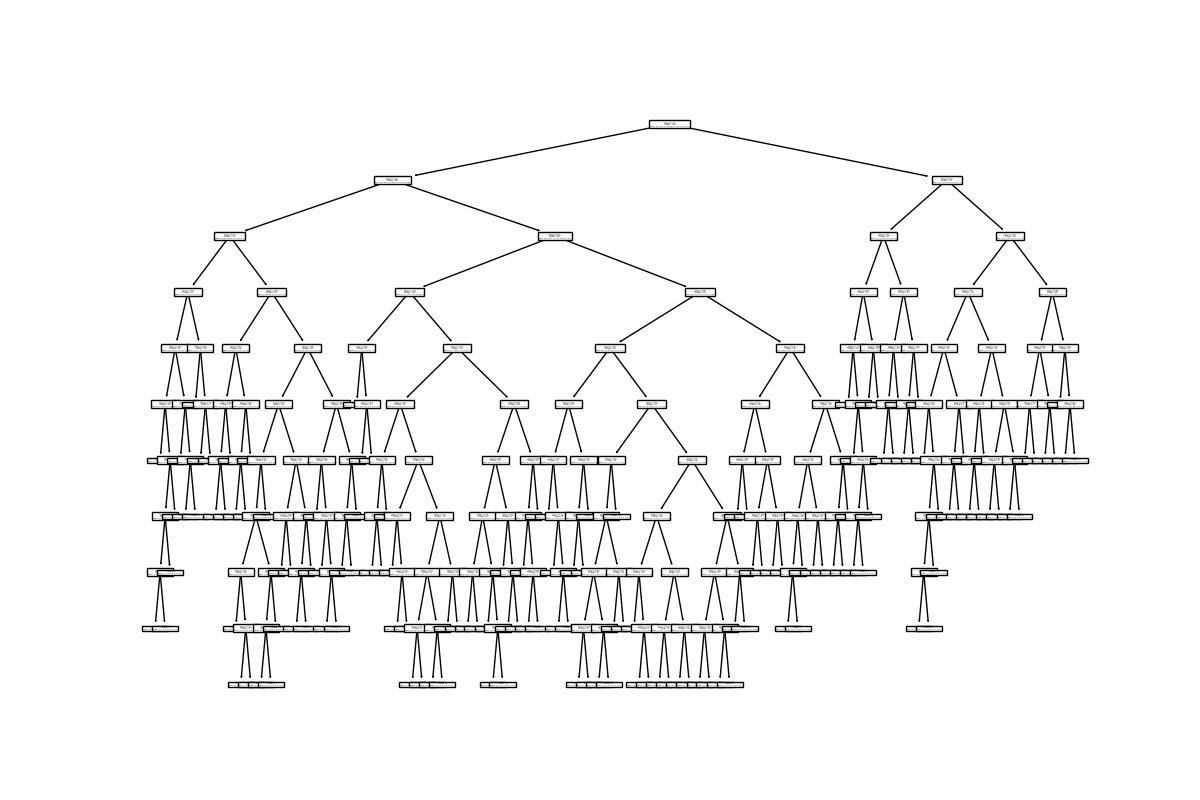

In [93]:
from sklearn import tree
tree_grid.fit(X_data_scaled, y_num)

# plot the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(tree_grid, ax=ax)
plt.show()
plt.savefig('tree.png')